In [1]:
import matplotlib.pyplot as plt
import torchvision.utils as vutils
import torch.nn as nn
import torch
import torchvision
import torch.utils
from torchvision import transforms

from torch.utils.data import DataLoader
from mpl_toolkits.axes_grid1 import ImageGrid
from torchvision.utils import save_image, make_grid


In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

train_data = torchvision.datasets.MNIST(root='data', train=True, transform=transform)
test_data = torchvision.datasets.MNIST(root='data', train=False, transform=transform)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=True)

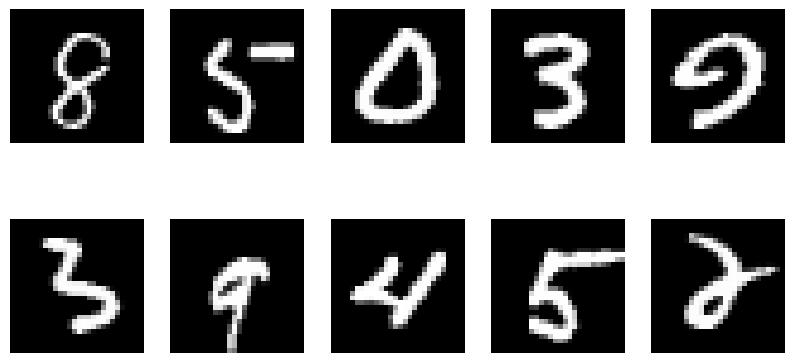

In [4]:
images, labels = next(iter(train_loader))

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i].squeeze(), cmap="gray")
    plt.axis("off")
plt.show()

In [5]:
class Discriminator(nn.Module):
    def __init__(self, input=28*28):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input, 100),
            nn.BatchNorm1d(100),
            nn.ReLU(),
            nn.Linear(100,150),
            nn.BatchNorm1d(150),
            nn.ReLU(),
            nn.Linear(150, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        x = self.net(x)
        return x


class Generator(nn.Module):
    def __init__(self, noise_dim=30, output_dim=28*28):
        super(Generator, self).__init__()
        self.generator = nn.Sequential(
            nn.Linear(noise_dim, 100),  # Use noise_dim here
            nn.BatchNorm1d(100),
            nn.ReLU(),
            nn.Linear(100, 150),
            nn.BatchNorm1d(150),
            nn.ReLU(),
            nn.Linear(150, output_dim),  # Ensure this output size is correct
            nn.Sigmoid()  # Scale output to [0, 1]
        )
    def forward(self, x):
        x = self.generator(x)
        return x


In [6]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)


In [7]:
optimizer_dis = torch.optim.Adam(discriminator.parameters(), lr=1e-4)
optimizer_gen = torch.optim.Adam(generator.parameters(), lr=1e-4)

In [8]:
loss = nn.BCELoss()

In [9]:
# Function to save and display fake images
def save_fake_images(generator, noise_dim=30, num_images=16, epoch=0):
    noise = torch.randn(num_images, noise_dim).to(device)  # Generate noise
    with torch.no_grad():
        fake_images = generator(noise)  # Generate fake images
        fake_images = fake_images.view(-1, 1, 28, 28)  # Reshape for 28x28 grayscale images

    # Save images using torchvision's make_grid and save_image
    grid = vutils.make_grid(fake_images, nrow=4, normalize=True)
    plt.figure(figsize=(8, 8))
    plt.imshow(grid.cpu().numpy().transpose((1, 2, 0)))  # Convert from tensor to numpy for plotting
    plt.title(f'Fake Images after Epoch {epoch + 1}')
    plt.axis('off')
    plt.show()  # Display the images

Epoch [1/100], Step [0/1875], Discriminator Loss: 1.4702, Generator Loss: 1.0067
Epoch [1/100], Step [100/1875], Discriminator Loss: 1.3682, Generator Loss: 0.7460
Epoch [1/100], Step [200/1875], Discriminator Loss: 1.3656, Generator Loss: 0.7133
Epoch [1/100], Step [300/1875], Discriminator Loss: 1.3304, Generator Loss: 0.7354
Epoch [1/100], Step [400/1875], Discriminator Loss: 1.3171, Generator Loss: 0.7386
Epoch [1/100], Step [500/1875], Discriminator Loss: 1.2822, Generator Loss: 0.7454
Epoch [1/100], Step [600/1875], Discriminator Loss: 1.2606, Generator Loss: 0.7696
Epoch [1/100], Step [700/1875], Discriminator Loss: 1.2657, Generator Loss: 0.8176
Epoch [1/100], Step [800/1875], Discriminator Loss: 1.0943, Generator Loss: 0.8476
Epoch [1/100], Step [900/1875], Discriminator Loss: 1.1963, Generator Loss: 0.8752
Epoch [1/100], Step [1000/1875], Discriminator Loss: 1.0786, Generator Loss: 0.9419
Epoch [1/100], Step [1100/1875], Discriminator Loss: 0.9826, Generator Loss: 0.9661
Epoc

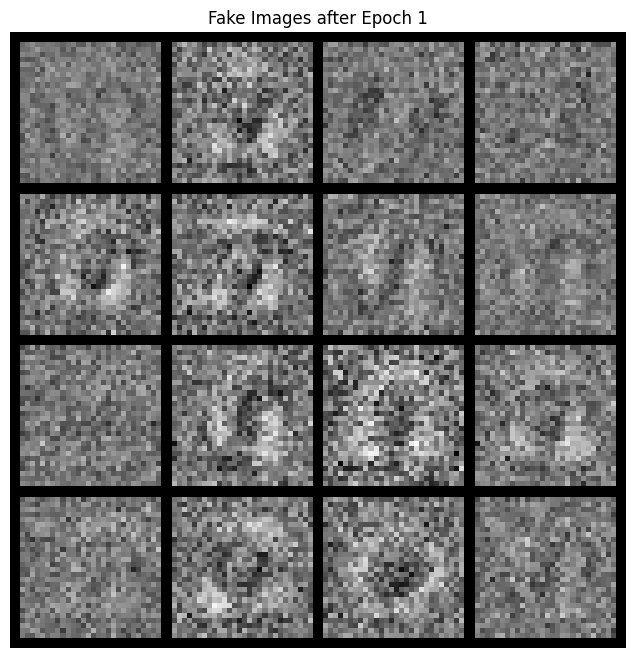

Epoch [2/100], Step [0/1875], Discriminator Loss: 0.9225, Generator Loss: 1.1143
Epoch [2/100], Step [100/1875], Discriminator Loss: 0.9319, Generator Loss: 1.0727
Epoch [2/100], Step [200/1875], Discriminator Loss: 0.7830, Generator Loss: 1.1019
Epoch [2/100], Step [300/1875], Discriminator Loss: 0.6989, Generator Loss: 1.1847
Epoch [2/100], Step [400/1875], Discriminator Loss: 0.7464, Generator Loss: 1.2851
Epoch [2/100], Step [500/1875], Discriminator Loss: 0.8102, Generator Loss: 1.1991
Epoch [2/100], Step [600/1875], Discriminator Loss: 0.8732, Generator Loss: 1.0873
Epoch [2/100], Step [700/1875], Discriminator Loss: 0.8101, Generator Loss: 1.1339
Epoch [2/100], Step [800/1875], Discriminator Loss: 0.9669, Generator Loss: 1.2536
Epoch [2/100], Step [900/1875], Discriminator Loss: 1.0659, Generator Loss: 1.3009
Epoch [2/100], Step [1000/1875], Discriminator Loss: 0.9863, Generator Loss: 1.1751
Epoch [2/100], Step [1100/1875], Discriminator Loss: 1.1226, Generator Loss: 1.2228
Epoc

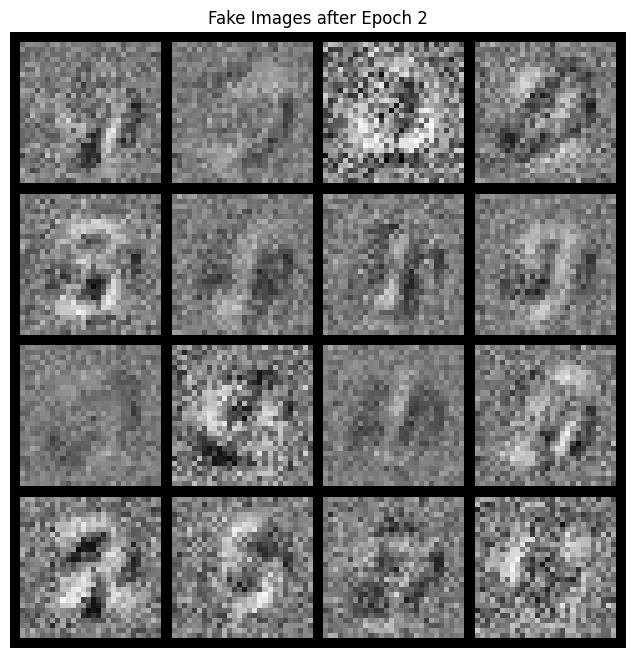

Epoch [3/100], Step [0/1875], Discriminator Loss: 1.6481, Generator Loss: 1.3331
Epoch [3/100], Step [100/1875], Discriminator Loss: 0.6549, Generator Loss: 1.2671
Epoch [3/100], Step [200/1875], Discriminator Loss: 0.7693, Generator Loss: 1.3449
Epoch [3/100], Step [300/1875], Discriminator Loss: 0.8401, Generator Loss: 1.2103
Epoch [3/100], Step [400/1875], Discriminator Loss: 0.7621, Generator Loss: 1.3835
Epoch [3/100], Step [500/1875], Discriminator Loss: 0.7173, Generator Loss: 1.3731
Epoch [3/100], Step [600/1875], Discriminator Loss: 0.8697, Generator Loss: 1.2886
Epoch [3/100], Step [700/1875], Discriminator Loss: 0.8555, Generator Loss: 1.3137
Epoch [3/100], Step [800/1875], Discriminator Loss: 0.8008, Generator Loss: 1.1358
Epoch [3/100], Step [900/1875], Discriminator Loss: 0.7986, Generator Loss: 1.3042
Epoch [3/100], Step [1000/1875], Discriminator Loss: 1.0142, Generator Loss: 1.3200
Epoch [3/100], Step [1100/1875], Discriminator Loss: 0.7396, Generator Loss: 1.3723
Epoc

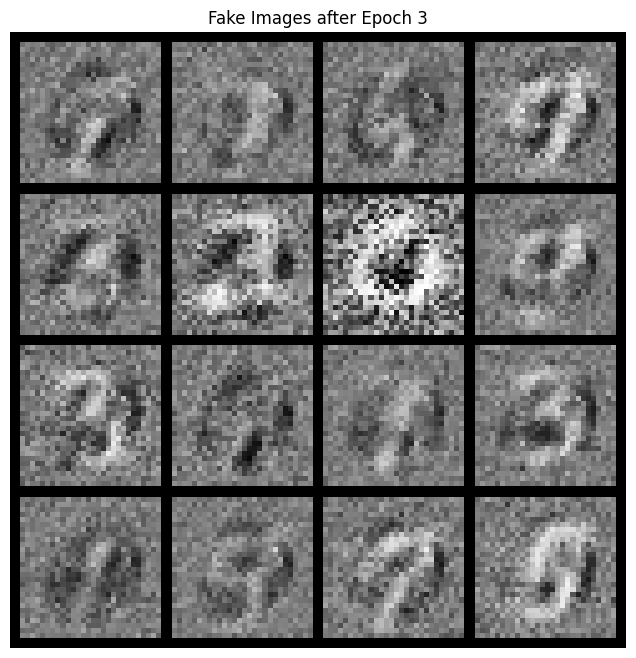

Epoch [4/100], Step [0/1875], Discriminator Loss: 0.7292, Generator Loss: 1.5097
Epoch [4/100], Step [100/1875], Discriminator Loss: 1.8002, Generator Loss: 1.2921
Epoch [4/100], Step [200/1875], Discriminator Loss: 0.7410, Generator Loss: 1.5852
Epoch [4/100], Step [300/1875], Discriminator Loss: 0.7626, Generator Loss: 1.3957
Epoch [4/100], Step [400/1875], Discriminator Loss: 0.6315, Generator Loss: 1.3032
Epoch [4/100], Step [500/1875], Discriminator Loss: 0.7412, Generator Loss: 1.2752
Epoch [4/100], Step [600/1875], Discriminator Loss: 0.8449, Generator Loss: 1.1769
Epoch [4/100], Step [700/1875], Discriminator Loss: 0.6270, Generator Loss: 1.5950
Epoch [4/100], Step [800/1875], Discriminator Loss: 0.5814, Generator Loss: 1.5714
Epoch [4/100], Step [900/1875], Discriminator Loss: 0.8950, Generator Loss: 1.2694
Epoch [4/100], Step [1000/1875], Discriminator Loss: 0.7723, Generator Loss: 1.3764
Epoch [4/100], Step [1100/1875], Discriminator Loss: 0.9239, Generator Loss: 1.4530
Epoc

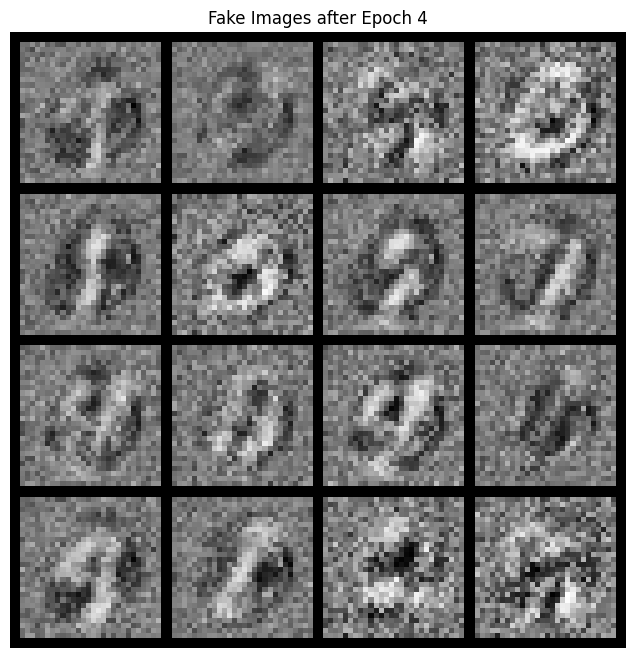

Epoch [5/100], Step [0/1875], Discriminator Loss: 0.9057, Generator Loss: 1.4177
Epoch [5/100], Step [100/1875], Discriminator Loss: 0.7891, Generator Loss: 1.5625
Epoch [5/100], Step [200/1875], Discriminator Loss: 0.5685, Generator Loss: 1.6011
Epoch [5/100], Step [300/1875], Discriminator Loss: 0.7997, Generator Loss: 1.3839
Epoch [5/100], Step [400/1875], Discriminator Loss: 0.8164, Generator Loss: 1.3574
Epoch [5/100], Step [500/1875], Discriminator Loss: 0.5769, Generator Loss: 1.4656
Epoch [5/100], Step [600/1875], Discriminator Loss: 0.7593, Generator Loss: 1.7365
Epoch [5/100], Step [700/1875], Discriminator Loss: 0.7904, Generator Loss: 1.6004
Epoch [5/100], Step [800/1875], Discriminator Loss: 0.8393, Generator Loss: 1.3186
Epoch [5/100], Step [900/1875], Discriminator Loss: 1.0306, Generator Loss: 1.3269
Epoch [5/100], Step [1000/1875], Discriminator Loss: 0.6401, Generator Loss: 1.4887
Epoch [5/100], Step [1100/1875], Discriminator Loss: 0.5935, Generator Loss: 1.3914
Epoc

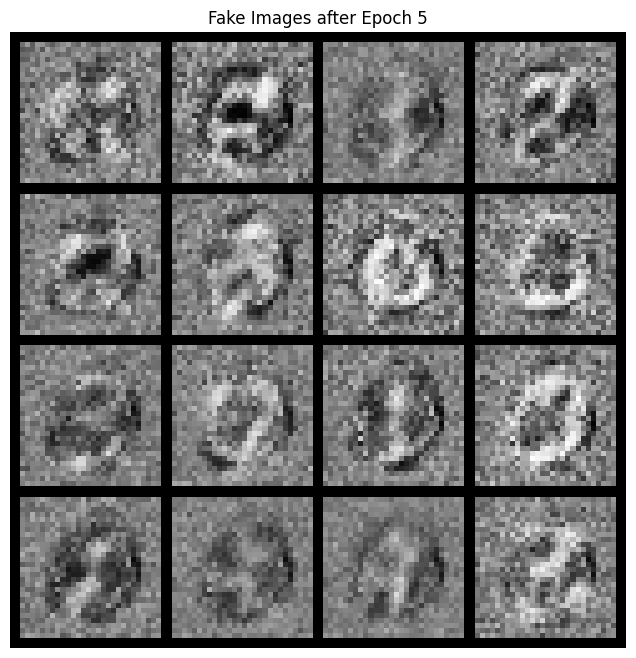

Epoch [6/100], Step [0/1875], Discriminator Loss: 0.6733, Generator Loss: 1.4933
Epoch [6/100], Step [100/1875], Discriminator Loss: 0.7336, Generator Loss: 1.5708
Epoch [6/100], Step [200/1875], Discriminator Loss: 0.8088, Generator Loss: 1.3822
Epoch [6/100], Step [300/1875], Discriminator Loss: 0.5956, Generator Loss: 1.5253
Epoch [6/100], Step [400/1875], Discriminator Loss: 0.9932, Generator Loss: 1.7988
Epoch [6/100], Step [500/1875], Discriminator Loss: 0.6580, Generator Loss: 1.4810
Epoch [6/100], Step [600/1875], Discriminator Loss: 0.8363, Generator Loss: 1.4591
Epoch [6/100], Step [700/1875], Discriminator Loss: 1.1469, Generator Loss: 1.3330
Epoch [6/100], Step [800/1875], Discriminator Loss: 0.7670, Generator Loss: 1.4066
Epoch [6/100], Step [900/1875], Discriminator Loss: 0.5370, Generator Loss: 1.6180
Epoch [6/100], Step [1000/1875], Discriminator Loss: 0.8202, Generator Loss: 1.2975
Epoch [6/100], Step [1100/1875], Discriminator Loss: 0.8789, Generator Loss: 1.4833
Epoc

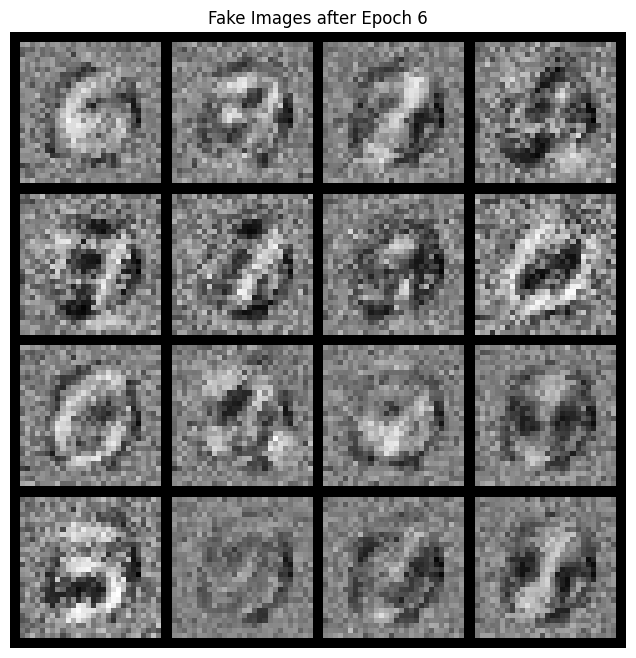

Epoch [7/100], Step [0/1875], Discriminator Loss: 0.5543, Generator Loss: 1.7553
Epoch [7/100], Step [100/1875], Discriminator Loss: 0.7734, Generator Loss: 1.4548
Epoch [7/100], Step [200/1875], Discriminator Loss: 0.7493, Generator Loss: 1.8337
Epoch [7/100], Step [300/1875], Discriminator Loss: 0.9225, Generator Loss: 1.3788
Epoch [7/100], Step [400/1875], Discriminator Loss: 0.8562, Generator Loss: 1.6280
Epoch [7/100], Step [500/1875], Discriminator Loss: 0.7544, Generator Loss: 1.5206
Epoch [7/100], Step [600/1875], Discriminator Loss: 0.5964, Generator Loss: 1.5753
Epoch [7/100], Step [700/1875], Discriminator Loss: 0.8495, Generator Loss: 1.6409
Epoch [7/100], Step [800/1875], Discriminator Loss: 0.8749, Generator Loss: 1.4591
Epoch [7/100], Step [900/1875], Discriminator Loss: 0.6205, Generator Loss: 1.6432
Epoch [7/100], Step [1000/1875], Discriminator Loss: 0.5311, Generator Loss: 1.7669
Epoch [7/100], Step [1100/1875], Discriminator Loss: 0.7932, Generator Loss: 1.7985
Epoc

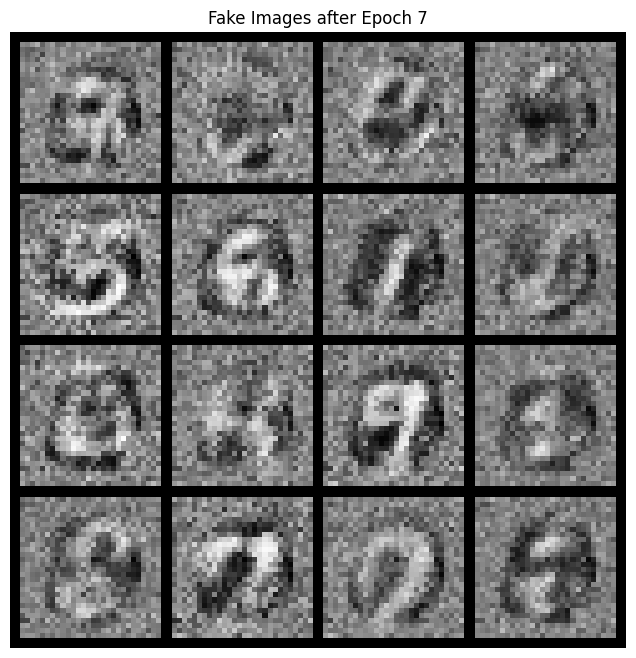

Epoch [8/100], Step [0/1875], Discriminator Loss: 0.5405, Generator Loss: 1.6434
Epoch [8/100], Step [100/1875], Discriminator Loss: 0.7452, Generator Loss: 1.6003
Epoch [8/100], Step [200/1875], Discriminator Loss: 1.2524, Generator Loss: 1.6796
Epoch [8/100], Step [300/1875], Discriminator Loss: 0.6657, Generator Loss: 1.3240
Epoch [8/100], Step [400/1875], Discriminator Loss: 0.7177, Generator Loss: 1.5076
Epoch [8/100], Step [500/1875], Discriminator Loss: 0.6906, Generator Loss: 1.4878
Epoch [8/100], Step [600/1875], Discriminator Loss: 0.6232, Generator Loss: 1.5647
Epoch [8/100], Step [700/1875], Discriminator Loss: 0.5958, Generator Loss: 1.8108
Epoch [8/100], Step [800/1875], Discriminator Loss: 0.6971, Generator Loss: 1.3974
Epoch [8/100], Step [900/1875], Discriminator Loss: 0.6228, Generator Loss: 1.5006
Epoch [8/100], Step [1000/1875], Discriminator Loss: 0.5950, Generator Loss: 1.6733
Epoch [8/100], Step [1100/1875], Discriminator Loss: 0.5479, Generator Loss: 1.6741
Epoc

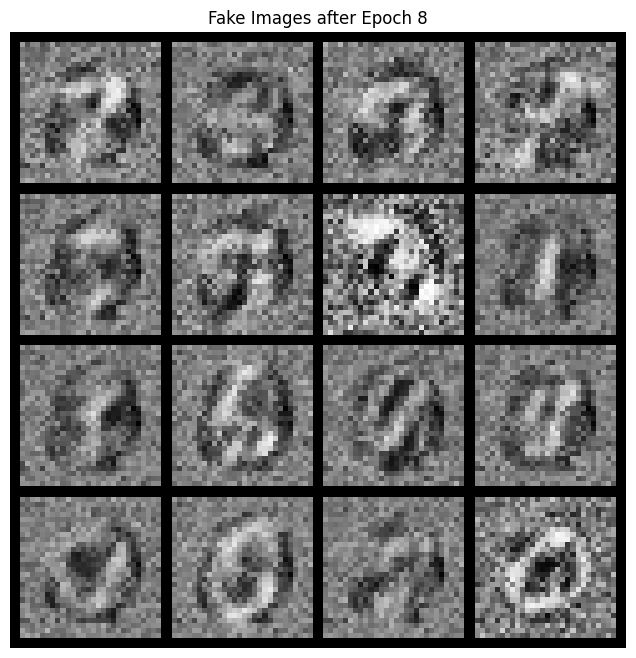

Epoch [9/100], Step [0/1875], Discriminator Loss: 0.6642, Generator Loss: 1.3097
Epoch [9/100], Step [100/1875], Discriminator Loss: 0.8906, Generator Loss: 1.4387
Epoch [9/100], Step [200/1875], Discriminator Loss: 0.9920, Generator Loss: 1.1692
Epoch [9/100], Step [300/1875], Discriminator Loss: 0.8808, Generator Loss: 1.5314
Epoch [9/100], Step [400/1875], Discriminator Loss: 0.7865, Generator Loss: 1.3954
Epoch [9/100], Step [500/1875], Discriminator Loss: 0.8556, Generator Loss: 1.4800
Epoch [9/100], Step [600/1875], Discriminator Loss: 0.8960, Generator Loss: 1.5016
Epoch [9/100], Step [700/1875], Discriminator Loss: 0.7836, Generator Loss: 1.8785
Epoch [9/100], Step [800/1875], Discriminator Loss: 0.6826, Generator Loss: 1.3289
Epoch [9/100], Step [900/1875], Discriminator Loss: 1.0927, Generator Loss: 1.8006
Epoch [9/100], Step [1000/1875], Discriminator Loss: 0.4735, Generator Loss: 2.0662
Epoch [9/100], Step [1100/1875], Discriminator Loss: 0.4827, Generator Loss: 1.7411
Epoc

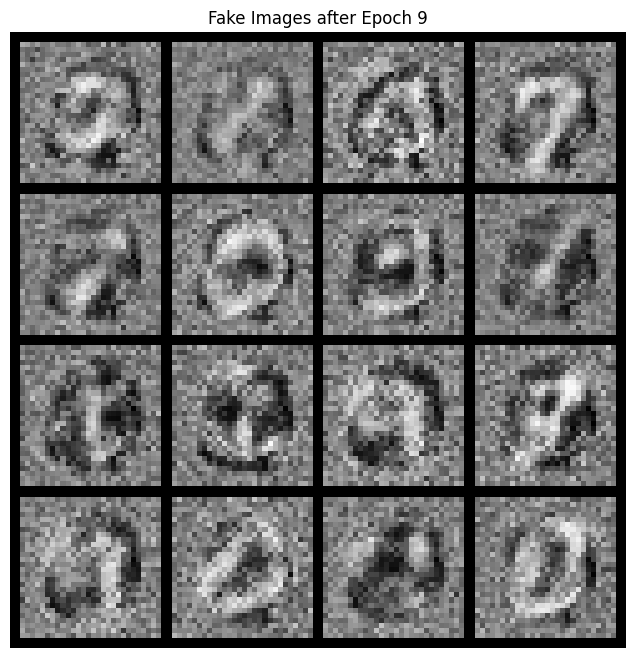

Epoch [10/100], Step [0/1875], Discriminator Loss: 0.7206, Generator Loss: 1.5107
Epoch [10/100], Step [100/1875], Discriminator Loss: 0.6169, Generator Loss: 1.4937
Epoch [10/100], Step [200/1875], Discriminator Loss: 0.7066, Generator Loss: 1.5363
Epoch [10/100], Step [300/1875], Discriminator Loss: 0.6345, Generator Loss: 1.8313
Epoch [10/100], Step [400/1875], Discriminator Loss: 0.8902, Generator Loss: 1.7439
Epoch [10/100], Step [500/1875], Discriminator Loss: 0.7641, Generator Loss: 1.7181
Epoch [10/100], Step [600/1875], Discriminator Loss: 0.8335, Generator Loss: 1.5556
Epoch [10/100], Step [700/1875], Discriminator Loss: 0.6118, Generator Loss: 1.9800
Epoch [10/100], Step [800/1875], Discriminator Loss: 0.7102, Generator Loss: 1.7135
Epoch [10/100], Step [900/1875], Discriminator Loss: 0.6814, Generator Loss: 1.6955
Epoch [10/100], Step [1000/1875], Discriminator Loss: 0.7192, Generator Loss: 1.5587
Epoch [10/100], Step [1100/1875], Discriminator Loss: 0.6437, Generator Loss:

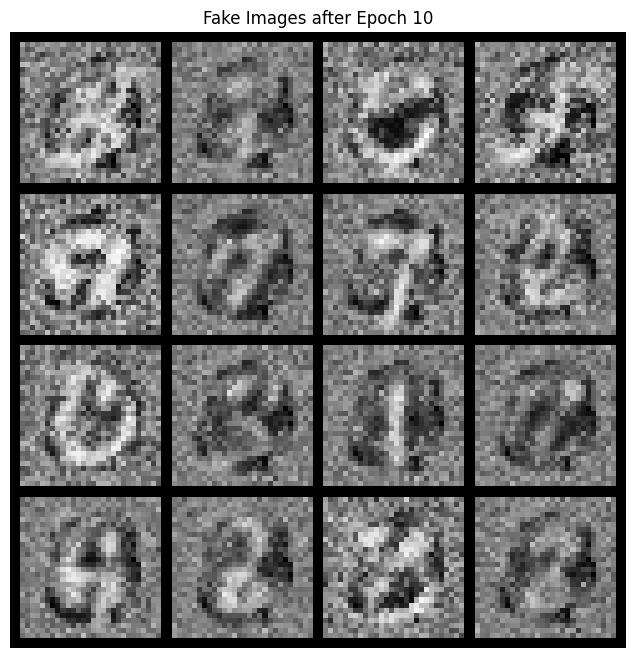

Epoch [11/100], Step [0/1875], Discriminator Loss: 0.7238, Generator Loss: 1.5316
Epoch [11/100], Step [100/1875], Discriminator Loss: 0.4626, Generator Loss: 2.1648
Epoch [11/100], Step [200/1875], Discriminator Loss: 0.6433, Generator Loss: 1.4267
Epoch [11/100], Step [300/1875], Discriminator Loss: 0.5304, Generator Loss: 1.6065
Epoch [11/100], Step [400/1875], Discriminator Loss: 1.2047, Generator Loss: 1.4893
Epoch [11/100], Step [500/1875], Discriminator Loss: 0.5837, Generator Loss: 1.8224
Epoch [11/100], Step [600/1875], Discriminator Loss: 0.7096, Generator Loss: 1.3949
Epoch [11/100], Step [700/1875], Discriminator Loss: 0.8976, Generator Loss: 1.5842
Epoch [11/100], Step [800/1875], Discriminator Loss: 0.7904, Generator Loss: 1.4093
Epoch [11/100], Step [900/1875], Discriminator Loss: 0.8213, Generator Loss: 1.5102
Epoch [11/100], Step [1000/1875], Discriminator Loss: 0.4852, Generator Loss: 2.2352
Epoch [11/100], Step [1100/1875], Discriminator Loss: 0.8911, Generator Loss:

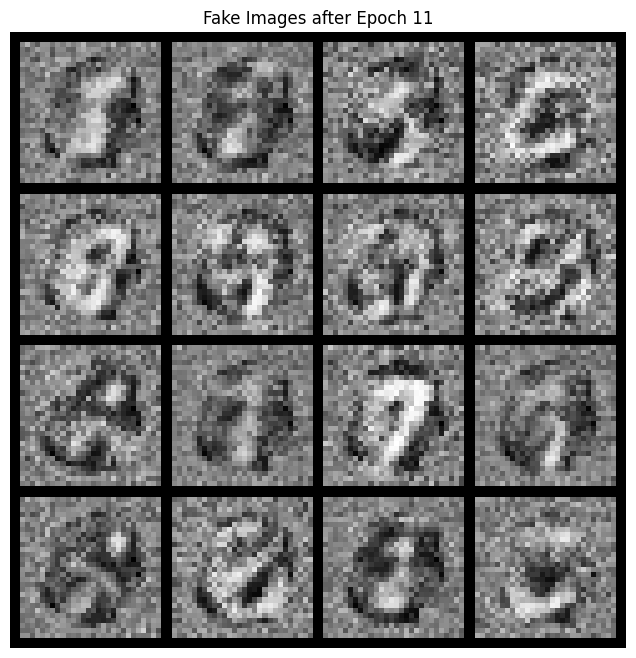

Epoch [12/100], Step [0/1875], Discriminator Loss: 0.9324, Generator Loss: 1.4493
Epoch [12/100], Step [100/1875], Discriminator Loss: 1.2699, Generator Loss: 1.5666
Epoch [12/100], Step [200/1875], Discriminator Loss: 0.7060, Generator Loss: 1.6634
Epoch [12/100], Step [300/1875], Discriminator Loss: 1.0230, Generator Loss: 1.5299
Epoch [12/100], Step [400/1875], Discriminator Loss: 0.7063, Generator Loss: 1.7641
Epoch [12/100], Step [500/1875], Discriminator Loss: 0.6113, Generator Loss: 1.5767
Epoch [12/100], Step [600/1875], Discriminator Loss: 0.8835, Generator Loss: 1.4128
Epoch [12/100], Step [700/1875], Discriminator Loss: 0.5770, Generator Loss: 1.7149
Epoch [12/100], Step [800/1875], Discriminator Loss: 0.5891, Generator Loss: 1.8943
Epoch [12/100], Step [900/1875], Discriminator Loss: 0.7399, Generator Loss: 1.4831
Epoch [12/100], Step [1000/1875], Discriminator Loss: 0.6407, Generator Loss: 1.6852
Epoch [12/100], Step [1100/1875], Discriminator Loss: 0.8121, Generator Loss:

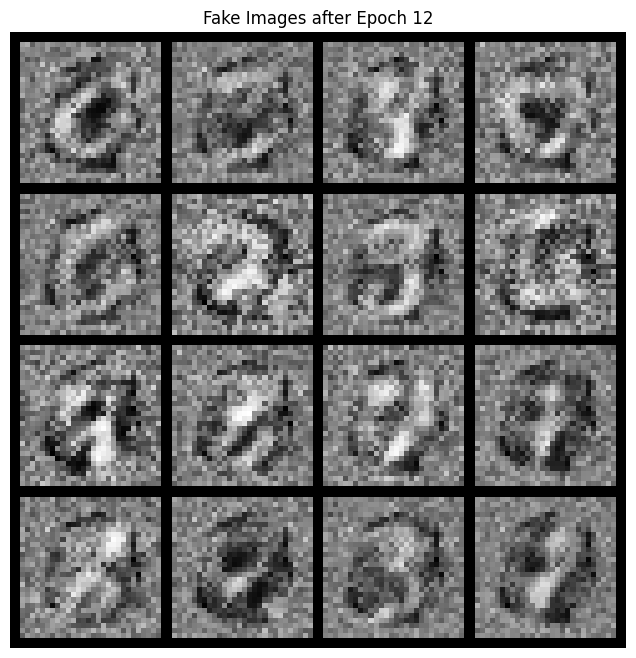

Epoch [13/100], Step [0/1875], Discriminator Loss: 1.6828, Generator Loss: 1.0348
Epoch [13/100], Step [100/1875], Discriminator Loss: 0.8672, Generator Loss: 1.2670
Epoch [13/100], Step [200/1875], Discriminator Loss: 0.4971, Generator Loss: 1.9701
Epoch [13/100], Step [300/1875], Discriminator Loss: 0.8013, Generator Loss: 1.8866
Epoch [13/100], Step [400/1875], Discriminator Loss: 0.8003, Generator Loss: 1.6079
Epoch [13/100], Step [500/1875], Discriminator Loss: 0.6387, Generator Loss: 1.6188
Epoch [13/100], Step [600/1875], Discriminator Loss: 0.6238, Generator Loss: 1.4398
Epoch [13/100], Step [700/1875], Discriminator Loss: 0.4609, Generator Loss: 1.9091
Epoch [13/100], Step [800/1875], Discriminator Loss: 0.6988, Generator Loss: 1.5298
Epoch [13/100], Step [900/1875], Discriminator Loss: 0.6023, Generator Loss: 1.7655
Epoch [13/100], Step [1000/1875], Discriminator Loss: 0.6084, Generator Loss: 1.5068
Epoch [13/100], Step [1100/1875], Discriminator Loss: 0.7324, Generator Loss:

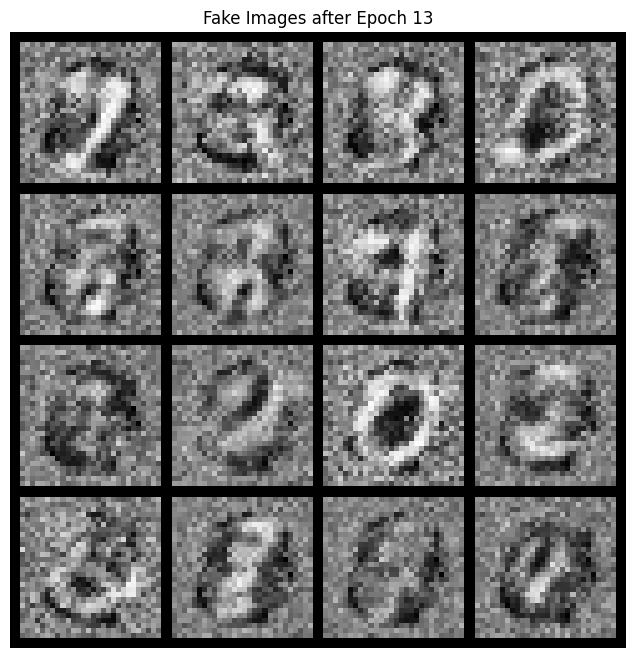

Epoch [14/100], Step [0/1875], Discriminator Loss: 0.8641, Generator Loss: 1.3627
Epoch [14/100], Step [100/1875], Discriminator Loss: 0.7993, Generator Loss: 1.8947
Epoch [14/100], Step [200/1875], Discriminator Loss: 0.8929, Generator Loss: 1.4501
Epoch [14/100], Step [300/1875], Discriminator Loss: 1.1194, Generator Loss: 1.3403
Epoch [14/100], Step [400/1875], Discriminator Loss: 0.7749, Generator Loss: 1.7703
Epoch [14/100], Step [500/1875], Discriminator Loss: 0.6913, Generator Loss: 1.4066
Epoch [14/100], Step [600/1875], Discriminator Loss: 1.0900, Generator Loss: 1.1274
Epoch [14/100], Step [700/1875], Discriminator Loss: 0.5308, Generator Loss: 1.6113
Epoch [14/100], Step [800/1875], Discriminator Loss: 0.7256, Generator Loss: 1.3377
Epoch [14/100], Step [900/1875], Discriminator Loss: 0.7679, Generator Loss: 1.4741
Epoch [14/100], Step [1000/1875], Discriminator Loss: 0.9060, Generator Loss: 1.7778
Epoch [14/100], Step [1100/1875], Discriminator Loss: 0.5547, Generator Loss:

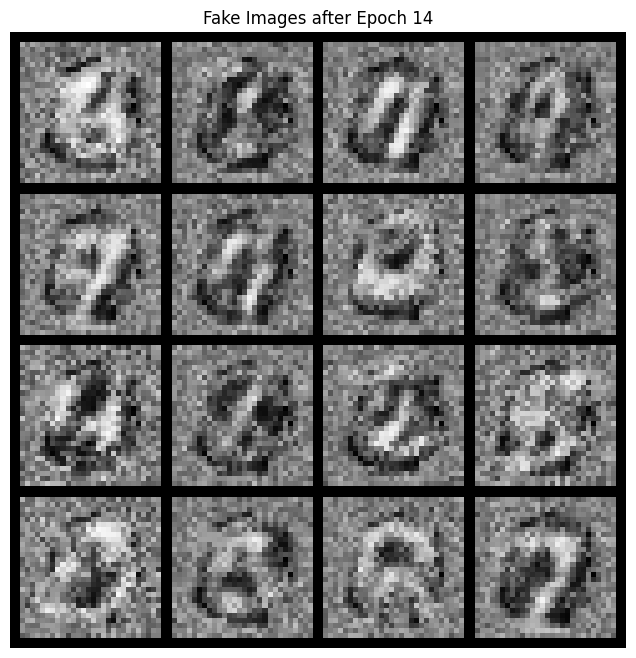

Epoch [15/100], Step [0/1875], Discriminator Loss: 0.9354, Generator Loss: 1.2770
Epoch [15/100], Step [100/1875], Discriminator Loss: 0.8095, Generator Loss: 1.3355
Epoch [15/100], Step [200/1875], Discriminator Loss: 0.9083, Generator Loss: 1.5859
Epoch [15/100], Step [300/1875], Discriminator Loss: 1.3868, Generator Loss: 1.2781
Epoch [15/100], Step [400/1875], Discriminator Loss: 0.5218, Generator Loss: 1.9076
Epoch [15/100], Step [500/1875], Discriminator Loss: 0.7578, Generator Loss: 1.5794
Epoch [15/100], Step [600/1875], Discriminator Loss: 0.8680, Generator Loss: 1.4143
Epoch [15/100], Step [700/1875], Discriminator Loss: 1.0117, Generator Loss: 1.6712
Epoch [15/100], Step [800/1875], Discriminator Loss: 0.6894, Generator Loss: 1.6365
Epoch [15/100], Step [900/1875], Discriminator Loss: 0.7201, Generator Loss: 1.4598
Epoch [15/100], Step [1000/1875], Discriminator Loss: 0.9755, Generator Loss: 1.4686
Epoch [15/100], Step [1100/1875], Discriminator Loss: 0.7242, Generator Loss:

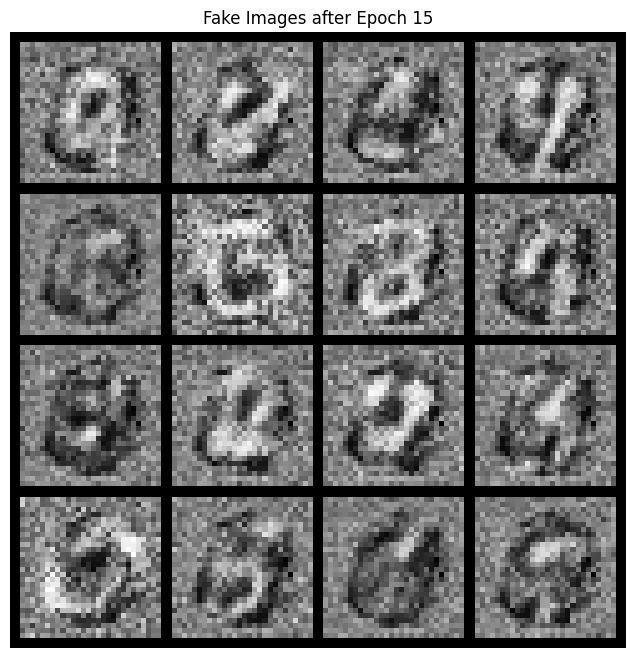

Epoch [16/100], Step [0/1875], Discriminator Loss: 1.0505, Generator Loss: 1.9830
Epoch [16/100], Step [100/1875], Discriminator Loss: 1.0075, Generator Loss: 1.3724
Epoch [16/100], Step [200/1875], Discriminator Loss: 0.4293, Generator Loss: 1.9199
Epoch [16/100], Step [300/1875], Discriminator Loss: 0.7928, Generator Loss: 1.6338
Epoch [16/100], Step [400/1875], Discriminator Loss: 0.7995, Generator Loss: 1.5413
Epoch [16/100], Step [500/1875], Discriminator Loss: 0.9404, Generator Loss: 1.4570
Epoch [16/100], Step [600/1875], Discriminator Loss: 1.0234, Generator Loss: 1.8413
Epoch [16/100], Step [700/1875], Discriminator Loss: 1.1028, Generator Loss: 1.5465
Epoch [16/100], Step [800/1875], Discriminator Loss: 0.7581, Generator Loss: 1.4909
Epoch [16/100], Step [900/1875], Discriminator Loss: 0.7251, Generator Loss: 1.4496
Epoch [16/100], Step [1000/1875], Discriminator Loss: 0.7950, Generator Loss: 1.6480
Epoch [16/100], Step [1100/1875], Discriminator Loss: 0.7251, Generator Loss:

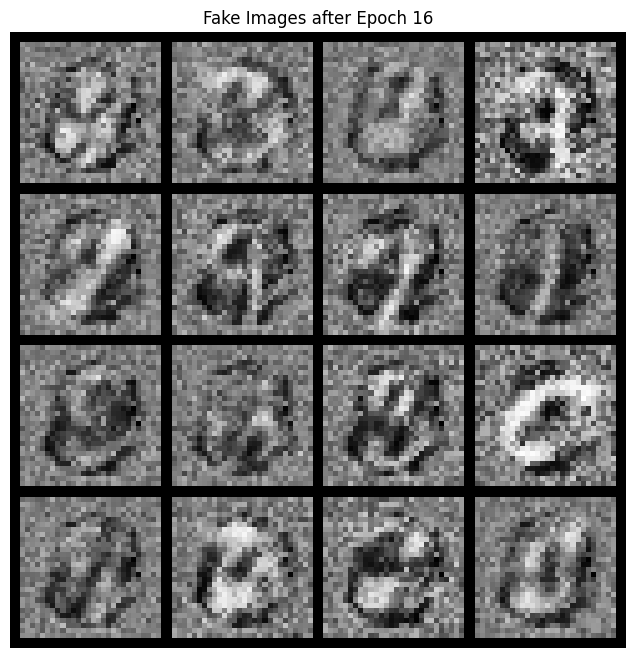

Epoch [17/100], Step [0/1875], Discriminator Loss: 0.5387, Generator Loss: 1.7415
Epoch [17/100], Step [100/1875], Discriminator Loss: 0.5083, Generator Loss: 2.1619
Epoch [17/100], Step [200/1875], Discriminator Loss: 0.5520, Generator Loss: 1.8928
Epoch [17/100], Step [300/1875], Discriminator Loss: 0.7584, Generator Loss: 1.5470
Epoch [17/100], Step [400/1875], Discriminator Loss: 0.9869, Generator Loss: 1.3828
Epoch [17/100], Step [500/1875], Discriminator Loss: 0.7244, Generator Loss: 1.3391
Epoch [17/100], Step [600/1875], Discriminator Loss: 0.6889, Generator Loss: 1.4000
Epoch [17/100], Step [700/1875], Discriminator Loss: 0.7951, Generator Loss: 1.4602
Epoch [17/100], Step [800/1875], Discriminator Loss: 0.9335, Generator Loss: 1.6738
Epoch [17/100], Step [900/1875], Discriminator Loss: 0.9735, Generator Loss: 1.3115
Epoch [17/100], Step [1000/1875], Discriminator Loss: 1.0034, Generator Loss: 1.4649
Epoch [17/100], Step [1100/1875], Discriminator Loss: 0.7533, Generator Loss:

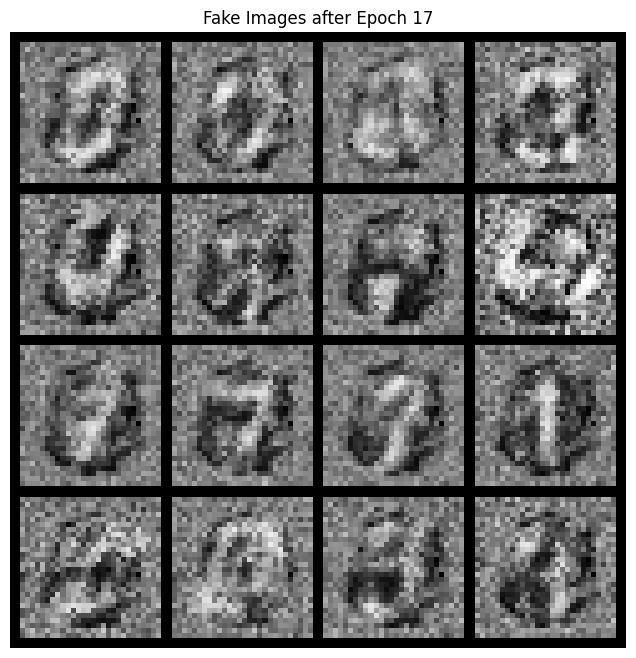

Epoch [18/100], Step [0/1875], Discriminator Loss: 1.0414, Generator Loss: 1.3948
Epoch [18/100], Step [100/1875], Discriminator Loss: 0.7891, Generator Loss: 1.6783
Epoch [18/100], Step [200/1875], Discriminator Loss: 1.1847, Generator Loss: 1.6036
Epoch [18/100], Step [300/1875], Discriminator Loss: 0.5281, Generator Loss: 1.5061
Epoch [18/100], Step [400/1875], Discriminator Loss: 0.8093, Generator Loss: 1.6964
Epoch [18/100], Step [500/1875], Discriminator Loss: 1.0165, Generator Loss: 1.1405
Epoch [18/100], Step [600/1875], Discriminator Loss: 0.9607, Generator Loss: 1.4036
Epoch [18/100], Step [700/1875], Discriminator Loss: 0.8717, Generator Loss: 1.1331
Epoch [18/100], Step [800/1875], Discriminator Loss: 0.8580, Generator Loss: 1.5702
Epoch [18/100], Step [900/1875], Discriminator Loss: 0.9428, Generator Loss: 1.5426
Epoch [18/100], Step [1000/1875], Discriminator Loss: 0.4794, Generator Loss: 1.7889
Epoch [18/100], Step [1100/1875], Discriminator Loss: 0.7400, Generator Loss:

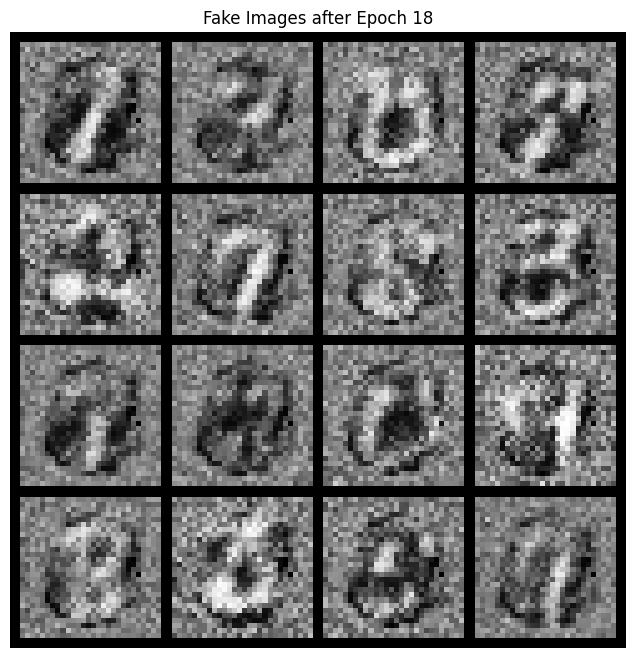

Epoch [19/100], Step [0/1875], Discriminator Loss: 0.6636, Generator Loss: 2.1962
Epoch [19/100], Step [100/1875], Discriminator Loss: 0.7133, Generator Loss: 1.5493
Epoch [19/100], Step [200/1875], Discriminator Loss: 0.5005, Generator Loss: 1.8597
Epoch [19/100], Step [300/1875], Discriminator Loss: 1.3247, Generator Loss: 1.7888
Epoch [19/100], Step [400/1875], Discriminator Loss: 0.5332, Generator Loss: 1.8026
Epoch [19/100], Step [500/1875], Discriminator Loss: 0.5737, Generator Loss: 1.7991
Epoch [19/100], Step [600/1875], Discriminator Loss: 0.7928, Generator Loss: 1.1690
Epoch [19/100], Step [700/1875], Discriminator Loss: 0.6104, Generator Loss: 1.6591
Epoch [19/100], Step [800/1875], Discriminator Loss: 0.9071, Generator Loss: 1.3373
Epoch [19/100], Step [900/1875], Discriminator Loss: 0.5620, Generator Loss: 1.5013
Epoch [19/100], Step [1000/1875], Discriminator Loss: 0.6003, Generator Loss: 2.0083
Epoch [19/100], Step [1100/1875], Discriminator Loss: 0.9488, Generator Loss:

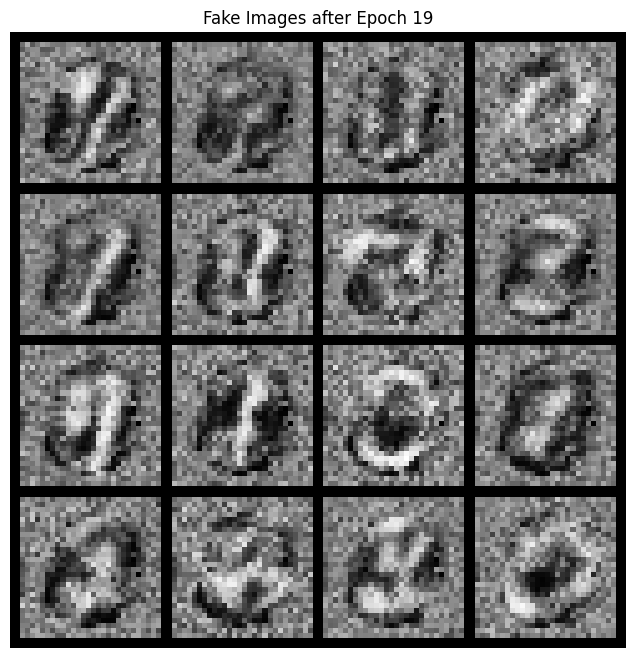

Epoch [20/100], Step [0/1875], Discriminator Loss: 0.9217, Generator Loss: 1.4381
Epoch [20/100], Step [100/1875], Discriminator Loss: 0.8621, Generator Loss: 1.4084
Epoch [20/100], Step [200/1875], Discriminator Loss: 0.7937, Generator Loss: 1.6017
Epoch [20/100], Step [300/1875], Discriminator Loss: 0.7792, Generator Loss: 1.6106
Epoch [20/100], Step [400/1875], Discriminator Loss: 0.6978, Generator Loss: 1.3784
Epoch [20/100], Step [500/1875], Discriminator Loss: 0.9014, Generator Loss: 1.6283
Epoch [20/100], Step [600/1875], Discriminator Loss: 1.1579, Generator Loss: 1.2419
Epoch [20/100], Step [700/1875], Discriminator Loss: 0.8436, Generator Loss: 1.4298
Epoch [20/100], Step [800/1875], Discriminator Loss: 1.3350, Generator Loss: 1.4165
Epoch [20/100], Step [900/1875], Discriminator Loss: 0.5016, Generator Loss: 1.8981
Epoch [20/100], Step [1000/1875], Discriminator Loss: 0.8864, Generator Loss: 1.3449
Epoch [20/100], Step [1100/1875], Discriminator Loss: 0.6439, Generator Loss:

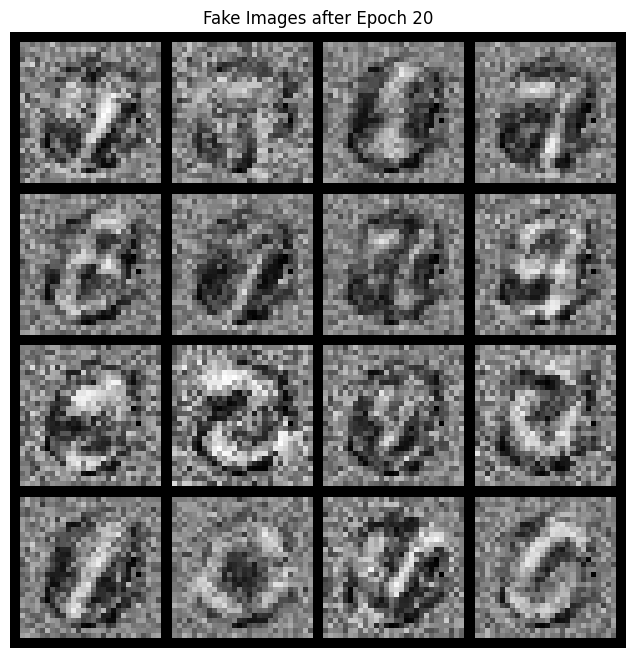

Epoch [21/100], Step [0/1875], Discriminator Loss: 0.8523, Generator Loss: 1.3123
Epoch [21/100], Step [100/1875], Discriminator Loss: 0.5614, Generator Loss: 1.5373
Epoch [21/100], Step [200/1875], Discriminator Loss: 0.9216, Generator Loss: 1.5027
Epoch [21/100], Step [300/1875], Discriminator Loss: 0.8537, Generator Loss: 1.3088
Epoch [21/100], Step [400/1875], Discriminator Loss: 0.4752, Generator Loss: 2.1863
Epoch [21/100], Step [500/1875], Discriminator Loss: 0.9331, Generator Loss: 1.7530
Epoch [21/100], Step [600/1875], Discriminator Loss: 0.8232, Generator Loss: 1.5946
Epoch [21/100], Step [700/1875], Discriminator Loss: 0.5744, Generator Loss: 1.6110
Epoch [21/100], Step [800/1875], Discriminator Loss: 0.8077, Generator Loss: 1.5768
Epoch [21/100], Step [900/1875], Discriminator Loss: 0.8625, Generator Loss: 1.1875
Epoch [21/100], Step [1000/1875], Discriminator Loss: 1.1339, Generator Loss: 1.3493
Epoch [21/100], Step [1100/1875], Discriminator Loss: 0.5708, Generator Loss:

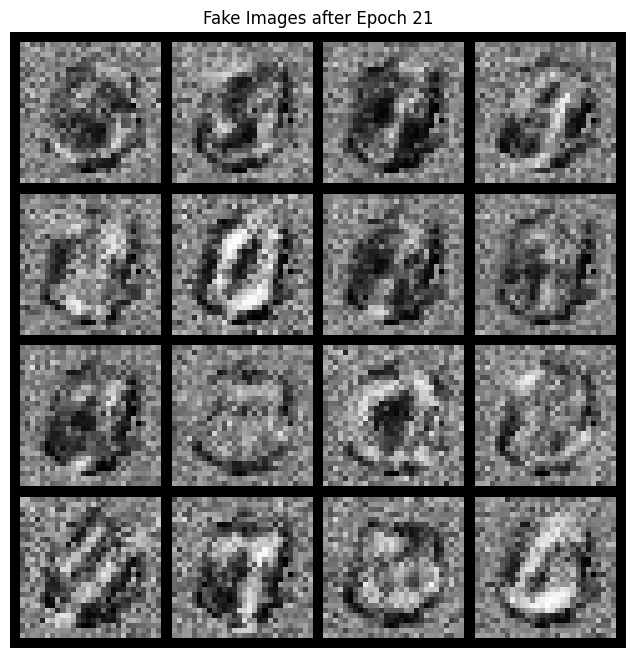

Epoch [22/100], Step [0/1875], Discriminator Loss: 0.6083, Generator Loss: 1.5650
Epoch [22/100], Step [100/1875], Discriminator Loss: 0.8004, Generator Loss: 1.6413
Epoch [22/100], Step [200/1875], Discriminator Loss: 0.6126, Generator Loss: 1.5027
Epoch [22/100], Step [300/1875], Discriminator Loss: 1.0141, Generator Loss: 1.2665
Epoch [22/100], Step [400/1875], Discriminator Loss: 0.9662, Generator Loss: 1.4781
Epoch [22/100], Step [500/1875], Discriminator Loss: 0.9416, Generator Loss: 1.8216
Epoch [22/100], Step [600/1875], Discriminator Loss: 1.1313, Generator Loss: 0.9569
Epoch [22/100], Step [700/1875], Discriminator Loss: 0.6298, Generator Loss: 1.7654
Epoch [22/100], Step [800/1875], Discriminator Loss: 0.7535, Generator Loss: 1.3991
Epoch [22/100], Step [900/1875], Discriminator Loss: 1.1309, Generator Loss: 1.6172
Epoch [22/100], Step [1000/1875], Discriminator Loss: 1.1078, Generator Loss: 1.2251
Epoch [22/100], Step [1100/1875], Discriminator Loss: 0.6337, Generator Loss:

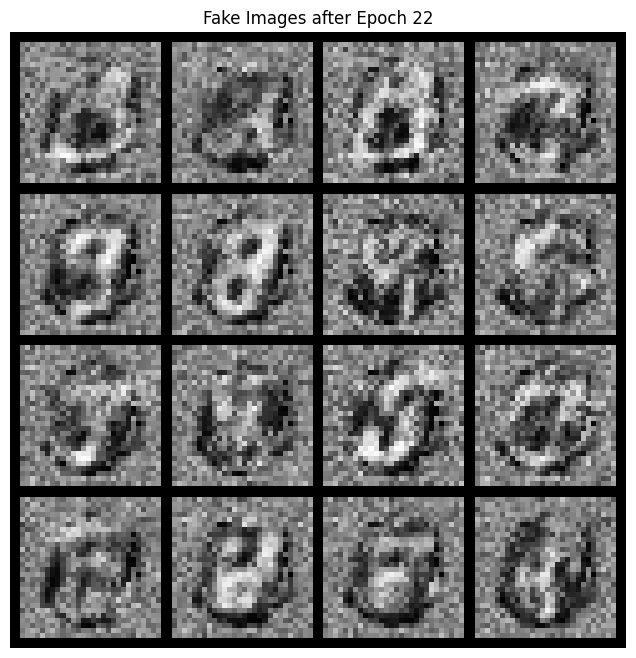

Epoch [23/100], Step [0/1875], Discriminator Loss: 0.7203, Generator Loss: 1.3508
Epoch [23/100], Step [100/1875], Discriminator Loss: 0.6548, Generator Loss: 1.6719
Epoch [23/100], Step [200/1875], Discriminator Loss: 1.1941, Generator Loss: 1.2173
Epoch [23/100], Step [300/1875], Discriminator Loss: 0.7140, Generator Loss: 1.5766
Epoch [23/100], Step [400/1875], Discriminator Loss: 1.0198, Generator Loss: 1.3898
Epoch [23/100], Step [500/1875], Discriminator Loss: 0.4800, Generator Loss: 1.8936
Epoch [23/100], Step [600/1875], Discriminator Loss: 1.0223, Generator Loss: 1.6447
Epoch [23/100], Step [700/1875], Discriminator Loss: 1.1747, Generator Loss: 1.4552
Epoch [23/100], Step [800/1875], Discriminator Loss: 0.6589, Generator Loss: 1.6674
Epoch [23/100], Step [900/1875], Discriminator Loss: 0.5994, Generator Loss: 2.0763
Epoch [23/100], Step [1000/1875], Discriminator Loss: 0.8151, Generator Loss: 1.7558
Epoch [23/100], Step [1100/1875], Discriminator Loss: 0.7929, Generator Loss:

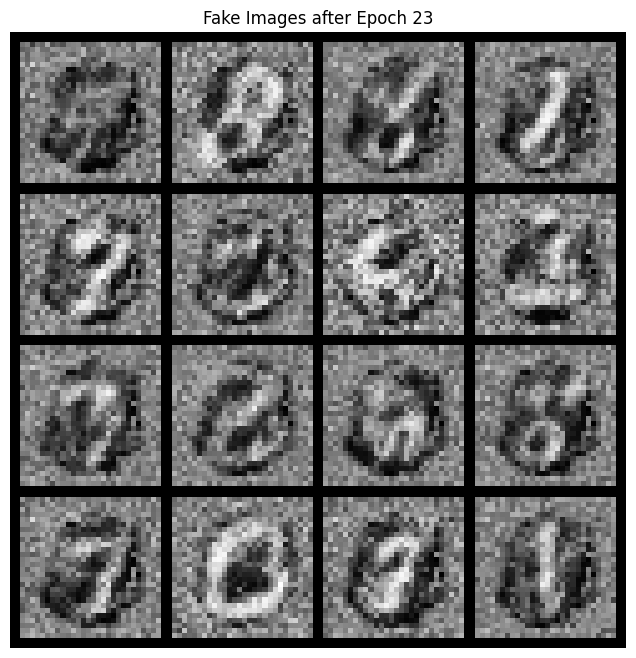

Epoch [24/100], Step [0/1875], Discriminator Loss: 0.9168, Generator Loss: 1.1917
Epoch [24/100], Step [100/1875], Discriminator Loss: 0.7185, Generator Loss: 1.5694
Epoch [24/100], Step [200/1875], Discriminator Loss: 1.2068, Generator Loss: 1.4965
Epoch [24/100], Step [300/1875], Discriminator Loss: 0.9576, Generator Loss: 1.8771
Epoch [24/100], Step [400/1875], Discriminator Loss: 0.5618, Generator Loss: 1.8367
Epoch [24/100], Step [500/1875], Discriminator Loss: 0.8641, Generator Loss: 1.7006
Epoch [24/100], Step [600/1875], Discriminator Loss: 0.7072, Generator Loss: 1.8431
Epoch [24/100], Step [700/1875], Discriminator Loss: 0.9503, Generator Loss: 1.9557
Epoch [24/100], Step [800/1875], Discriminator Loss: 0.6159, Generator Loss: 1.9067
Epoch [24/100], Step [900/1875], Discriminator Loss: 0.6839, Generator Loss: 1.3647
Epoch [24/100], Step [1000/1875], Discriminator Loss: 0.9949, Generator Loss: 1.3834
Epoch [24/100], Step [1100/1875], Discriminator Loss: 0.6986, Generator Loss:

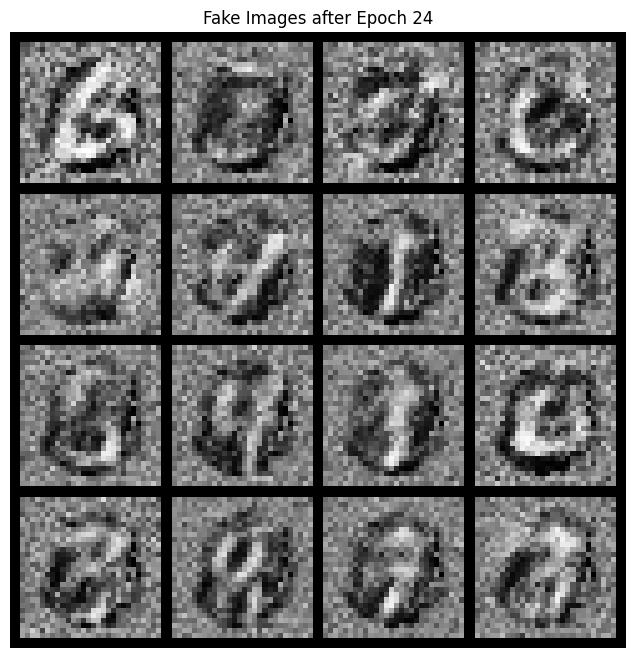

Epoch [25/100], Step [0/1875], Discriminator Loss: 1.1075, Generator Loss: 1.6617
Epoch [25/100], Step [100/1875], Discriminator Loss: 0.6697, Generator Loss: 1.5861
Epoch [25/100], Step [200/1875], Discriminator Loss: 0.8362, Generator Loss: 1.5354
Epoch [25/100], Step [300/1875], Discriminator Loss: 0.9790, Generator Loss: 1.2864
Epoch [25/100], Step [400/1875], Discriminator Loss: 0.9432, Generator Loss: 1.4540
Epoch [25/100], Step [500/1875], Discriminator Loss: 0.8328, Generator Loss: 1.4550
Epoch [25/100], Step [600/1875], Discriminator Loss: 0.7749, Generator Loss: 1.7975
Epoch [25/100], Step [700/1875], Discriminator Loss: 0.7557, Generator Loss: 1.5397
Epoch [25/100], Step [800/1875], Discriminator Loss: 0.8899, Generator Loss: 1.5457
Epoch [25/100], Step [900/1875], Discriminator Loss: 0.7168, Generator Loss: 1.8015
Epoch [25/100], Step [1000/1875], Discriminator Loss: 0.8679, Generator Loss: 1.7342
Epoch [25/100], Step [1100/1875], Discriminator Loss: 0.9739, Generator Loss:

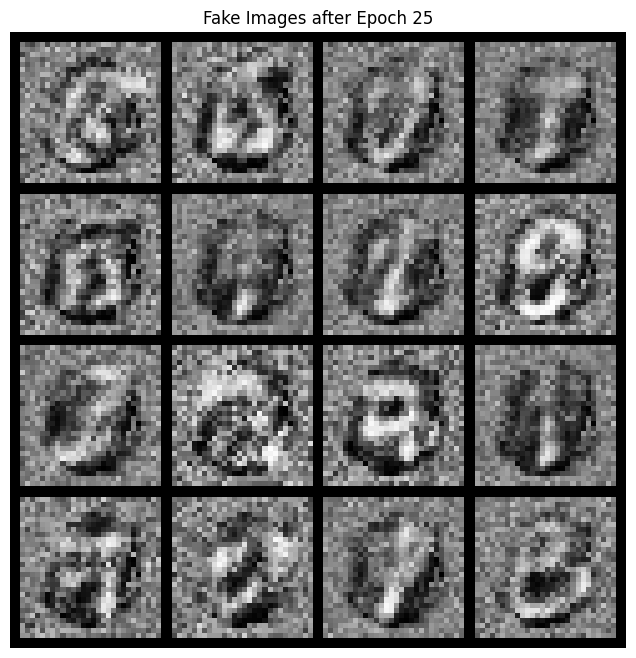

Epoch [26/100], Step [0/1875], Discriminator Loss: 0.5842, Generator Loss: 1.6032
Epoch [26/100], Step [100/1875], Discriminator Loss: 0.5603, Generator Loss: 1.4847
Epoch [26/100], Step [200/1875], Discriminator Loss: 0.6961, Generator Loss: 1.4187
Epoch [26/100], Step [300/1875], Discriminator Loss: 0.9985, Generator Loss: 1.7149
Epoch [26/100], Step [400/1875], Discriminator Loss: 0.9699, Generator Loss: 1.5032
Epoch [26/100], Step [500/1875], Discriminator Loss: 0.9746, Generator Loss: 1.1219
Epoch [26/100], Step [600/1875], Discriminator Loss: 0.8550, Generator Loss: 2.0644
Epoch [26/100], Step [700/1875], Discriminator Loss: 1.0742, Generator Loss: 1.0780
Epoch [26/100], Step [800/1875], Discriminator Loss: 1.0050, Generator Loss: 1.3485
Epoch [26/100], Step [900/1875], Discriminator Loss: 1.1631, Generator Loss: 1.1328
Epoch [26/100], Step [1000/1875], Discriminator Loss: 0.8843, Generator Loss: 1.3125
Epoch [26/100], Step [1100/1875], Discriminator Loss: 1.2618, Generator Loss:

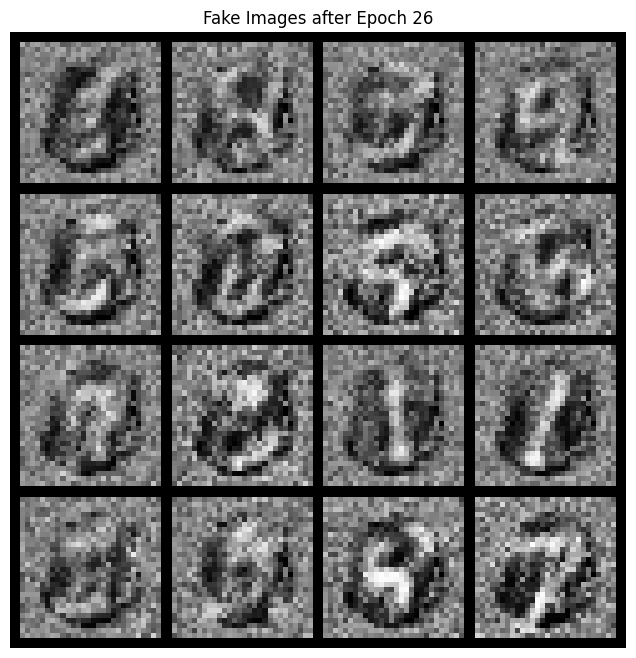

Epoch [27/100], Step [0/1875], Discriminator Loss: 0.6371, Generator Loss: 2.0831
Epoch [27/100], Step [100/1875], Discriminator Loss: 0.7151, Generator Loss: 1.6452
Epoch [27/100], Step [200/1875], Discriminator Loss: 0.7581, Generator Loss: 1.4869
Epoch [27/100], Step [300/1875], Discriminator Loss: 0.8077, Generator Loss: 1.4661
Epoch [27/100], Step [400/1875], Discriminator Loss: 0.8662, Generator Loss: 1.3568
Epoch [27/100], Step [500/1875], Discriminator Loss: 0.8602, Generator Loss: 1.4898
Epoch [27/100], Step [600/1875], Discriminator Loss: 0.6545, Generator Loss: 1.4227
Epoch [27/100], Step [700/1875], Discriminator Loss: 0.6283, Generator Loss: 1.5110
Epoch [27/100], Step [800/1875], Discriminator Loss: 0.8722, Generator Loss: 1.6884
Epoch [27/100], Step [900/1875], Discriminator Loss: 0.7993, Generator Loss: 1.6678
Epoch [27/100], Step [1000/1875], Discriminator Loss: 0.7238, Generator Loss: 1.8522
Epoch [27/100], Step [1100/1875], Discriminator Loss: 0.9358, Generator Loss:

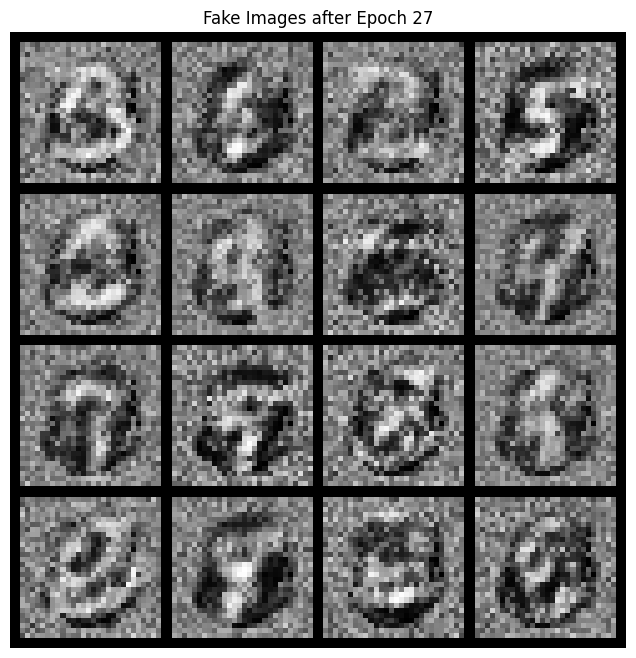

Epoch [28/100], Step [0/1875], Discriminator Loss: 1.0509, Generator Loss: 1.3282
Epoch [28/100], Step [100/1875], Discriminator Loss: 0.7727, Generator Loss: 1.7250
Epoch [28/100], Step [200/1875], Discriminator Loss: 0.8301, Generator Loss: 1.6376
Epoch [28/100], Step [300/1875], Discriminator Loss: 0.8777, Generator Loss: 1.4005
Epoch [28/100], Step [400/1875], Discriminator Loss: 0.5755, Generator Loss: 1.6081
Epoch [28/100], Step [500/1875], Discriminator Loss: 0.6595, Generator Loss: 1.5006
Epoch [28/100], Step [600/1875], Discriminator Loss: 0.7057, Generator Loss: 1.8686
Epoch [28/100], Step [700/1875], Discriminator Loss: 0.5483, Generator Loss: 1.6480
Epoch [28/100], Step [800/1875], Discriminator Loss: 0.7504, Generator Loss: 1.4611
Epoch [28/100], Step [900/1875], Discriminator Loss: 0.5287, Generator Loss: 2.1607
Epoch [28/100], Step [1000/1875], Discriminator Loss: 0.6979, Generator Loss: 1.8019
Epoch [28/100], Step [1100/1875], Discriminator Loss: 0.6877, Generator Loss:

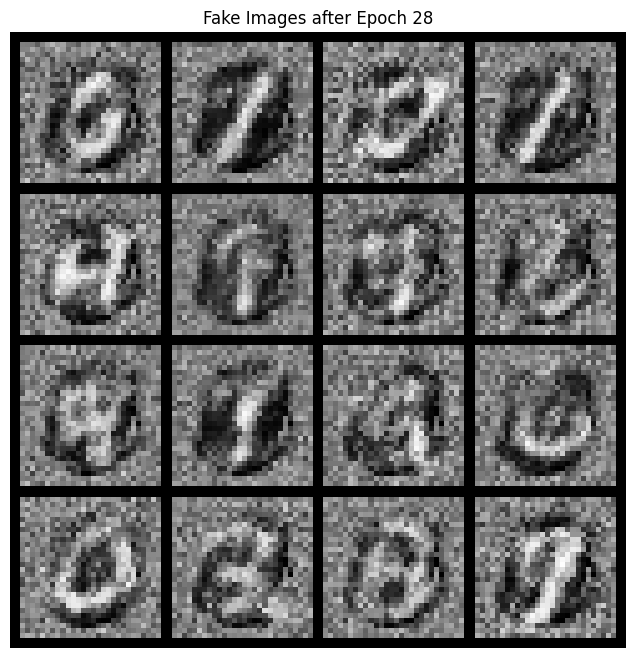

Epoch [29/100], Step [0/1875], Discriminator Loss: 0.9704, Generator Loss: 1.2166
Epoch [29/100], Step [100/1875], Discriminator Loss: 1.1616, Generator Loss: 1.3217
Epoch [29/100], Step [200/1875], Discriminator Loss: 0.7999, Generator Loss: 1.5378
Epoch [29/100], Step [300/1875], Discriminator Loss: 0.6384, Generator Loss: 1.6794
Epoch [29/100], Step [400/1875], Discriminator Loss: 1.0017, Generator Loss: 1.3925
Epoch [29/100], Step [500/1875], Discriminator Loss: 1.3112, Generator Loss: 1.0056
Epoch [29/100], Step [600/1875], Discriminator Loss: 0.8833, Generator Loss: 1.4599
Epoch [29/100], Step [700/1875], Discriminator Loss: 0.7151, Generator Loss: 1.5989
Epoch [29/100], Step [800/1875], Discriminator Loss: 0.8867, Generator Loss: 1.7462
Epoch [29/100], Step [900/1875], Discriminator Loss: 0.8317, Generator Loss: 1.4380
Epoch [29/100], Step [1000/1875], Discriminator Loss: 0.6952, Generator Loss: 1.9474
Epoch [29/100], Step [1100/1875], Discriminator Loss: 1.1217, Generator Loss:

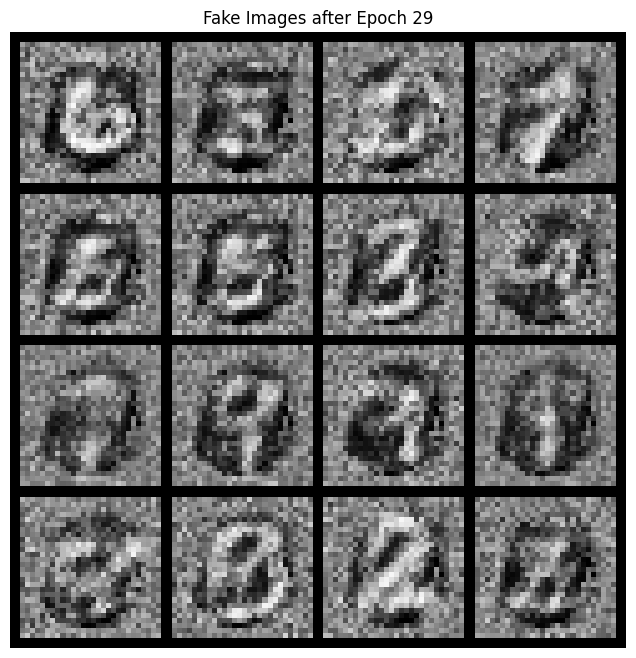

Epoch [30/100], Step [0/1875], Discriminator Loss: 0.8811, Generator Loss: 1.4741
Epoch [30/100], Step [100/1875], Discriminator Loss: 0.8412, Generator Loss: 1.4804
Epoch [30/100], Step [200/1875], Discriminator Loss: 0.9109, Generator Loss: 1.6883
Epoch [30/100], Step [300/1875], Discriminator Loss: 1.1951, Generator Loss: 1.0465
Epoch [30/100], Step [400/1875], Discriminator Loss: 0.6804, Generator Loss: 1.4340
Epoch [30/100], Step [500/1875], Discriminator Loss: 0.7295, Generator Loss: 1.5165
Epoch [30/100], Step [600/1875], Discriminator Loss: 0.8138, Generator Loss: 1.4210
Epoch [30/100], Step [700/1875], Discriminator Loss: 1.1258, Generator Loss: 1.1219
Epoch [30/100], Step [800/1875], Discriminator Loss: 0.7960, Generator Loss: 1.4428
Epoch [30/100], Step [900/1875], Discriminator Loss: 0.8556, Generator Loss: 1.4054
Epoch [30/100], Step [1000/1875], Discriminator Loss: 0.5992, Generator Loss: 1.4486
Epoch [30/100], Step [1100/1875], Discriminator Loss: 0.9721, Generator Loss:

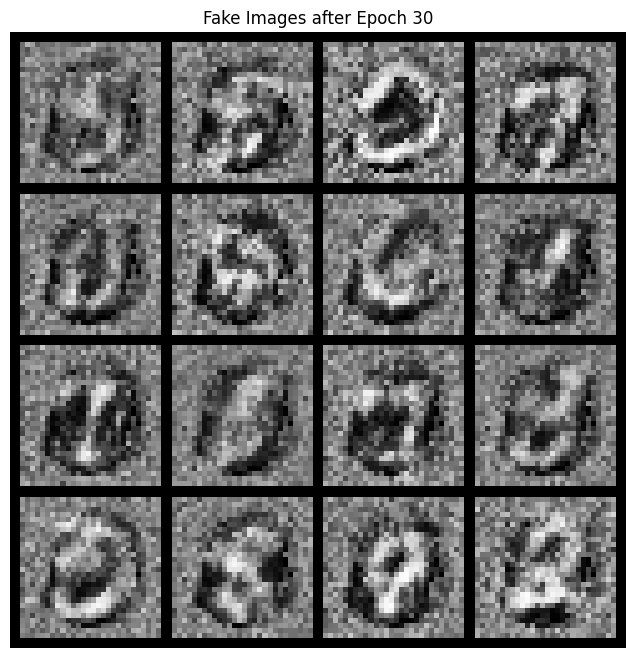

Epoch [31/100], Step [0/1875], Discriminator Loss: 1.1177, Generator Loss: 1.0188
Epoch [31/100], Step [100/1875], Discriminator Loss: 0.7232, Generator Loss: 1.7966
Epoch [31/100], Step [200/1875], Discriminator Loss: 0.7098, Generator Loss: 1.4838
Epoch [31/100], Step [300/1875], Discriminator Loss: 0.9576, Generator Loss: 1.4714
Epoch [31/100], Step [400/1875], Discriminator Loss: 0.5030, Generator Loss: 1.8434
Epoch [31/100], Step [500/1875], Discriminator Loss: 0.9641, Generator Loss: 1.1722
Epoch [31/100], Step [600/1875], Discriminator Loss: 0.5251, Generator Loss: 1.7903
Epoch [31/100], Step [700/1875], Discriminator Loss: 0.9066, Generator Loss: 1.3178
Epoch [31/100], Step [800/1875], Discriminator Loss: 0.7920, Generator Loss: 1.7172
Epoch [31/100], Step [900/1875], Discriminator Loss: 1.2597, Generator Loss: 1.3241
Epoch [31/100], Step [1000/1875], Discriminator Loss: 0.7375, Generator Loss: 1.6162
Epoch [31/100], Step [1100/1875], Discriminator Loss: 0.9888, Generator Loss:

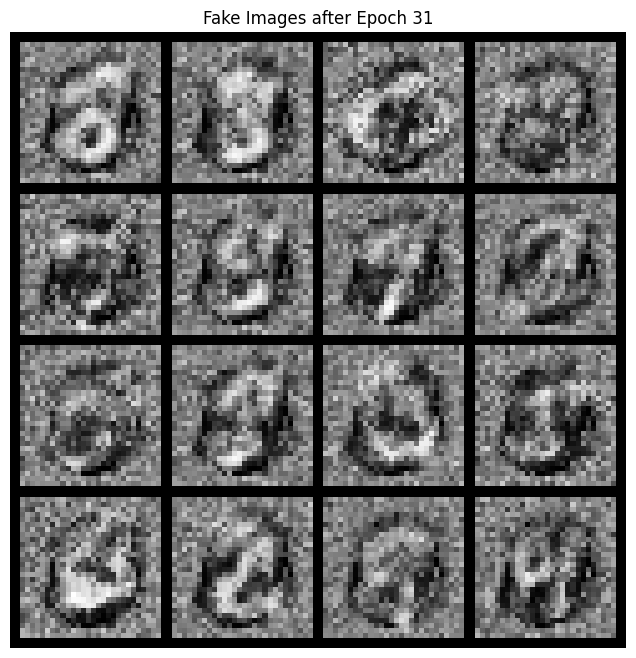

Epoch [32/100], Step [0/1875], Discriminator Loss: 0.6866, Generator Loss: 1.5075
Epoch [32/100], Step [100/1875], Discriminator Loss: 0.7104, Generator Loss: 1.6508
Epoch [32/100], Step [200/1875], Discriminator Loss: 0.9228, Generator Loss: 1.6831
Epoch [32/100], Step [300/1875], Discriminator Loss: 0.8616, Generator Loss: 1.6283
Epoch [32/100], Step [400/1875], Discriminator Loss: 1.0740, Generator Loss: 1.3551
Epoch [32/100], Step [500/1875], Discriminator Loss: 1.3741, Generator Loss: 1.5550
Epoch [32/100], Step [600/1875], Discriminator Loss: 0.6528, Generator Loss: 1.5560
Epoch [32/100], Step [700/1875], Discriminator Loss: 0.6394, Generator Loss: 1.6878
Epoch [32/100], Step [800/1875], Discriminator Loss: 0.7084, Generator Loss: 1.2432
Epoch [32/100], Step [900/1875], Discriminator Loss: 0.9744, Generator Loss: 1.1820
Epoch [32/100], Step [1000/1875], Discriminator Loss: 0.5040, Generator Loss: 1.9981
Epoch [32/100], Step [1100/1875], Discriminator Loss: 0.6008, Generator Loss:

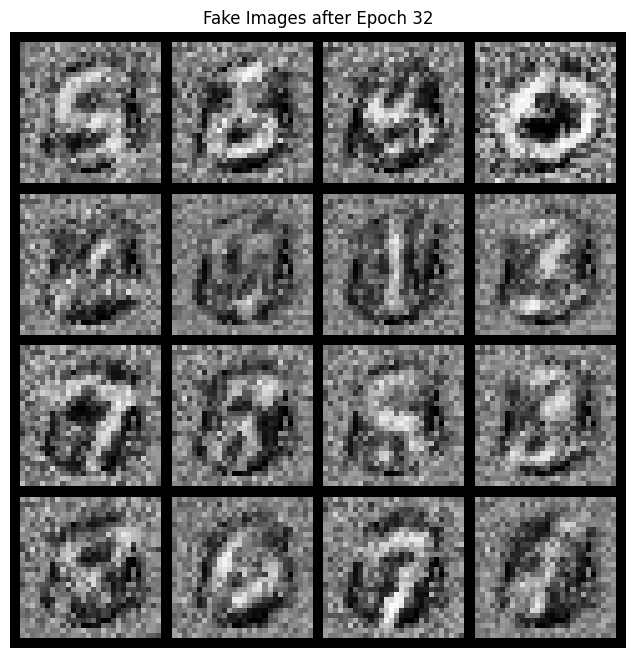

Epoch [33/100], Step [0/1875], Discriminator Loss: 0.7543, Generator Loss: 1.4425
Epoch [33/100], Step [100/1875], Discriminator Loss: 1.2168, Generator Loss: 1.3136
Epoch [33/100], Step [200/1875], Discriminator Loss: 0.7934, Generator Loss: 1.4483
Epoch [33/100], Step [300/1875], Discriminator Loss: 0.6285, Generator Loss: 1.7834
Epoch [33/100], Step [400/1875], Discriminator Loss: 1.1622, Generator Loss: 1.1688
Epoch [33/100], Step [500/1875], Discriminator Loss: 0.8793, Generator Loss: 1.3328
Epoch [33/100], Step [600/1875], Discriminator Loss: 1.0212, Generator Loss: 1.5060
Epoch [33/100], Step [700/1875], Discriminator Loss: 0.9755, Generator Loss: 1.7161
Epoch [33/100], Step [800/1875], Discriminator Loss: 0.9048, Generator Loss: 1.6381
Epoch [33/100], Step [900/1875], Discriminator Loss: 0.9865, Generator Loss: 1.2779
Epoch [33/100], Step [1000/1875], Discriminator Loss: 1.0646, Generator Loss: 1.7851
Epoch [33/100], Step [1100/1875], Discriminator Loss: 1.0884, Generator Loss:

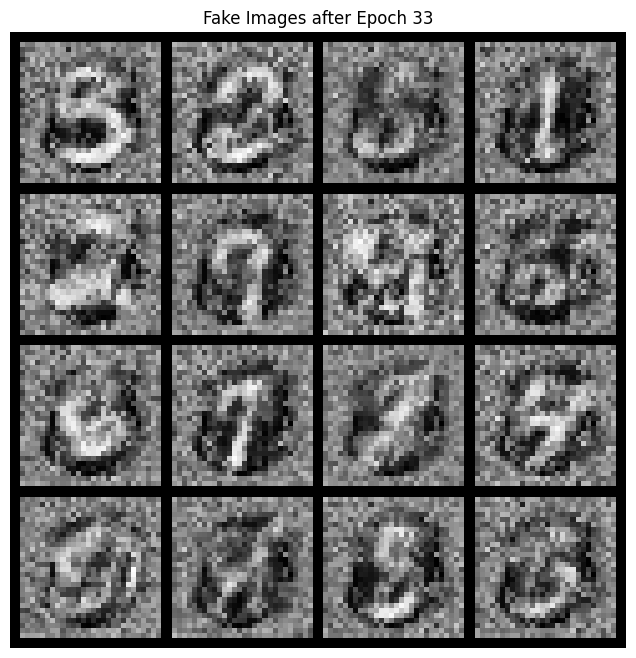

Epoch [34/100], Step [0/1875], Discriminator Loss: 0.9008, Generator Loss: 1.2870
Epoch [34/100], Step [100/1875], Discriminator Loss: 1.1254, Generator Loss: 1.7223
Epoch [34/100], Step [200/1875], Discriminator Loss: 0.5668, Generator Loss: 1.8645
Epoch [34/100], Step [300/1875], Discriminator Loss: 0.7788, Generator Loss: 1.7599
Epoch [34/100], Step [400/1875], Discriminator Loss: 0.7147, Generator Loss: 1.1975
Epoch [34/100], Step [500/1875], Discriminator Loss: 0.6519, Generator Loss: 1.5741
Epoch [34/100], Step [600/1875], Discriminator Loss: 0.6465, Generator Loss: 1.8909
Epoch [34/100], Step [700/1875], Discriminator Loss: 0.8501, Generator Loss: 1.3357
Epoch [34/100], Step [800/1875], Discriminator Loss: 0.8045, Generator Loss: 1.4749
Epoch [34/100], Step [900/1875], Discriminator Loss: 0.5435, Generator Loss: 1.9073
Epoch [34/100], Step [1000/1875], Discriminator Loss: 0.6366, Generator Loss: 1.8629
Epoch [34/100], Step [1100/1875], Discriminator Loss: 1.1744, Generator Loss:

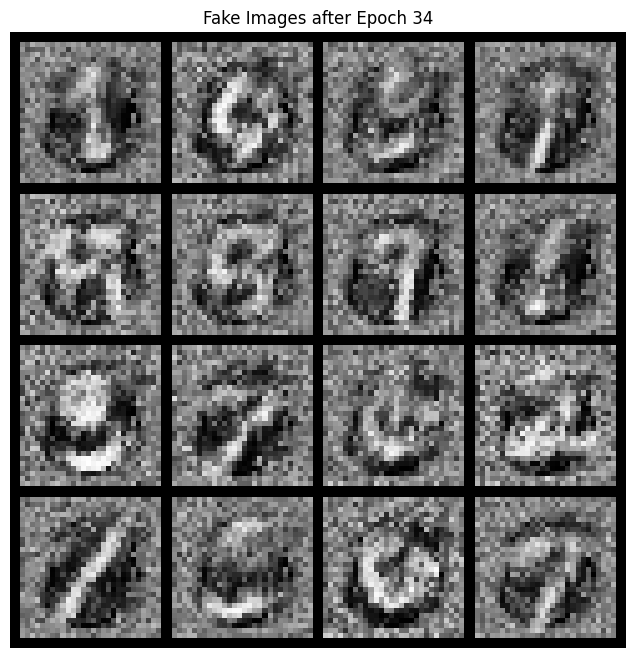

Epoch [35/100], Step [0/1875], Discriminator Loss: 1.0936, Generator Loss: 1.4285
Epoch [35/100], Step [100/1875], Discriminator Loss: 1.1859, Generator Loss: 1.1592
Epoch [35/100], Step [200/1875], Discriminator Loss: 0.8272, Generator Loss: 1.4241
Epoch [35/100], Step [300/1875], Discriminator Loss: 0.8232, Generator Loss: 1.6673
Epoch [35/100], Step [400/1875], Discriminator Loss: 1.0268, Generator Loss: 1.5717
Epoch [35/100], Step [500/1875], Discriminator Loss: 0.6682, Generator Loss: 1.5559
Epoch [35/100], Step [600/1875], Discriminator Loss: 0.6837, Generator Loss: 1.3266
Epoch [35/100], Step [700/1875], Discriminator Loss: 0.8369, Generator Loss: 1.1320
Epoch [35/100], Step [800/1875], Discriminator Loss: 0.9847, Generator Loss: 1.3226
Epoch [35/100], Step [900/1875], Discriminator Loss: 1.2218, Generator Loss: 1.5093
Epoch [35/100], Step [1000/1875], Discriminator Loss: 1.3408, Generator Loss: 1.0273
Epoch [35/100], Step [1100/1875], Discriminator Loss: 0.7752, Generator Loss:

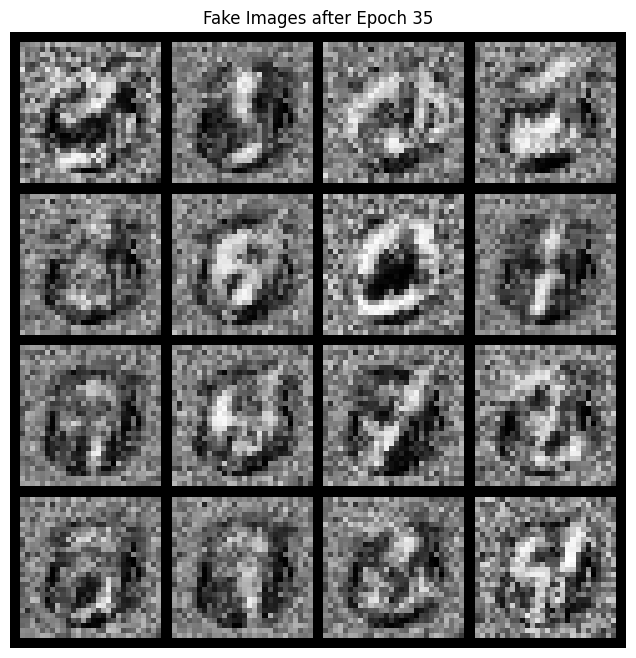

Epoch [36/100], Step [0/1875], Discriminator Loss: 0.9139, Generator Loss: 1.3989
Epoch [36/100], Step [100/1875], Discriminator Loss: 1.0232, Generator Loss: 1.2895
Epoch [36/100], Step [200/1875], Discriminator Loss: 0.8141, Generator Loss: 1.4337
Epoch [36/100], Step [300/1875], Discriminator Loss: 1.0220, Generator Loss: 1.2508
Epoch [36/100], Step [400/1875], Discriminator Loss: 1.0669, Generator Loss: 1.2435
Epoch [36/100], Step [500/1875], Discriminator Loss: 0.5092, Generator Loss: 1.8043
Epoch [36/100], Step [600/1875], Discriminator Loss: 0.7573, Generator Loss: 1.2094
Epoch [36/100], Step [700/1875], Discriminator Loss: 0.6686, Generator Loss: 1.4150
Epoch [36/100], Step [800/1875], Discriminator Loss: 1.1001, Generator Loss: 1.4325
Epoch [36/100], Step [900/1875], Discriminator Loss: 0.7099, Generator Loss: 1.5617
Epoch [36/100], Step [1000/1875], Discriminator Loss: 1.0599, Generator Loss: 1.4436
Epoch [36/100], Step [1100/1875], Discriminator Loss: 0.9035, Generator Loss:

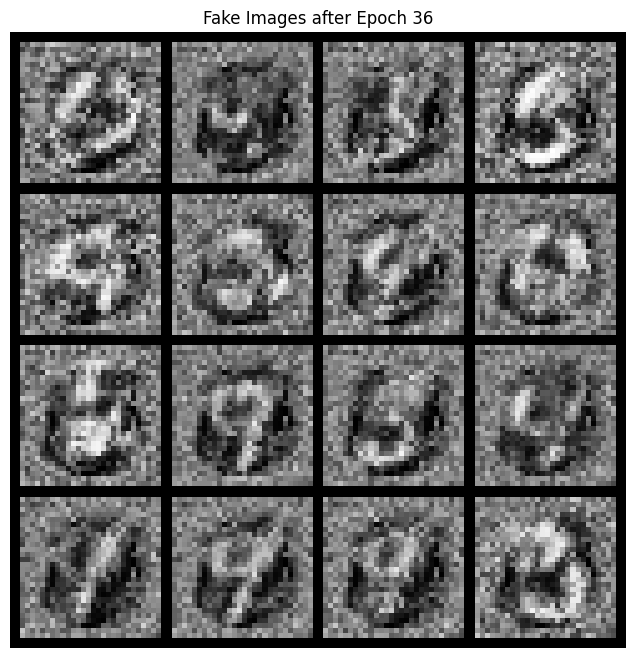

Epoch [37/100], Step [0/1875], Discriminator Loss: 0.7432, Generator Loss: 1.7049
Epoch [37/100], Step [100/1875], Discriminator Loss: 0.8029, Generator Loss: 1.3143
Epoch [37/100], Step [200/1875], Discriminator Loss: 0.8216, Generator Loss: 1.3446
Epoch [37/100], Step [300/1875], Discriminator Loss: 1.3224, Generator Loss: 1.5120
Epoch [37/100], Step [400/1875], Discriminator Loss: 0.9614, Generator Loss: 1.3335
Epoch [37/100], Step [500/1875], Discriminator Loss: 0.8955, Generator Loss: 1.7138
Epoch [37/100], Step [600/1875], Discriminator Loss: 0.8170, Generator Loss: 1.8991
Epoch [37/100], Step [700/1875], Discriminator Loss: 0.9952, Generator Loss: 1.1762
Epoch [37/100], Step [800/1875], Discriminator Loss: 0.9963, Generator Loss: 1.3307
Epoch [37/100], Step [900/1875], Discriminator Loss: 0.7242, Generator Loss: 1.6676
Epoch [37/100], Step [1000/1875], Discriminator Loss: 0.6310, Generator Loss: 1.3948
Epoch [37/100], Step [1100/1875], Discriminator Loss: 0.9892, Generator Loss:

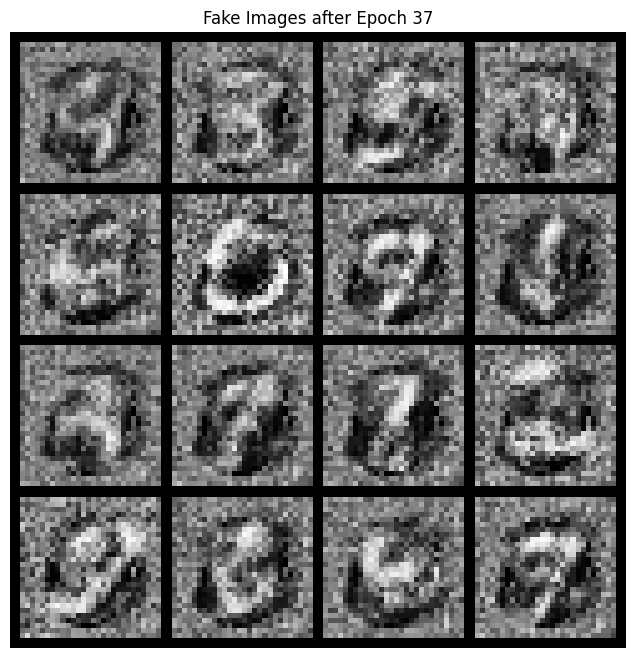

Epoch [38/100], Step [0/1875], Discriminator Loss: 1.4254, Generator Loss: 1.0304
Epoch [38/100], Step [100/1875], Discriminator Loss: 0.8578, Generator Loss: 1.4156
Epoch [38/100], Step [200/1875], Discriminator Loss: 0.7188, Generator Loss: 1.5889
Epoch [38/100], Step [300/1875], Discriminator Loss: 0.6793, Generator Loss: 1.6859
Epoch [38/100], Step [400/1875], Discriminator Loss: 0.5383, Generator Loss: 1.9497
Epoch [38/100], Step [500/1875], Discriminator Loss: 0.7085, Generator Loss: 1.7475
Epoch [38/100], Step [600/1875], Discriminator Loss: 0.8871, Generator Loss: 1.7557
Epoch [38/100], Step [700/1875], Discriminator Loss: 0.7132, Generator Loss: 1.3994
Epoch [38/100], Step [800/1875], Discriminator Loss: 0.7793, Generator Loss: 1.7822
Epoch [38/100], Step [900/1875], Discriminator Loss: 0.6518, Generator Loss: 1.5923
Epoch [38/100], Step [1000/1875], Discriminator Loss: 1.4381, Generator Loss: 1.2313
Epoch [38/100], Step [1100/1875], Discriminator Loss: 1.2739, Generator Loss:

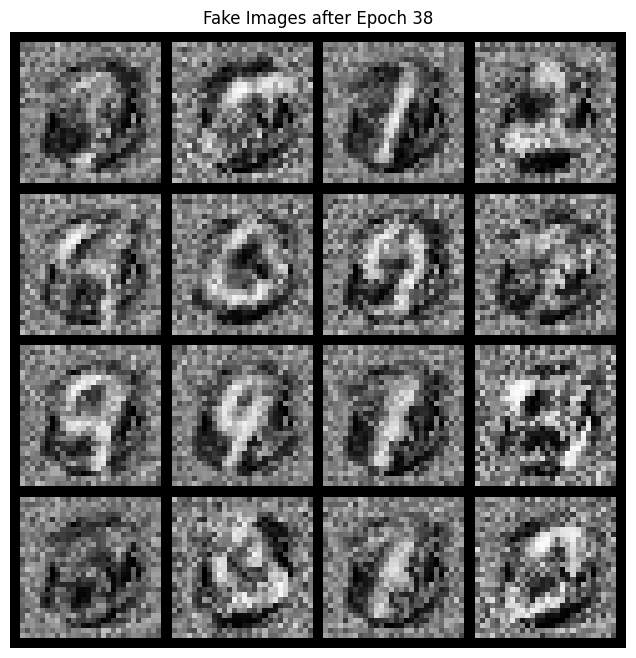

Epoch [39/100], Step [0/1875], Discriminator Loss: 0.9588, Generator Loss: 1.5454
Epoch [39/100], Step [100/1875], Discriminator Loss: 0.8208, Generator Loss: 1.6442
Epoch [39/100], Step [200/1875], Discriminator Loss: 1.0813, Generator Loss: 1.4595
Epoch [39/100], Step [300/1875], Discriminator Loss: 0.5858, Generator Loss: 1.7961
Epoch [39/100], Step [400/1875], Discriminator Loss: 0.7367, Generator Loss: 1.3633
Epoch [39/100], Step [500/1875], Discriminator Loss: 0.7803, Generator Loss: 1.5344
Epoch [39/100], Step [600/1875], Discriminator Loss: 1.1977, Generator Loss: 1.2676
Epoch [39/100], Step [700/1875], Discriminator Loss: 0.9417, Generator Loss: 1.1627
Epoch [39/100], Step [800/1875], Discriminator Loss: 1.2935, Generator Loss: 1.4126
Epoch [39/100], Step [900/1875], Discriminator Loss: 0.7011, Generator Loss: 1.4611
Epoch [39/100], Step [1000/1875], Discriminator Loss: 0.9950, Generator Loss: 1.6680
Epoch [39/100], Step [1100/1875], Discriminator Loss: 0.8088, Generator Loss:

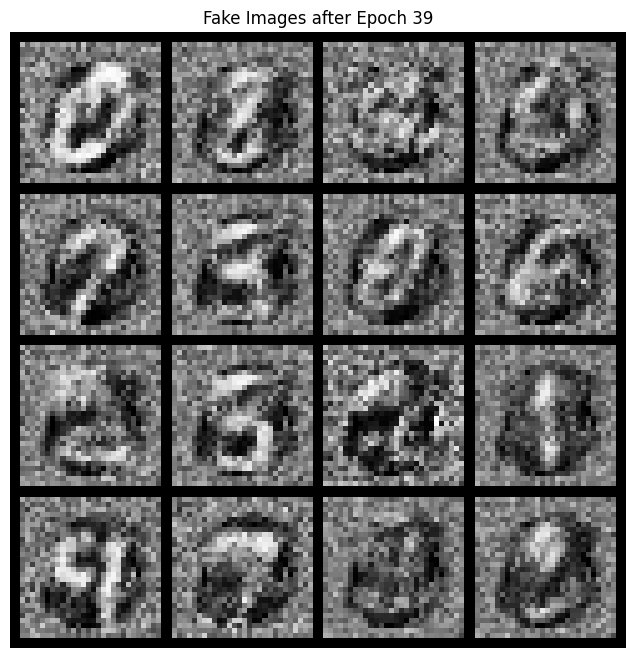

Epoch [40/100], Step [0/1875], Discriminator Loss: 0.6709, Generator Loss: 1.4307
Epoch [40/100], Step [100/1875], Discriminator Loss: 1.0773, Generator Loss: 1.4329
Epoch [40/100], Step [200/1875], Discriminator Loss: 0.9056, Generator Loss: 1.5051
Epoch [40/100], Step [300/1875], Discriminator Loss: 0.6101, Generator Loss: 2.0921
Epoch [40/100], Step [400/1875], Discriminator Loss: 1.0535, Generator Loss: 1.1595
Epoch [40/100], Step [500/1875], Discriminator Loss: 1.2085, Generator Loss: 1.2427
Epoch [40/100], Step [600/1875], Discriminator Loss: 0.9520, Generator Loss: 1.5866
Epoch [40/100], Step [700/1875], Discriminator Loss: 1.0871, Generator Loss: 1.3394
Epoch [40/100], Step [800/1875], Discriminator Loss: 1.0463, Generator Loss: 1.0843
Epoch [40/100], Step [900/1875], Discriminator Loss: 1.3450, Generator Loss: 1.1606
Epoch [40/100], Step [1000/1875], Discriminator Loss: 1.3498, Generator Loss: 1.2123
Epoch [40/100], Step [1100/1875], Discriminator Loss: 0.9427, Generator Loss:

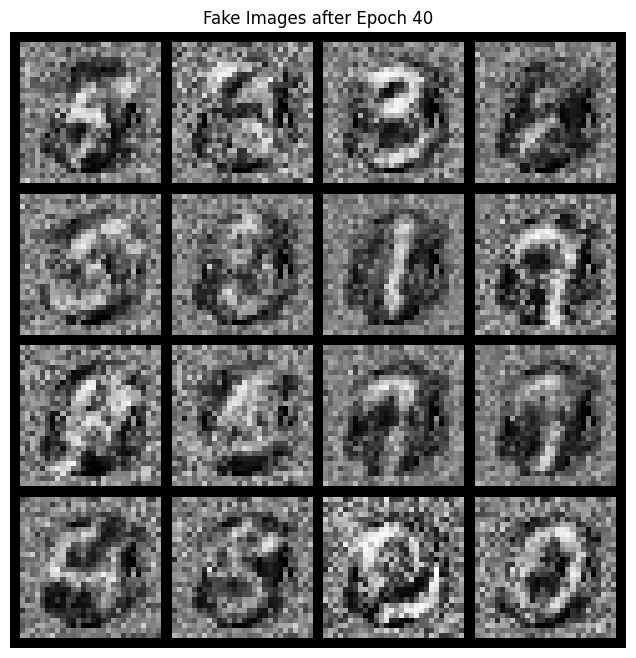

Epoch [41/100], Step [0/1875], Discriminator Loss: 0.8210, Generator Loss: 1.3891
Epoch [41/100], Step [100/1875], Discriminator Loss: 1.0564, Generator Loss: 1.4669
Epoch [41/100], Step [200/1875], Discriminator Loss: 0.7020, Generator Loss: 1.6630
Epoch [41/100], Step [300/1875], Discriminator Loss: 0.9398, Generator Loss: 1.3243
Epoch [41/100], Step [400/1875], Discriminator Loss: 1.1905, Generator Loss: 1.3252
Epoch [41/100], Step [500/1875], Discriminator Loss: 0.8612, Generator Loss: 1.5435
Epoch [41/100], Step [600/1875], Discriminator Loss: 0.9427, Generator Loss: 1.3543
Epoch [41/100], Step [700/1875], Discriminator Loss: 0.7632, Generator Loss: 1.6244
Epoch [41/100], Step [800/1875], Discriminator Loss: 0.6761, Generator Loss: 1.9545
Epoch [41/100], Step [900/1875], Discriminator Loss: 1.2763, Generator Loss: 1.2782
Epoch [41/100], Step [1000/1875], Discriminator Loss: 1.0703, Generator Loss: 1.4791
Epoch [41/100], Step [1100/1875], Discriminator Loss: 1.1404, Generator Loss:

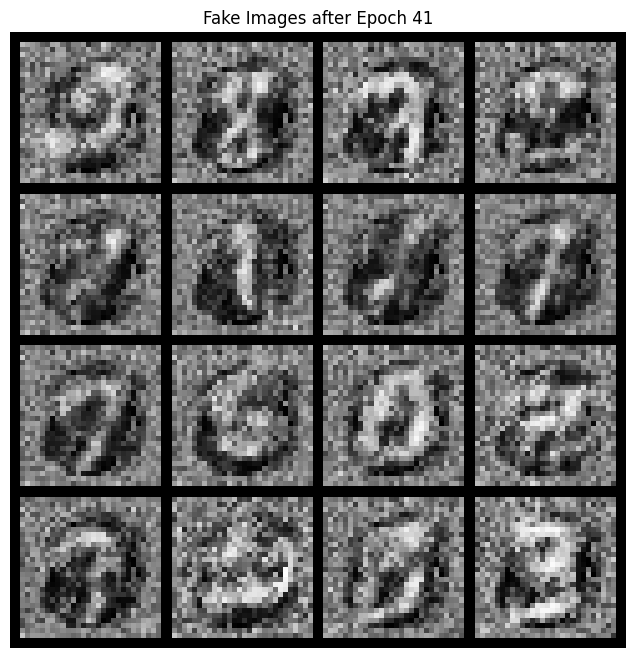

Epoch [42/100], Step [0/1875], Discriminator Loss: 0.6729, Generator Loss: 1.5609
Epoch [42/100], Step [100/1875], Discriminator Loss: 1.4875, Generator Loss: 1.4672
Epoch [42/100], Step [200/1875], Discriminator Loss: 0.7798, Generator Loss: 1.6689
Epoch [42/100], Step [300/1875], Discriminator Loss: 0.8829, Generator Loss: 1.3361
Epoch [42/100], Step [400/1875], Discriminator Loss: 0.7755, Generator Loss: 1.7939
Epoch [42/100], Step [500/1875], Discriminator Loss: 0.8840, Generator Loss: 1.2172
Epoch [42/100], Step [600/1875], Discriminator Loss: 0.7060, Generator Loss: 1.8507
Epoch [42/100], Step [700/1875], Discriminator Loss: 1.0239, Generator Loss: 1.3795
Epoch [42/100], Step [800/1875], Discriminator Loss: 0.8743, Generator Loss: 1.5689
Epoch [42/100], Step [900/1875], Discriminator Loss: 0.6807, Generator Loss: 1.6433
Epoch [42/100], Step [1000/1875], Discriminator Loss: 0.7810, Generator Loss: 1.8383
Epoch [42/100], Step [1100/1875], Discriminator Loss: 1.1977, Generator Loss:

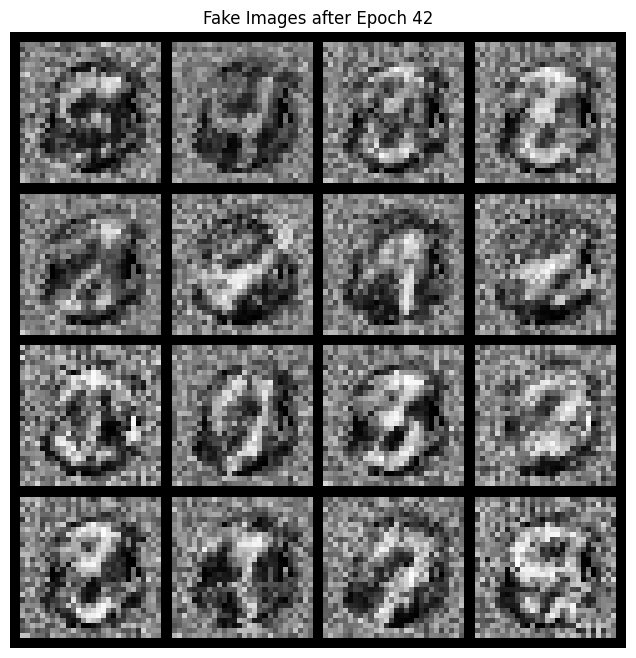

Epoch [43/100], Step [0/1875], Discriminator Loss: 1.2838, Generator Loss: 1.6557
Epoch [43/100], Step [100/1875], Discriminator Loss: 0.7316, Generator Loss: 1.7067
Epoch [43/100], Step [200/1875], Discriminator Loss: 0.7359, Generator Loss: 1.6597
Epoch [43/100], Step [300/1875], Discriminator Loss: 0.9977, Generator Loss: 1.5025
Epoch [43/100], Step [400/1875], Discriminator Loss: 1.1194, Generator Loss: 1.1008
Epoch [43/100], Step [500/1875], Discriminator Loss: 0.7951, Generator Loss: 1.5975
Epoch [43/100], Step [600/1875], Discriminator Loss: 0.9312, Generator Loss: 1.6155
Epoch [43/100], Step [700/1875], Discriminator Loss: 0.7223, Generator Loss: 1.5648
Epoch [43/100], Step [800/1875], Discriminator Loss: 1.1774, Generator Loss: 0.9654
Epoch [43/100], Step [900/1875], Discriminator Loss: 0.9649, Generator Loss: 1.4679
Epoch [43/100], Step [1000/1875], Discriminator Loss: 0.8409, Generator Loss: 1.3209
Epoch [43/100], Step [1100/1875], Discriminator Loss: 1.1520, Generator Loss:

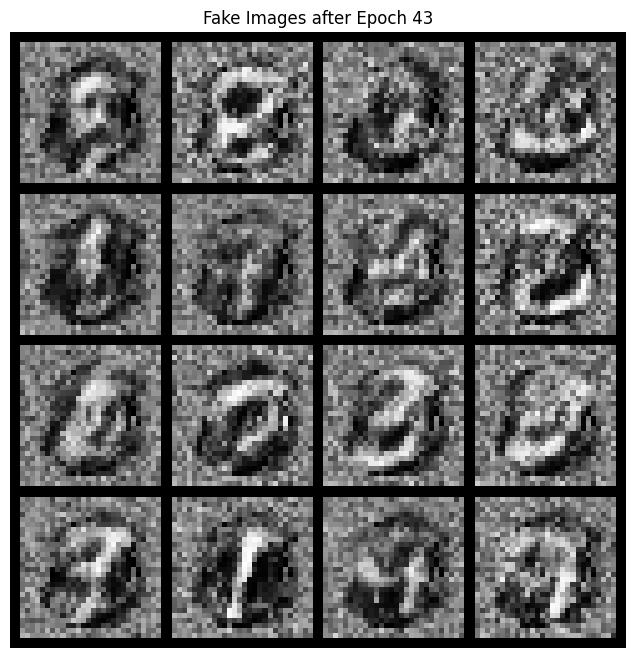

Epoch [44/100], Step [0/1875], Discriminator Loss: 0.6180, Generator Loss: 2.2223
Epoch [44/100], Step [100/1875], Discriminator Loss: 1.4782, Generator Loss: 1.2965
Epoch [44/100], Step [200/1875], Discriminator Loss: 1.0256, Generator Loss: 1.4580
Epoch [44/100], Step [300/1875], Discriminator Loss: 1.1379, Generator Loss: 1.5796
Epoch [44/100], Step [400/1875], Discriminator Loss: 0.6911, Generator Loss: 1.4646
Epoch [44/100], Step [500/1875], Discriminator Loss: 1.0417, Generator Loss: 1.0416
Epoch [44/100], Step [600/1875], Discriminator Loss: 1.0634, Generator Loss: 1.3120
Epoch [44/100], Step [700/1875], Discriminator Loss: 0.8810, Generator Loss: 1.7844
Epoch [44/100], Step [800/1875], Discriminator Loss: 1.5485, Generator Loss: 1.3325
Epoch [44/100], Step [900/1875], Discriminator Loss: 0.8088, Generator Loss: 1.5837
Epoch [44/100], Step [1000/1875], Discriminator Loss: 0.7318, Generator Loss: 1.3764
Epoch [44/100], Step [1100/1875], Discriminator Loss: 1.2228, Generator Loss:

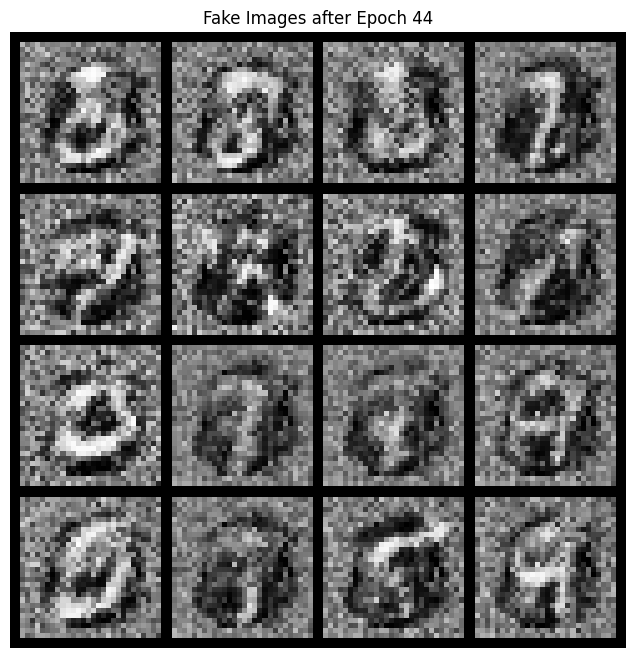

Epoch [45/100], Step [0/1875], Discriminator Loss: 1.2165, Generator Loss: 1.4972
Epoch [45/100], Step [100/1875], Discriminator Loss: 1.0163, Generator Loss: 1.5512
Epoch [45/100], Step [200/1875], Discriminator Loss: 0.9778, Generator Loss: 1.3704
Epoch [45/100], Step [300/1875], Discriminator Loss: 1.1166, Generator Loss: 1.2989
Epoch [45/100], Step [400/1875], Discriminator Loss: 0.9800, Generator Loss: 1.4009
Epoch [45/100], Step [500/1875], Discriminator Loss: 0.8430, Generator Loss: 1.2852
Epoch [45/100], Step [600/1875], Discriminator Loss: 1.4042, Generator Loss: 1.3228
Epoch [45/100], Step [700/1875], Discriminator Loss: 0.6181, Generator Loss: 1.4026
Epoch [45/100], Step [800/1875], Discriminator Loss: 0.9544, Generator Loss: 1.2239
Epoch [45/100], Step [900/1875], Discriminator Loss: 0.8294, Generator Loss: 1.2744
Epoch [45/100], Step [1000/1875], Discriminator Loss: 0.8254, Generator Loss: 1.3984
Epoch [45/100], Step [1100/1875], Discriminator Loss: 1.2542, Generator Loss:

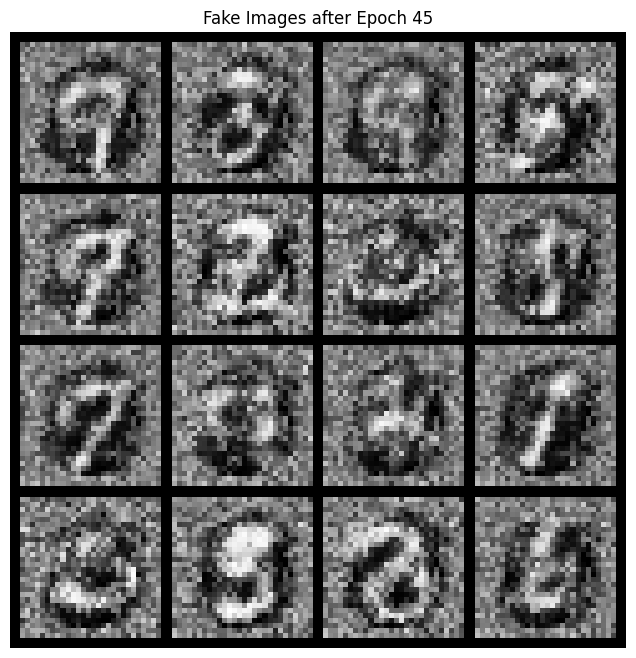

Epoch [46/100], Step [0/1875], Discriminator Loss: 0.5839, Generator Loss: 1.4773
Epoch [46/100], Step [100/1875], Discriminator Loss: 1.2754, Generator Loss: 1.1235
Epoch [46/100], Step [200/1875], Discriminator Loss: 0.8316, Generator Loss: 1.5228
Epoch [46/100], Step [300/1875], Discriminator Loss: 0.9671, Generator Loss: 1.3020
Epoch [46/100], Step [400/1875], Discriminator Loss: 0.6795, Generator Loss: 1.5464
Epoch [46/100], Step [500/1875], Discriminator Loss: 1.0778, Generator Loss: 1.0864
Epoch [46/100], Step [600/1875], Discriminator Loss: 0.9401, Generator Loss: 1.1652
Epoch [46/100], Step [700/1875], Discriminator Loss: 0.9245, Generator Loss: 1.2563
Epoch [46/100], Step [800/1875], Discriminator Loss: 1.0511, Generator Loss: 1.2920
Epoch [46/100], Step [900/1875], Discriminator Loss: 0.6641, Generator Loss: 1.5187
Epoch [46/100], Step [1000/1875], Discriminator Loss: 0.7880, Generator Loss: 1.1941
Epoch [46/100], Step [1100/1875], Discriminator Loss: 0.8176, Generator Loss:

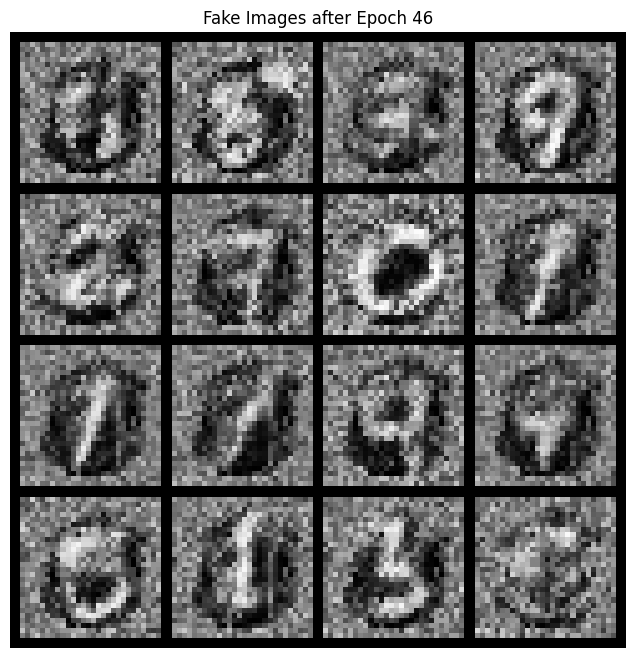

Epoch [47/100], Step [0/1875], Discriminator Loss: 1.1059, Generator Loss: 1.1705
Epoch [47/100], Step [100/1875], Discriminator Loss: 1.0758, Generator Loss: 1.5268
Epoch [47/100], Step [200/1875], Discriminator Loss: 0.9623, Generator Loss: 1.4999
Epoch [47/100], Step [300/1875], Discriminator Loss: 0.6989, Generator Loss: 1.4778
Epoch [47/100], Step [400/1875], Discriminator Loss: 1.0398, Generator Loss: 1.2765
Epoch [47/100], Step [500/1875], Discriminator Loss: 0.7968, Generator Loss: 1.5919
Epoch [47/100], Step [600/1875], Discriminator Loss: 0.9912, Generator Loss: 1.3798
Epoch [47/100], Step [700/1875], Discriminator Loss: 1.1724, Generator Loss: 1.3522
Epoch [47/100], Step [800/1875], Discriminator Loss: 0.8999, Generator Loss: 1.3345
Epoch [47/100], Step [900/1875], Discriminator Loss: 0.8745, Generator Loss: 1.3546
Epoch [47/100], Step [1000/1875], Discriminator Loss: 0.8570, Generator Loss: 1.2867
Epoch [47/100], Step [1100/1875], Discriminator Loss: 0.5781, Generator Loss:

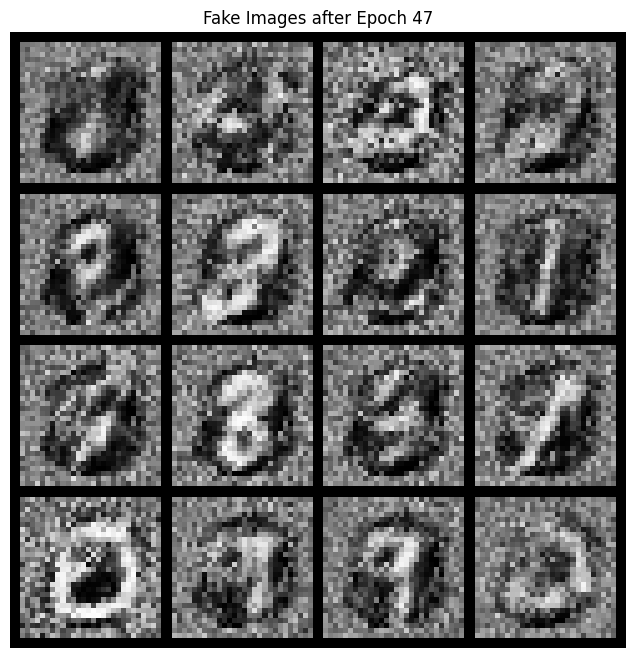

Epoch [48/100], Step [0/1875], Discriminator Loss: 0.8797, Generator Loss: 1.4916
Epoch [48/100], Step [100/1875], Discriminator Loss: 0.7414, Generator Loss: 1.7589
Epoch [48/100], Step [200/1875], Discriminator Loss: 0.9461, Generator Loss: 1.2937
Epoch [48/100], Step [300/1875], Discriminator Loss: 1.0292, Generator Loss: 1.1186
Epoch [48/100], Step [400/1875], Discriminator Loss: 1.1395, Generator Loss: 1.4219
Epoch [48/100], Step [500/1875], Discriminator Loss: 1.0937, Generator Loss: 1.2621
Epoch [48/100], Step [600/1875], Discriminator Loss: 1.2209, Generator Loss: 1.5253
Epoch [48/100], Step [700/1875], Discriminator Loss: 1.0141, Generator Loss: 1.2209
Epoch [48/100], Step [800/1875], Discriminator Loss: 0.9274, Generator Loss: 1.1857
Epoch [48/100], Step [900/1875], Discriminator Loss: 1.0396, Generator Loss: 1.2942
Epoch [48/100], Step [1000/1875], Discriminator Loss: 0.9451, Generator Loss: 1.2314
Epoch [48/100], Step [1100/1875], Discriminator Loss: 1.3420, Generator Loss:

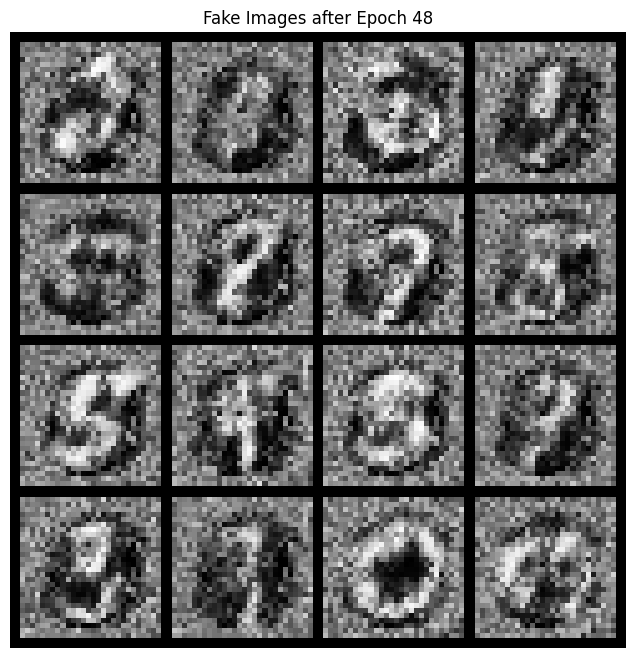

Epoch [49/100], Step [0/1875], Discriminator Loss: 1.2496, Generator Loss: 1.0556
Epoch [49/100], Step [100/1875], Discriminator Loss: 1.0195, Generator Loss: 1.4349
Epoch [49/100], Step [200/1875], Discriminator Loss: 0.9749, Generator Loss: 1.2276
Epoch [49/100], Step [300/1875], Discriminator Loss: 1.5145, Generator Loss: 1.3572
Epoch [49/100], Step [400/1875], Discriminator Loss: 0.6284, Generator Loss: 1.7505
Epoch [49/100], Step [500/1875], Discriminator Loss: 0.8198, Generator Loss: 1.7770
Epoch [49/100], Step [600/1875], Discriminator Loss: 0.9231, Generator Loss: 1.2753
Epoch [49/100], Step [700/1875], Discriminator Loss: 0.6556, Generator Loss: 1.8015
Epoch [49/100], Step [800/1875], Discriminator Loss: 0.9272, Generator Loss: 1.1846
Epoch [49/100], Step [900/1875], Discriminator Loss: 0.8766, Generator Loss: 1.3939
Epoch [49/100], Step [1000/1875], Discriminator Loss: 0.8102, Generator Loss: 1.2453
Epoch [49/100], Step [1100/1875], Discriminator Loss: 1.5000, Generator Loss:

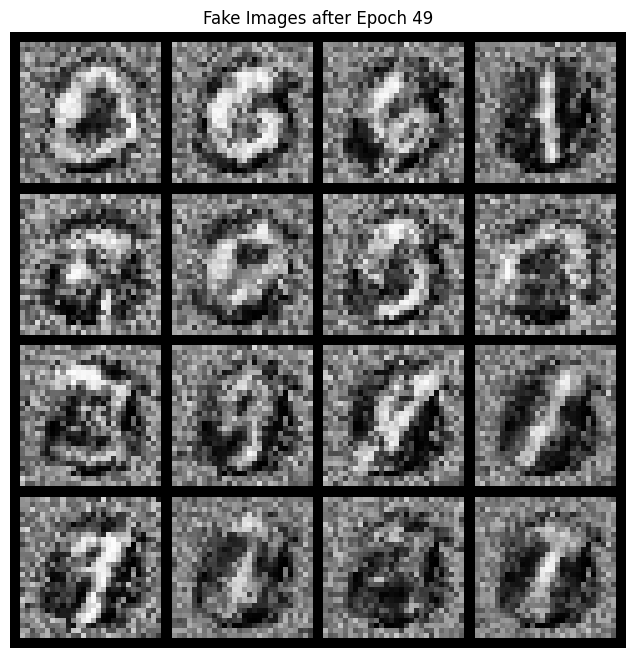

Epoch [50/100], Step [0/1875], Discriminator Loss: 0.7335, Generator Loss: 1.6658
Epoch [50/100], Step [100/1875], Discriminator Loss: 0.5829, Generator Loss: 1.5477
Epoch [50/100], Step [200/1875], Discriminator Loss: 0.8623, Generator Loss: 1.3926
Epoch [50/100], Step [300/1875], Discriminator Loss: 0.6652, Generator Loss: 1.3542
Epoch [50/100], Step [400/1875], Discriminator Loss: 0.8119, Generator Loss: 1.3323
Epoch [50/100], Step [500/1875], Discriminator Loss: 0.9039, Generator Loss: 1.4084
Epoch [50/100], Step [600/1875], Discriminator Loss: 1.0480, Generator Loss: 1.2601
Epoch [50/100], Step [700/1875], Discriminator Loss: 1.1290, Generator Loss: 1.3158
Epoch [50/100], Step [800/1875], Discriminator Loss: 0.9100, Generator Loss: 1.2296
Epoch [50/100], Step [900/1875], Discriminator Loss: 0.7506, Generator Loss: 1.6567
Epoch [50/100], Step [1000/1875], Discriminator Loss: 1.0821, Generator Loss: 1.2527
Epoch [50/100], Step [1100/1875], Discriminator Loss: 0.7016, Generator Loss:

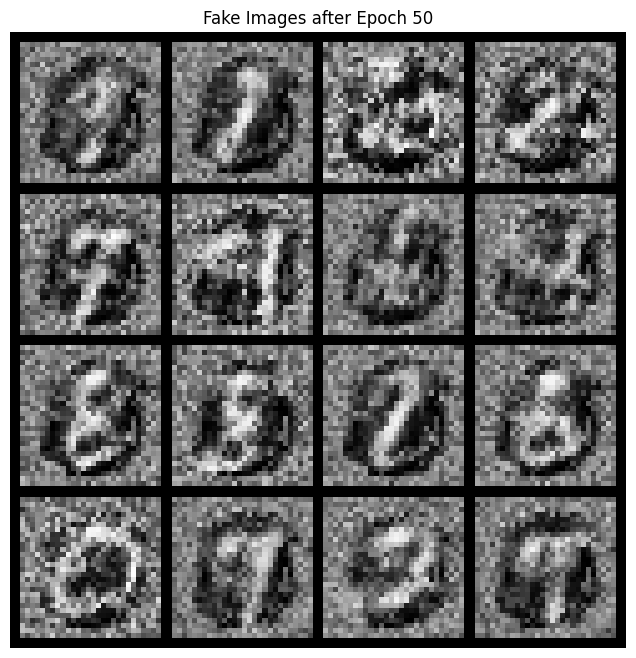

Epoch [51/100], Step [0/1875], Discriminator Loss: 0.7781, Generator Loss: 1.5555
Epoch [51/100], Step [100/1875], Discriminator Loss: 0.8609, Generator Loss: 1.4061
Epoch [51/100], Step [200/1875], Discriminator Loss: 0.8964, Generator Loss: 1.6342
Epoch [51/100], Step [300/1875], Discriminator Loss: 0.9908, Generator Loss: 1.3950
Epoch [51/100], Step [400/1875], Discriminator Loss: 1.0348, Generator Loss: 1.1738
Epoch [51/100], Step [500/1875], Discriminator Loss: 0.7795, Generator Loss: 1.3446
Epoch [51/100], Step [600/1875], Discriminator Loss: 0.8824, Generator Loss: 1.4983
Epoch [51/100], Step [700/1875], Discriminator Loss: 0.8542, Generator Loss: 1.5872
Epoch [51/100], Step [800/1875], Discriminator Loss: 0.7035, Generator Loss: 1.5481
Epoch [51/100], Step [900/1875], Discriminator Loss: 0.9228, Generator Loss: 1.3172
Epoch [51/100], Step [1000/1875], Discriminator Loss: 0.9723, Generator Loss: 1.6930
Epoch [51/100], Step [1100/1875], Discriminator Loss: 0.9788, Generator Loss:

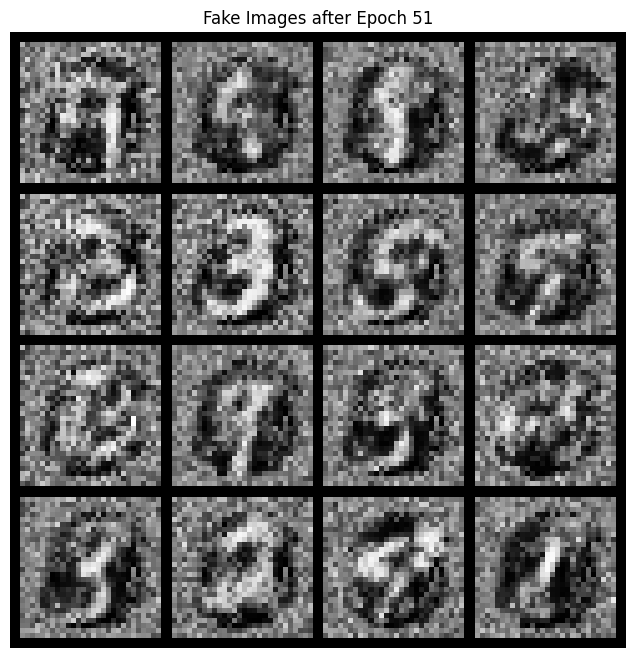

Epoch [52/100], Step [0/1875], Discriminator Loss: 0.9520, Generator Loss: 1.4253
Epoch [52/100], Step [100/1875], Discriminator Loss: 0.6452, Generator Loss: 1.6322
Epoch [52/100], Step [200/1875], Discriminator Loss: 1.2753, Generator Loss: 0.9442
Epoch [52/100], Step [300/1875], Discriminator Loss: 0.7568, Generator Loss: 1.8376
Epoch [52/100], Step [400/1875], Discriminator Loss: 0.8751, Generator Loss: 1.4578
Epoch [52/100], Step [500/1875], Discriminator Loss: 0.7430, Generator Loss: 1.4629
Epoch [52/100], Step [600/1875], Discriminator Loss: 1.0617, Generator Loss: 1.3590
Epoch [52/100], Step [700/1875], Discriminator Loss: 0.9455, Generator Loss: 1.3076
Epoch [52/100], Step [800/1875], Discriminator Loss: 0.7240, Generator Loss: 1.5511
Epoch [52/100], Step [900/1875], Discriminator Loss: 0.7676, Generator Loss: 1.3648
Epoch [52/100], Step [1000/1875], Discriminator Loss: 0.6898, Generator Loss: 1.7842
Epoch [52/100], Step [1100/1875], Discriminator Loss: 0.6464, Generator Loss:

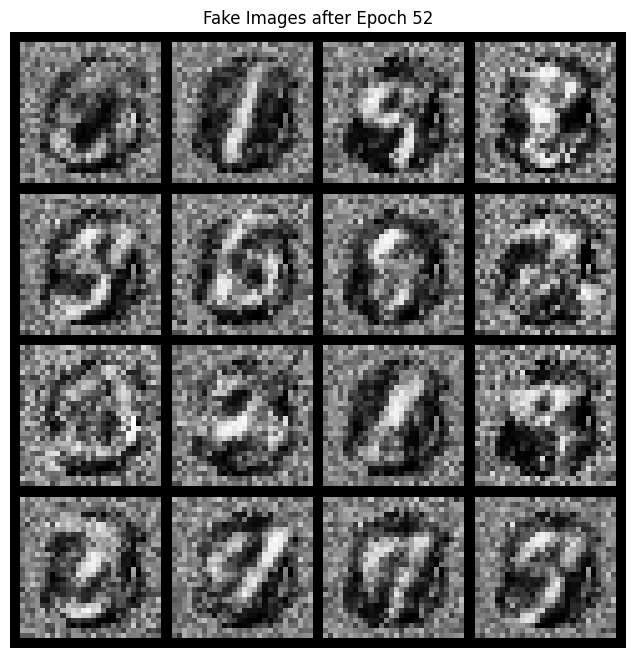

Epoch [53/100], Step [0/1875], Discriminator Loss: 0.9615, Generator Loss: 1.5322
Epoch [53/100], Step [100/1875], Discriminator Loss: 1.3498, Generator Loss: 1.3376
Epoch [53/100], Step [200/1875], Discriminator Loss: 1.0243, Generator Loss: 1.0852
Epoch [53/100], Step [300/1875], Discriminator Loss: 1.2566, Generator Loss: 1.3506
Epoch [53/100], Step [400/1875], Discriminator Loss: 1.4045, Generator Loss: 1.2831
Epoch [53/100], Step [500/1875], Discriminator Loss: 0.9092, Generator Loss: 1.8391
Epoch [53/100], Step [600/1875], Discriminator Loss: 1.0135, Generator Loss: 1.3388
Epoch [53/100], Step [700/1875], Discriminator Loss: 1.0255, Generator Loss: 1.3680
Epoch [53/100], Step [800/1875], Discriminator Loss: 0.6840, Generator Loss: 1.7011
Epoch [53/100], Step [900/1875], Discriminator Loss: 0.7118, Generator Loss: 1.6366
Epoch [53/100], Step [1000/1875], Discriminator Loss: 0.6680, Generator Loss: 1.4519
Epoch [53/100], Step [1100/1875], Discriminator Loss: 0.6968, Generator Loss:

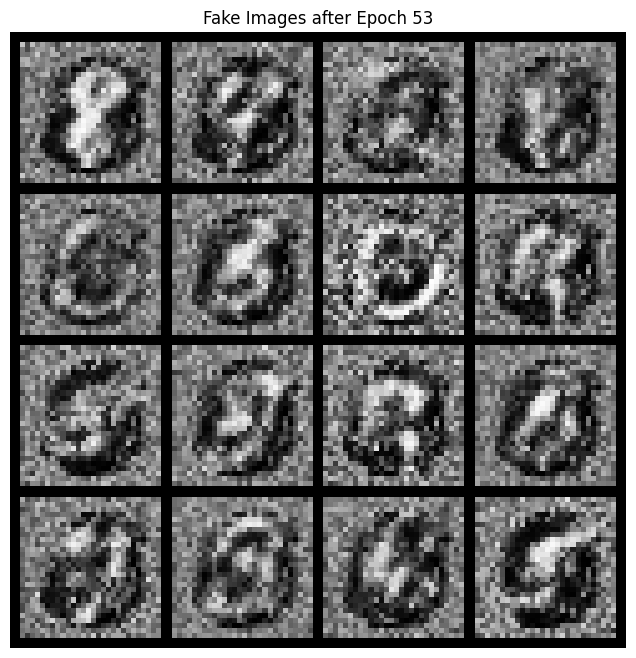

Epoch [54/100], Step [0/1875], Discriminator Loss: 1.4306, Generator Loss: 1.3049
Epoch [54/100], Step [100/1875], Discriminator Loss: 0.5233, Generator Loss: 1.9218
Epoch [54/100], Step [200/1875], Discriminator Loss: 1.3515, Generator Loss: 0.8689
Epoch [54/100], Step [300/1875], Discriminator Loss: 1.0695, Generator Loss: 1.3779
Epoch [54/100], Step [400/1875], Discriminator Loss: 0.8799, Generator Loss: 1.6308
Epoch [54/100], Step [500/1875], Discriminator Loss: 0.8390, Generator Loss: 1.1069
Epoch [54/100], Step [600/1875], Discriminator Loss: 1.1217, Generator Loss: 1.5102
Epoch [54/100], Step [700/1875], Discriminator Loss: 1.1641, Generator Loss: 1.1296
Epoch [54/100], Step [800/1875], Discriminator Loss: 0.8353, Generator Loss: 1.7025
Epoch [54/100], Step [900/1875], Discriminator Loss: 1.0688, Generator Loss: 1.2574
Epoch [54/100], Step [1000/1875], Discriminator Loss: 1.1616, Generator Loss: 1.2204
Epoch [54/100], Step [1100/1875], Discriminator Loss: 0.9133, Generator Loss:

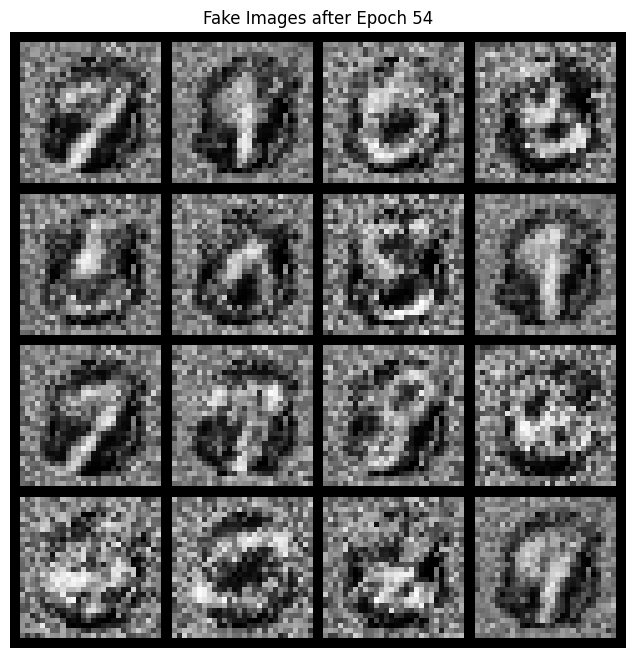

Epoch [55/100], Step [0/1875], Discriminator Loss: 1.3913, Generator Loss: 1.0303
Epoch [55/100], Step [100/1875], Discriminator Loss: 0.7218, Generator Loss: 1.7574
Epoch [55/100], Step [200/1875], Discriminator Loss: 1.0741, Generator Loss: 1.3155
Epoch [55/100], Step [300/1875], Discriminator Loss: 1.0976, Generator Loss: 1.0664
Epoch [55/100], Step [400/1875], Discriminator Loss: 1.2134, Generator Loss: 1.2236
Epoch [55/100], Step [500/1875], Discriminator Loss: 0.8477, Generator Loss: 1.6236
Epoch [55/100], Step [600/1875], Discriminator Loss: 0.7718, Generator Loss: 1.3169
Epoch [55/100], Step [700/1875], Discriminator Loss: 1.0872, Generator Loss: 1.2688
Epoch [55/100], Step [800/1875], Discriminator Loss: 0.9359, Generator Loss: 1.3154
Epoch [55/100], Step [900/1875], Discriminator Loss: 1.0204, Generator Loss: 1.2169
Epoch [55/100], Step [1000/1875], Discriminator Loss: 0.9840, Generator Loss: 1.3525
Epoch [55/100], Step [1100/1875], Discriminator Loss: 0.9962, Generator Loss:

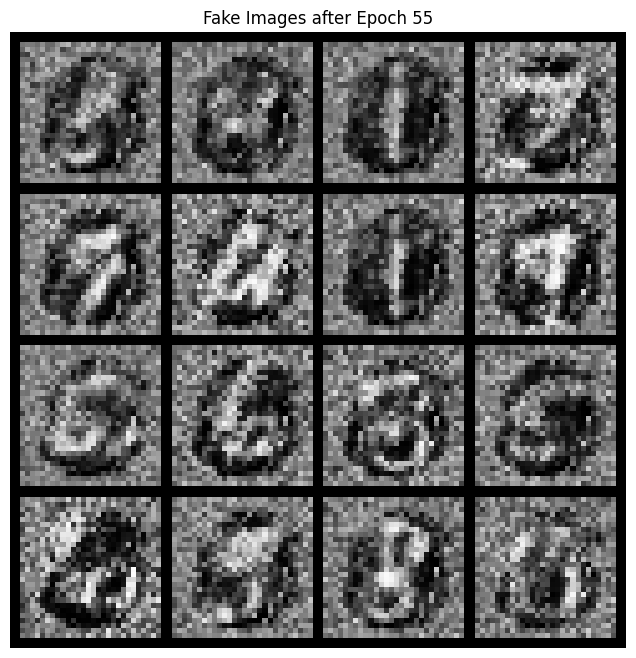

Epoch [56/100], Step [0/1875], Discriminator Loss: 0.8229, Generator Loss: 1.5025
Epoch [56/100], Step [100/1875], Discriminator Loss: 0.9327, Generator Loss: 1.4346
Epoch [56/100], Step [200/1875], Discriminator Loss: 0.5763, Generator Loss: 2.1001
Epoch [56/100], Step [300/1875], Discriminator Loss: 0.9027, Generator Loss: 1.6300
Epoch [56/100], Step [400/1875], Discriminator Loss: 0.7087, Generator Loss: 1.6062
Epoch [56/100], Step [500/1875], Discriminator Loss: 0.5755, Generator Loss: 2.0506
Epoch [56/100], Step [600/1875], Discriminator Loss: 1.2592, Generator Loss: 1.0934
Epoch [56/100], Step [700/1875], Discriminator Loss: 0.9918, Generator Loss: 1.2440
Epoch [56/100], Step [800/1875], Discriminator Loss: 1.1376, Generator Loss: 1.1629
Epoch [56/100], Step [900/1875], Discriminator Loss: 0.9069, Generator Loss: 1.7387
Epoch [56/100], Step [1000/1875], Discriminator Loss: 1.0262, Generator Loss: 1.0099
Epoch [56/100], Step [1100/1875], Discriminator Loss: 0.6794, Generator Loss:

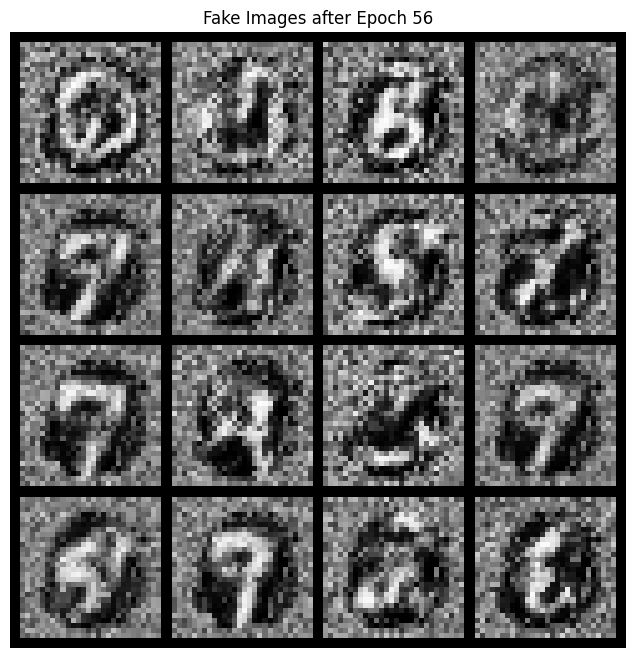

Epoch [57/100], Step [0/1875], Discriminator Loss: 1.3114, Generator Loss: 1.0995
Epoch [57/100], Step [100/1875], Discriminator Loss: 1.2852, Generator Loss: 1.5333
Epoch [57/100], Step [200/1875], Discriminator Loss: 0.7576, Generator Loss: 1.6006
Epoch [57/100], Step [300/1875], Discriminator Loss: 1.3551, Generator Loss: 1.0815
Epoch [57/100], Step [400/1875], Discriminator Loss: 0.8032, Generator Loss: 1.8535
Epoch [57/100], Step [500/1875], Discriminator Loss: 0.9136, Generator Loss: 1.4277
Epoch [57/100], Step [600/1875], Discriminator Loss: 0.9012, Generator Loss: 1.7121
Epoch [57/100], Step [700/1875], Discriminator Loss: 1.0603, Generator Loss: 1.5317
Epoch [57/100], Step [800/1875], Discriminator Loss: 0.8851, Generator Loss: 1.3211
Epoch [57/100], Step [900/1875], Discriminator Loss: 1.4528, Generator Loss: 0.9598
Epoch [57/100], Step [1000/1875], Discriminator Loss: 0.9458, Generator Loss: 1.2015
Epoch [57/100], Step [1100/1875], Discriminator Loss: 0.8585, Generator Loss:

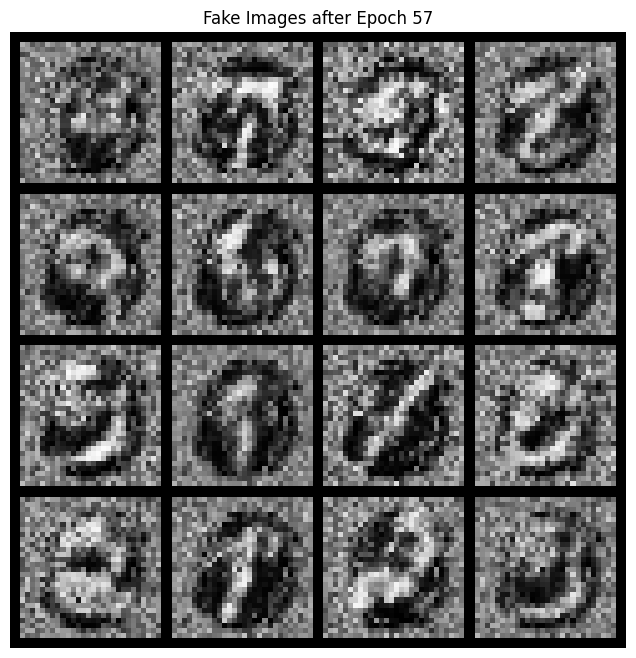

Epoch [58/100], Step [0/1875], Discriminator Loss: 0.6691, Generator Loss: 1.7049
Epoch [58/100], Step [100/1875], Discriminator Loss: 0.8874, Generator Loss: 1.6163
Epoch [58/100], Step [200/1875], Discriminator Loss: 1.0507, Generator Loss: 1.2548
Epoch [58/100], Step [300/1875], Discriminator Loss: 0.5276, Generator Loss: 2.0599
Epoch [58/100], Step [400/1875], Discriminator Loss: 0.9776, Generator Loss: 1.8114
Epoch [58/100], Step [500/1875], Discriminator Loss: 0.9678, Generator Loss: 1.5975
Epoch [58/100], Step [600/1875], Discriminator Loss: 0.9297, Generator Loss: 1.3708
Epoch [58/100], Step [700/1875], Discriminator Loss: 1.5915, Generator Loss: 1.3349
Epoch [58/100], Step [800/1875], Discriminator Loss: 1.4961, Generator Loss: 1.4140
Epoch [58/100], Step [900/1875], Discriminator Loss: 0.7221, Generator Loss: 1.6849
Epoch [58/100], Step [1000/1875], Discriminator Loss: 1.1806, Generator Loss: 1.1780
Epoch [58/100], Step [1100/1875], Discriminator Loss: 0.8750, Generator Loss:

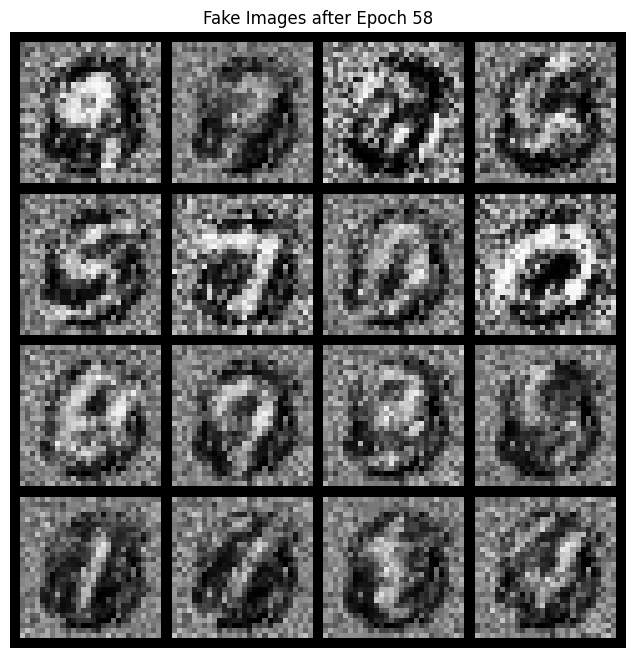

Epoch [59/100], Step [0/1875], Discriminator Loss: 0.8956, Generator Loss: 1.3928
Epoch [59/100], Step [100/1875], Discriminator Loss: 0.7220, Generator Loss: 1.5505
Epoch [59/100], Step [200/1875], Discriminator Loss: 1.1484, Generator Loss: 1.2427
Epoch [59/100], Step [300/1875], Discriminator Loss: 1.0436, Generator Loss: 1.6188
Epoch [59/100], Step [400/1875], Discriminator Loss: 1.0992, Generator Loss: 1.1420
Epoch [59/100], Step [500/1875], Discriminator Loss: 1.1076, Generator Loss: 1.5685
Epoch [59/100], Step [600/1875], Discriminator Loss: 1.2111, Generator Loss: 1.2051
Epoch [59/100], Step [700/1875], Discriminator Loss: 0.7030, Generator Loss: 1.6722
Epoch [59/100], Step [800/1875], Discriminator Loss: 0.8797, Generator Loss: 1.3457
Epoch [59/100], Step [900/1875], Discriminator Loss: 0.9082, Generator Loss: 1.5090
Epoch [59/100], Step [1000/1875], Discriminator Loss: 0.7559, Generator Loss: 1.7071
Epoch [59/100], Step [1100/1875], Discriminator Loss: 1.0079, Generator Loss:

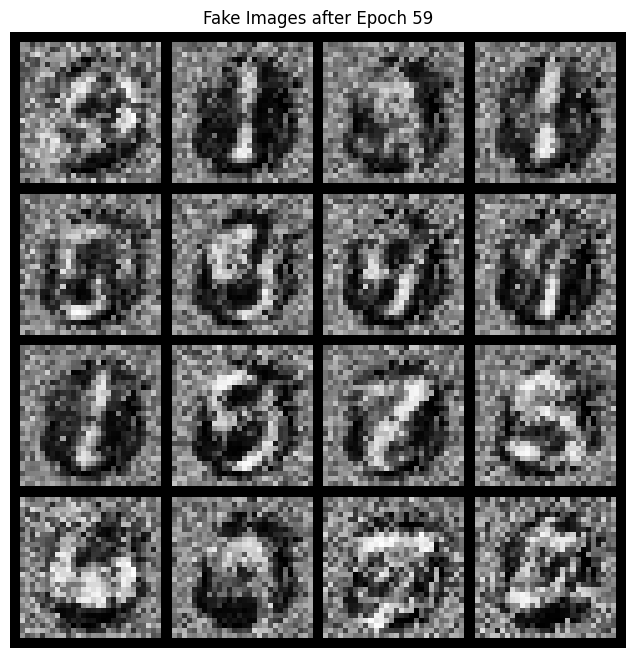

Epoch [60/100], Step [0/1875], Discriminator Loss: 1.0100, Generator Loss: 1.3483
Epoch [60/100], Step [100/1875], Discriminator Loss: 1.2711, Generator Loss: 1.3783
Epoch [60/100], Step [200/1875], Discriminator Loss: 1.1809, Generator Loss: 0.9852
Epoch [60/100], Step [300/1875], Discriminator Loss: 0.6467, Generator Loss: 1.8944
Epoch [60/100], Step [400/1875], Discriminator Loss: 1.1122, Generator Loss: 1.5341
Epoch [60/100], Step [500/1875], Discriminator Loss: 1.0455, Generator Loss: 1.3273
Epoch [60/100], Step [600/1875], Discriminator Loss: 0.9617, Generator Loss: 1.2077
Epoch [60/100], Step [700/1875], Discriminator Loss: 1.3699, Generator Loss: 1.4151
Epoch [60/100], Step [800/1875], Discriminator Loss: 0.9062, Generator Loss: 1.3784
Epoch [60/100], Step [900/1875], Discriminator Loss: 0.9272, Generator Loss: 1.2626
Epoch [60/100], Step [1000/1875], Discriminator Loss: 0.8022, Generator Loss: 1.2778
Epoch [60/100], Step [1100/1875], Discriminator Loss: 0.6239, Generator Loss:

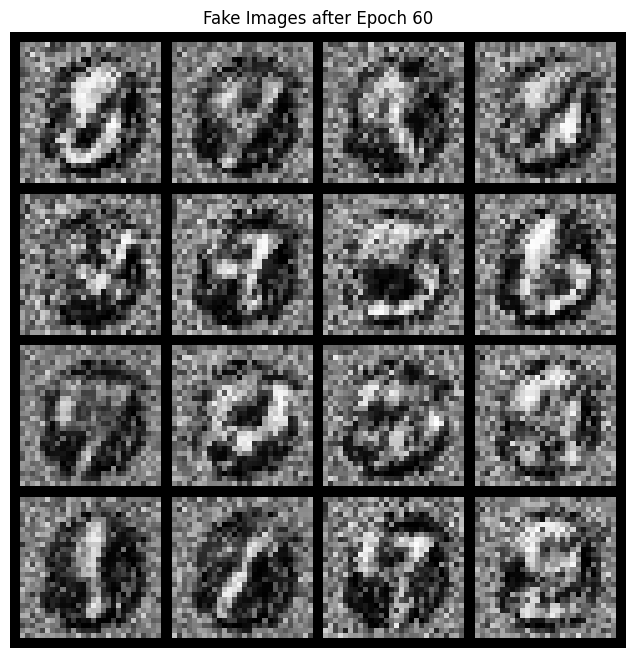

Epoch [61/100], Step [0/1875], Discriminator Loss: 0.7209, Generator Loss: 1.6136
Epoch [61/100], Step [100/1875], Discriminator Loss: 0.9654, Generator Loss: 1.5149
Epoch [61/100], Step [200/1875], Discriminator Loss: 1.0965, Generator Loss: 1.4554
Epoch [61/100], Step [300/1875], Discriminator Loss: 0.8459, Generator Loss: 1.5152
Epoch [61/100], Step [400/1875], Discriminator Loss: 1.0427, Generator Loss: 1.5594
Epoch [61/100], Step [500/1875], Discriminator Loss: 0.8356, Generator Loss: 1.5526
Epoch [61/100], Step [600/1875], Discriminator Loss: 1.2505, Generator Loss: 1.1832
Epoch [61/100], Step [700/1875], Discriminator Loss: 0.6884, Generator Loss: 1.3394
Epoch [61/100], Step [800/1875], Discriminator Loss: 0.9470, Generator Loss: 1.0884
Epoch [61/100], Step [900/1875], Discriminator Loss: 1.0443, Generator Loss: 1.1654
Epoch [61/100], Step [1000/1875], Discriminator Loss: 1.0068, Generator Loss: 1.7310
Epoch [61/100], Step [1100/1875], Discriminator Loss: 1.1380, Generator Loss:

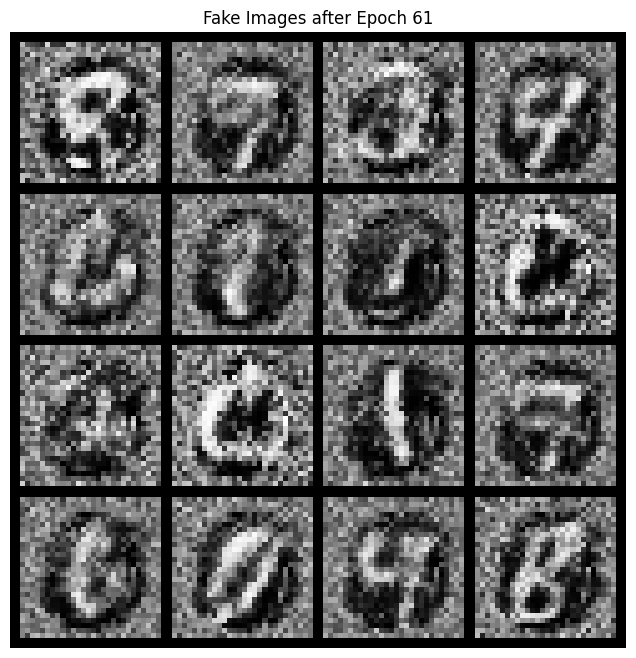

Epoch [62/100], Step [0/1875], Discriminator Loss: 0.9289, Generator Loss: 1.6496
Epoch [62/100], Step [100/1875], Discriminator Loss: 0.7189, Generator Loss: 1.4525
Epoch [62/100], Step [200/1875], Discriminator Loss: 0.9780, Generator Loss: 1.1520
Epoch [62/100], Step [300/1875], Discriminator Loss: 1.1024, Generator Loss: 1.4189
Epoch [62/100], Step [400/1875], Discriminator Loss: 0.8938, Generator Loss: 1.3895
Epoch [62/100], Step [500/1875], Discriminator Loss: 0.7256, Generator Loss: 1.9010
Epoch [62/100], Step [600/1875], Discriminator Loss: 1.0190, Generator Loss: 1.6652
Epoch [62/100], Step [700/1875], Discriminator Loss: 0.9317, Generator Loss: 1.4879
Epoch [62/100], Step [800/1875], Discriminator Loss: 0.9023, Generator Loss: 1.8061
Epoch [62/100], Step [900/1875], Discriminator Loss: 0.8242, Generator Loss: 1.4875
Epoch [62/100], Step [1000/1875], Discriminator Loss: 1.0219, Generator Loss: 1.2624
Epoch [62/100], Step [1100/1875], Discriminator Loss: 0.8827, Generator Loss:

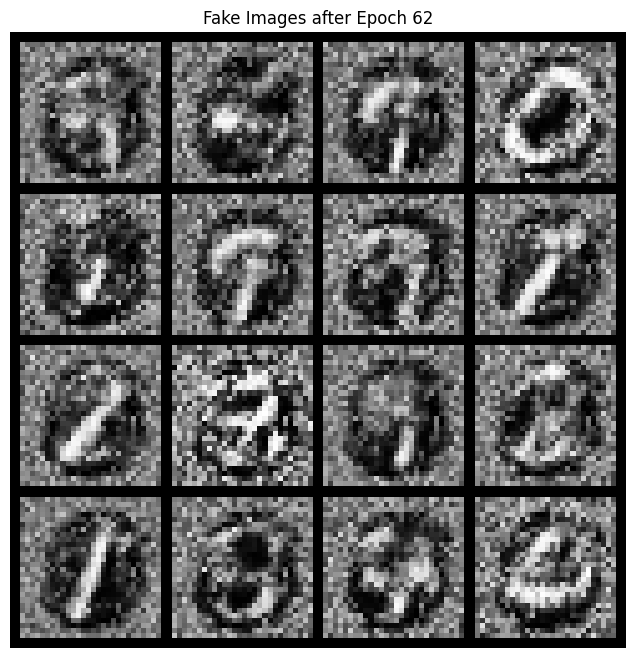

Epoch [63/100], Step [0/1875], Discriminator Loss: 0.9123, Generator Loss: 1.3144
Epoch [63/100], Step [100/1875], Discriminator Loss: 0.8014, Generator Loss: 2.1417
Epoch [63/100], Step [200/1875], Discriminator Loss: 0.9033, Generator Loss: 1.3460
Epoch [63/100], Step [300/1875], Discriminator Loss: 0.9249, Generator Loss: 1.5928
Epoch [63/100], Step [400/1875], Discriminator Loss: 0.7405, Generator Loss: 1.3210
Epoch [63/100], Step [500/1875], Discriminator Loss: 0.8404, Generator Loss: 1.7512
Epoch [63/100], Step [600/1875], Discriminator Loss: 0.6889, Generator Loss: 1.5234
Epoch [63/100], Step [700/1875], Discriminator Loss: 0.7354, Generator Loss: 1.6839
Epoch [63/100], Step [800/1875], Discriminator Loss: 1.1254, Generator Loss: 1.0895
Epoch [63/100], Step [900/1875], Discriminator Loss: 1.2396, Generator Loss: 1.2211
Epoch [63/100], Step [1000/1875], Discriminator Loss: 0.8415, Generator Loss: 1.3568
Epoch [63/100], Step [1100/1875], Discriminator Loss: 0.9612, Generator Loss:

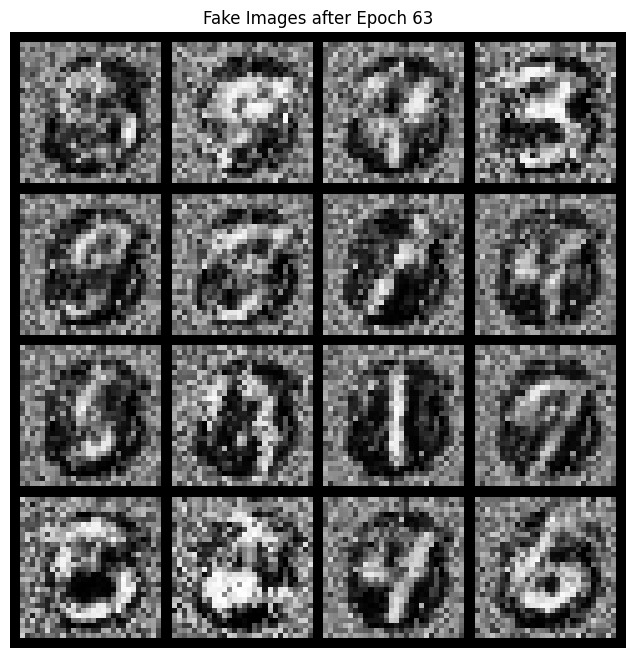

Epoch [64/100], Step [0/1875], Discriminator Loss: 0.8844, Generator Loss: 1.4485
Epoch [64/100], Step [100/1875], Discriminator Loss: 0.9237, Generator Loss: 1.4593
Epoch [64/100], Step [200/1875], Discriminator Loss: 0.9834, Generator Loss: 1.1570
Epoch [64/100], Step [300/1875], Discriminator Loss: 0.8901, Generator Loss: 1.3291
Epoch [64/100], Step [400/1875], Discriminator Loss: 0.7315, Generator Loss: 1.7962
Epoch [64/100], Step [500/1875], Discriminator Loss: 0.7408, Generator Loss: 1.9747
Epoch [64/100], Step [600/1875], Discriminator Loss: 0.7734, Generator Loss: 1.3885
Epoch [64/100], Step [700/1875], Discriminator Loss: 1.2242, Generator Loss: 1.6910
Epoch [64/100], Step [800/1875], Discriminator Loss: 1.0521, Generator Loss: 1.2792
Epoch [64/100], Step [900/1875], Discriminator Loss: 1.1434, Generator Loss: 1.5165
Epoch [64/100], Step [1000/1875], Discriminator Loss: 0.9697, Generator Loss: 1.2566
Epoch [64/100], Step [1100/1875], Discriminator Loss: 0.8980, Generator Loss:

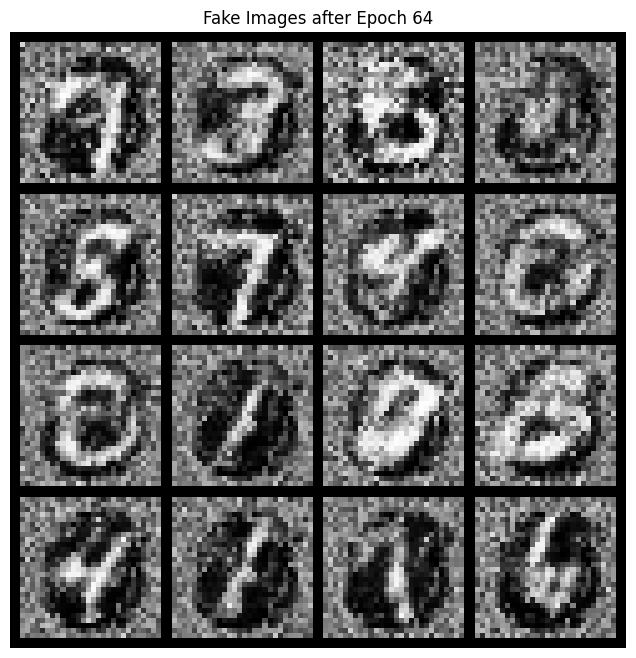

Epoch [65/100], Step [0/1875], Discriminator Loss: 1.0122, Generator Loss: 1.1726
Epoch [65/100], Step [100/1875], Discriminator Loss: 0.6218, Generator Loss: 2.0283
Epoch [65/100], Step [200/1875], Discriminator Loss: 0.8113, Generator Loss: 1.3165
Epoch [65/100], Step [300/1875], Discriminator Loss: 0.7118, Generator Loss: 1.4058
Epoch [65/100], Step [400/1875], Discriminator Loss: 1.2592, Generator Loss: 1.6036
Epoch [65/100], Step [500/1875], Discriminator Loss: 0.9757, Generator Loss: 1.3488
Epoch [65/100], Step [600/1875], Discriminator Loss: 1.3324, Generator Loss: 1.2642
Epoch [65/100], Step [700/1875], Discriminator Loss: 1.0590, Generator Loss: 1.4340
Epoch [65/100], Step [800/1875], Discriminator Loss: 1.0458, Generator Loss: 1.1099
Epoch [65/100], Step [900/1875], Discriminator Loss: 0.9906, Generator Loss: 1.3179
Epoch [65/100], Step [1000/1875], Discriminator Loss: 0.7456, Generator Loss: 1.2984
Epoch [65/100], Step [1100/1875], Discriminator Loss: 1.2160, Generator Loss:

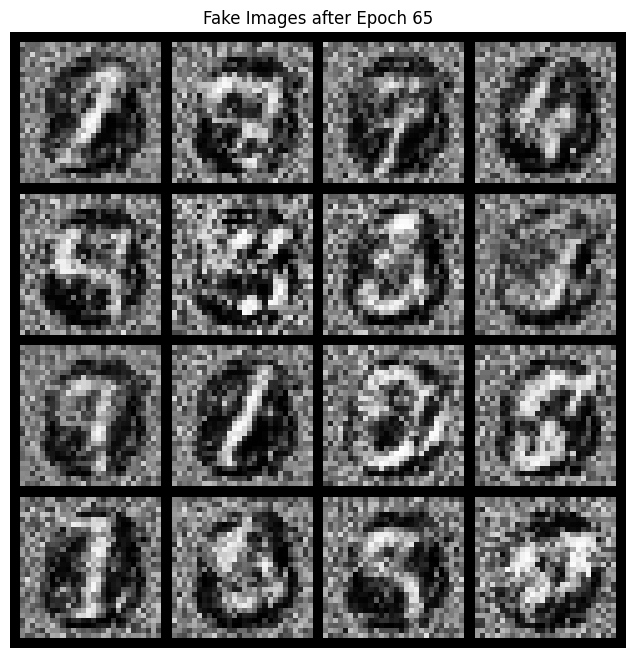

Epoch [66/100], Step [0/1875], Discriminator Loss: 1.2240, Generator Loss: 1.1698
Epoch [66/100], Step [100/1875], Discriminator Loss: 0.9675, Generator Loss: 1.4107
Epoch [66/100], Step [200/1875], Discriminator Loss: 0.6718, Generator Loss: 1.4770
Epoch [66/100], Step [300/1875], Discriminator Loss: 1.0582, Generator Loss: 1.0640
Epoch [66/100], Step [400/1875], Discriminator Loss: 1.0675, Generator Loss: 1.6039
Epoch [66/100], Step [500/1875], Discriminator Loss: 0.7017, Generator Loss: 1.5102
Epoch [66/100], Step [600/1875], Discriminator Loss: 1.0284, Generator Loss: 1.5578
Epoch [66/100], Step [700/1875], Discriminator Loss: 1.2061, Generator Loss: 1.0568
Epoch [66/100], Step [800/1875], Discriminator Loss: 0.8492, Generator Loss: 1.3748
Epoch [66/100], Step [900/1875], Discriminator Loss: 0.8340, Generator Loss: 1.4760
Epoch [66/100], Step [1000/1875], Discriminator Loss: 0.7564, Generator Loss: 1.5779
Epoch [66/100], Step [1100/1875], Discriminator Loss: 0.9168, Generator Loss:

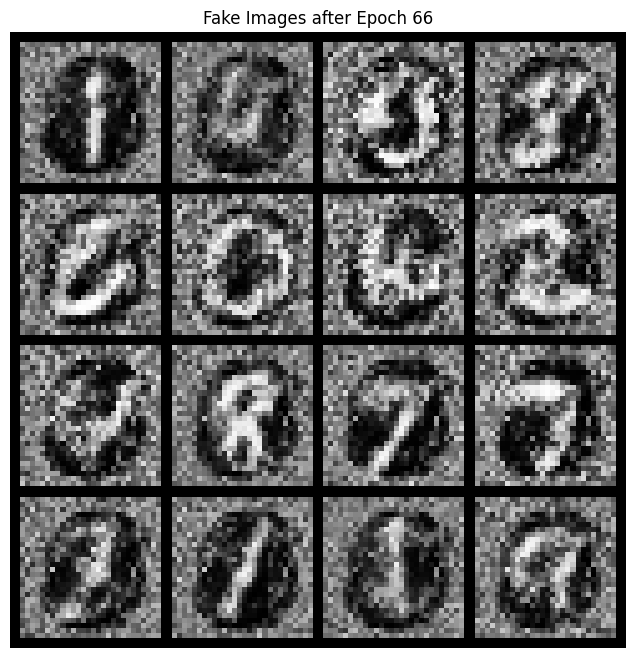

Epoch [67/100], Step [0/1875], Discriminator Loss: 1.3477, Generator Loss: 1.2751
Epoch [67/100], Step [100/1875], Discriminator Loss: 0.9813, Generator Loss: 1.2423
Epoch [67/100], Step [200/1875], Discriminator Loss: 0.8826, Generator Loss: 1.4139
Epoch [67/100], Step [300/1875], Discriminator Loss: 0.9630, Generator Loss: 1.2046
Epoch [67/100], Step [400/1875], Discriminator Loss: 1.0918, Generator Loss: 1.3772
Epoch [67/100], Step [500/1875], Discriminator Loss: 0.7457, Generator Loss: 1.4133
Epoch [67/100], Step [600/1875], Discriminator Loss: 1.1686, Generator Loss: 1.5315
Epoch [67/100], Step [700/1875], Discriminator Loss: 1.0038, Generator Loss: 1.3906
Epoch [67/100], Step [800/1875], Discriminator Loss: 0.9569, Generator Loss: 1.1858
Epoch [67/100], Step [900/1875], Discriminator Loss: 0.7641, Generator Loss: 1.7139
Epoch [67/100], Step [1000/1875], Discriminator Loss: 0.8658, Generator Loss: 1.2230
Epoch [67/100], Step [1100/1875], Discriminator Loss: 0.9326, Generator Loss:

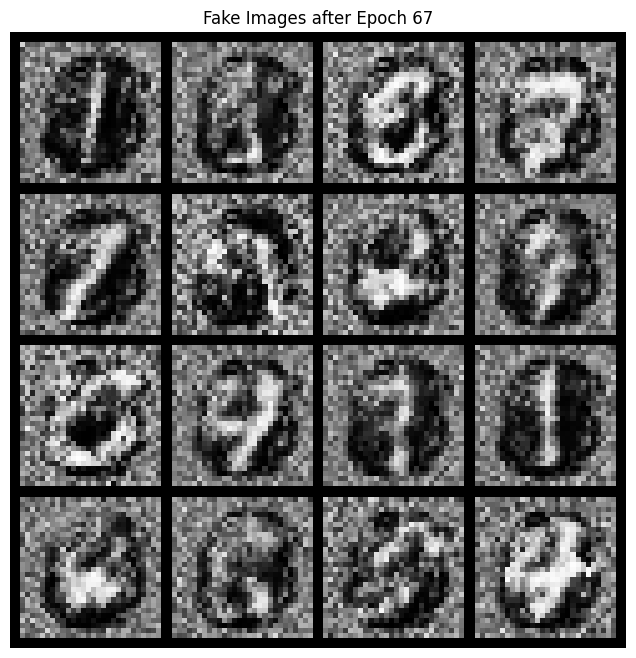

Epoch [68/100], Step [0/1875], Discriminator Loss: 1.0909, Generator Loss: 1.4984
Epoch [68/100], Step [100/1875], Discriminator Loss: 1.0594, Generator Loss: 1.2684
Epoch [68/100], Step [200/1875], Discriminator Loss: 0.5990, Generator Loss: 1.4475
Epoch [68/100], Step [300/1875], Discriminator Loss: 1.4532, Generator Loss: 1.1738
Epoch [68/100], Step [400/1875], Discriminator Loss: 0.9358, Generator Loss: 1.4794
Epoch [68/100], Step [500/1875], Discriminator Loss: 1.0159, Generator Loss: 1.2869
Epoch [68/100], Step [600/1875], Discriminator Loss: 1.1426, Generator Loss: 1.1603
Epoch [68/100], Step [700/1875], Discriminator Loss: 1.3502, Generator Loss: 1.0882
Epoch [68/100], Step [800/1875], Discriminator Loss: 1.0713, Generator Loss: 1.3481
Epoch [68/100], Step [900/1875], Discriminator Loss: 0.8879, Generator Loss: 1.1899
Epoch [68/100], Step [1000/1875], Discriminator Loss: 1.1081, Generator Loss: 1.1620
Epoch [68/100], Step [1100/1875], Discriminator Loss: 1.0284, Generator Loss:

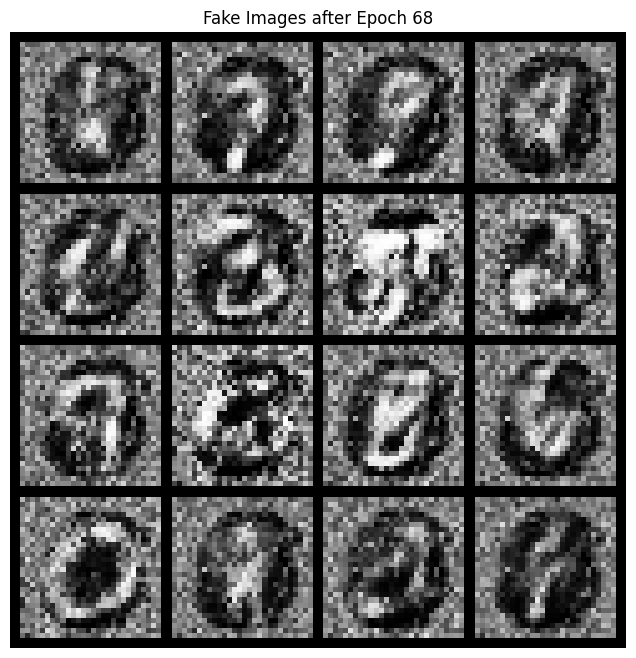

Epoch [69/100], Step [0/1875], Discriminator Loss: 1.0013, Generator Loss: 1.4710
Epoch [69/100], Step [100/1875], Discriminator Loss: 0.7899, Generator Loss: 1.5326
Epoch [69/100], Step [200/1875], Discriminator Loss: 1.2346, Generator Loss: 1.0863
Epoch [69/100], Step [300/1875], Discriminator Loss: 1.0524, Generator Loss: 1.4252
Epoch [69/100], Step [400/1875], Discriminator Loss: 0.9600, Generator Loss: 1.3335
Epoch [69/100], Step [500/1875], Discriminator Loss: 1.3638, Generator Loss: 1.3196
Epoch [69/100], Step [600/1875], Discriminator Loss: 1.1971, Generator Loss: 1.1374
Epoch [69/100], Step [700/1875], Discriminator Loss: 1.0152, Generator Loss: 0.9875
Epoch [69/100], Step [800/1875], Discriminator Loss: 0.9672, Generator Loss: 1.1107
Epoch [69/100], Step [900/1875], Discriminator Loss: 1.0302, Generator Loss: 1.1020
Epoch [69/100], Step [1000/1875], Discriminator Loss: 1.0977, Generator Loss: 1.4385
Epoch [69/100], Step [1100/1875], Discriminator Loss: 0.7895, Generator Loss:

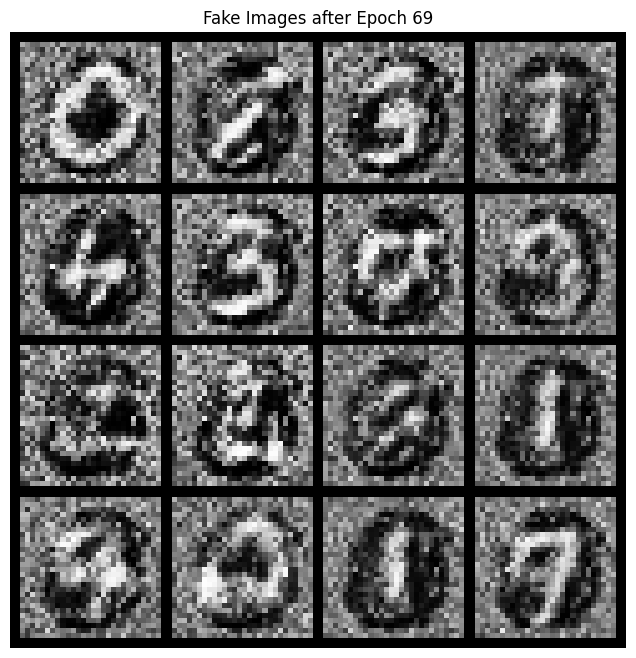

Epoch [70/100], Step [0/1875], Discriminator Loss: 0.6840, Generator Loss: 1.6958
Epoch [70/100], Step [100/1875], Discriminator Loss: 0.7950, Generator Loss: 1.5985
Epoch [70/100], Step [200/1875], Discriminator Loss: 0.8706, Generator Loss: 1.3248
Epoch [70/100], Step [300/1875], Discriminator Loss: 0.7755, Generator Loss: 1.5039
Epoch [70/100], Step [400/1875], Discriminator Loss: 0.7774, Generator Loss: 1.4405
Epoch [70/100], Step [500/1875], Discriminator Loss: 0.8837, Generator Loss: 1.2574
Epoch [70/100], Step [600/1875], Discriminator Loss: 0.8933, Generator Loss: 1.4235
Epoch [70/100], Step [700/1875], Discriminator Loss: 0.6071, Generator Loss: 1.8321
Epoch [70/100], Step [800/1875], Discriminator Loss: 1.3671, Generator Loss: 0.9975
Epoch [70/100], Step [900/1875], Discriminator Loss: 1.3817, Generator Loss: 1.1892
Epoch [70/100], Step [1000/1875], Discriminator Loss: 0.7835, Generator Loss: 1.3946
Epoch [70/100], Step [1100/1875], Discriminator Loss: 1.2892, Generator Loss:

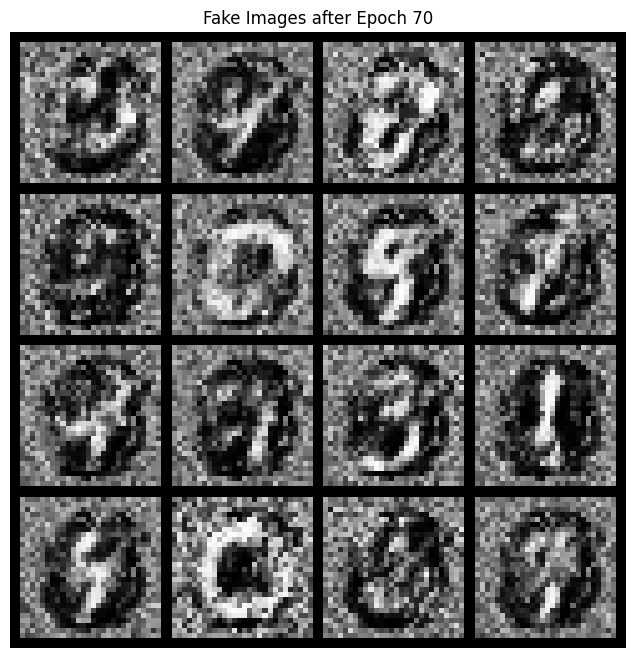

Epoch [71/100], Step [0/1875], Discriminator Loss: 1.2051, Generator Loss: 1.2959
Epoch [71/100], Step [100/1875], Discriminator Loss: 0.8757, Generator Loss: 1.3734
Epoch [71/100], Step [200/1875], Discriminator Loss: 0.8422, Generator Loss: 1.3122
Epoch [71/100], Step [300/1875], Discriminator Loss: 0.8303, Generator Loss: 1.7351
Epoch [71/100], Step [400/1875], Discriminator Loss: 0.8754, Generator Loss: 1.4026
Epoch [71/100], Step [500/1875], Discriminator Loss: 0.9128, Generator Loss: 1.3340
Epoch [71/100], Step [600/1875], Discriminator Loss: 0.7424, Generator Loss: 1.7583
Epoch [71/100], Step [700/1875], Discriminator Loss: 0.9884, Generator Loss: 1.0976
Epoch [71/100], Step [800/1875], Discriminator Loss: 0.9443, Generator Loss: 1.5384
Epoch [71/100], Step [900/1875], Discriminator Loss: 1.0024, Generator Loss: 1.2349
Epoch [71/100], Step [1000/1875], Discriminator Loss: 1.5893, Generator Loss: 0.8115
Epoch [71/100], Step [1100/1875], Discriminator Loss: 0.9892, Generator Loss:

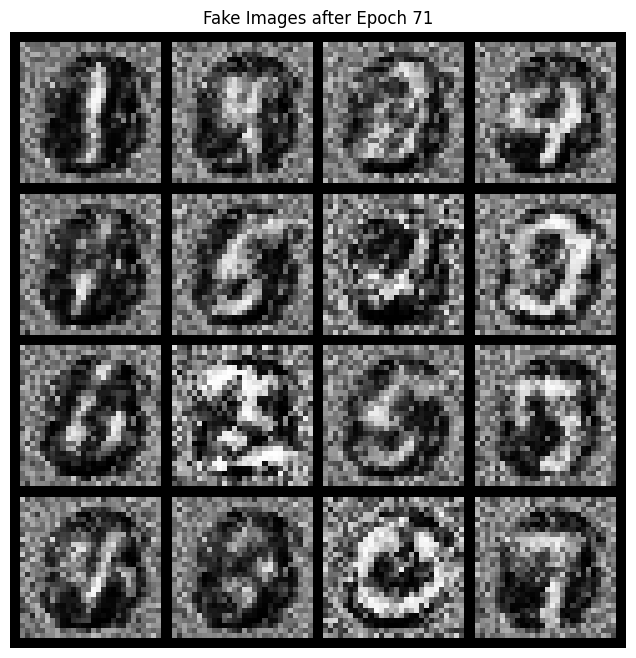

Epoch [72/100], Step [0/1875], Discriminator Loss: 0.9905, Generator Loss: 1.4373
Epoch [72/100], Step [100/1875], Discriminator Loss: 0.5401, Generator Loss: 1.9147
Epoch [72/100], Step [200/1875], Discriminator Loss: 1.1887, Generator Loss: 1.1574
Epoch [72/100], Step [300/1875], Discriminator Loss: 1.0650, Generator Loss: 1.2242
Epoch [72/100], Step [400/1875], Discriminator Loss: 0.6753, Generator Loss: 1.6754
Epoch [72/100], Step [500/1875], Discriminator Loss: 1.1230, Generator Loss: 1.1415
Epoch [72/100], Step [600/1875], Discriminator Loss: 1.0175, Generator Loss: 1.1575
Epoch [72/100], Step [700/1875], Discriminator Loss: 1.0140, Generator Loss: 1.4171
Epoch [72/100], Step [800/1875], Discriminator Loss: 1.0924, Generator Loss: 1.3850
Epoch [72/100], Step [900/1875], Discriminator Loss: 1.0035, Generator Loss: 1.1721
Epoch [72/100], Step [1000/1875], Discriminator Loss: 0.6407, Generator Loss: 1.6833
Epoch [72/100], Step [1100/1875], Discriminator Loss: 1.0705, Generator Loss:

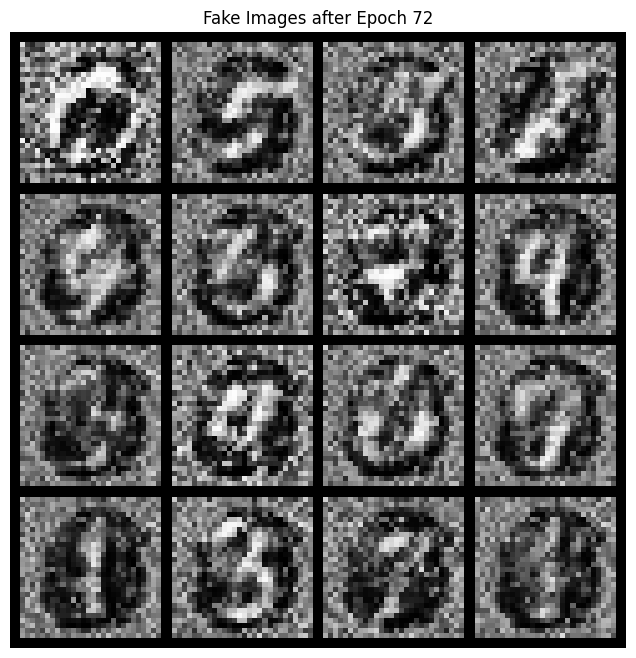

Epoch [73/100], Step [0/1875], Discriminator Loss: 0.7771, Generator Loss: 1.3690
Epoch [73/100], Step [100/1875], Discriminator Loss: 0.6222, Generator Loss: 1.6986
Epoch [73/100], Step [200/1875], Discriminator Loss: 0.8525, Generator Loss: 1.1380
Epoch [73/100], Step [300/1875], Discriminator Loss: 0.7033, Generator Loss: 1.4637
Epoch [73/100], Step [400/1875], Discriminator Loss: 0.8977, Generator Loss: 1.2587
Epoch [73/100], Step [500/1875], Discriminator Loss: 0.8704, Generator Loss: 1.3628
Epoch [73/100], Step [600/1875], Discriminator Loss: 0.9021, Generator Loss: 1.2976
Epoch [73/100], Step [700/1875], Discriminator Loss: 1.5388, Generator Loss: 1.4763
Epoch [73/100], Step [800/1875], Discriminator Loss: 1.0758, Generator Loss: 1.3037
Epoch [73/100], Step [900/1875], Discriminator Loss: 0.9950, Generator Loss: 1.3329
Epoch [73/100], Step [1000/1875], Discriminator Loss: 1.0177, Generator Loss: 1.2646
Epoch [73/100], Step [1100/1875], Discriminator Loss: 0.8960, Generator Loss:

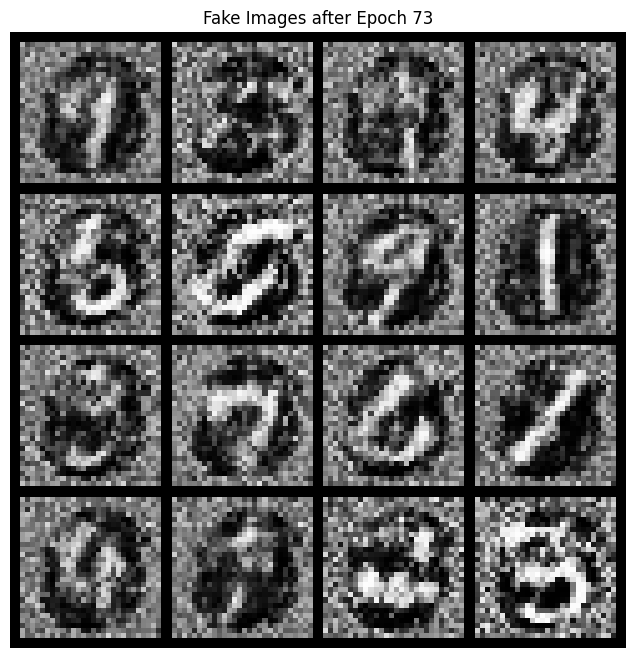

Epoch [74/100], Step [0/1875], Discriminator Loss: 1.0559, Generator Loss: 1.1520
Epoch [74/100], Step [100/1875], Discriminator Loss: 0.9933, Generator Loss: 1.4013
Epoch [74/100], Step [200/1875], Discriminator Loss: 1.2205, Generator Loss: 1.3728
Epoch [74/100], Step [300/1875], Discriminator Loss: 0.9511, Generator Loss: 1.2613
Epoch [74/100], Step [400/1875], Discriminator Loss: 0.7480, Generator Loss: 1.1739
Epoch [74/100], Step [500/1875], Discriminator Loss: 0.9978, Generator Loss: 1.6069
Epoch [74/100], Step [600/1875], Discriminator Loss: 0.9598, Generator Loss: 1.5669
Epoch [74/100], Step [700/1875], Discriminator Loss: 0.8803, Generator Loss: 1.5683
Epoch [74/100], Step [800/1875], Discriminator Loss: 1.4842, Generator Loss: 1.1670
Epoch [74/100], Step [900/1875], Discriminator Loss: 1.0573, Generator Loss: 1.4694
Epoch [74/100], Step [1000/1875], Discriminator Loss: 1.0421, Generator Loss: 1.1804
Epoch [74/100], Step [1100/1875], Discriminator Loss: 1.0597, Generator Loss:

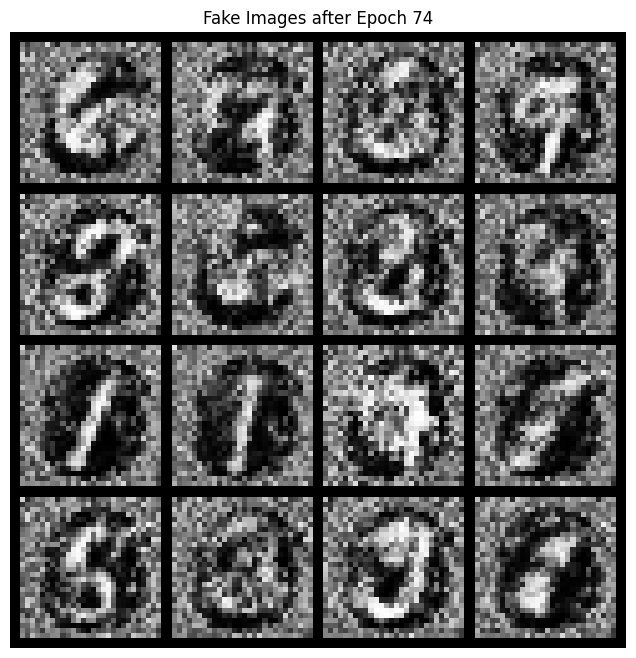

Epoch [75/100], Step [0/1875], Discriminator Loss: 0.8463, Generator Loss: 1.5070
Epoch [75/100], Step [100/1875], Discriminator Loss: 0.8797, Generator Loss: 1.2557
Epoch [75/100], Step [200/1875], Discriminator Loss: 1.1022, Generator Loss: 1.4907
Epoch [75/100], Step [300/1875], Discriminator Loss: 1.1332, Generator Loss: 1.4593
Epoch [75/100], Step [400/1875], Discriminator Loss: 0.9853, Generator Loss: 1.0959
Epoch [75/100], Step [500/1875], Discriminator Loss: 1.1357, Generator Loss: 1.3489
Epoch [75/100], Step [600/1875], Discriminator Loss: 0.8596, Generator Loss: 1.4941
Epoch [75/100], Step [700/1875], Discriminator Loss: 0.8990, Generator Loss: 1.4668
Epoch [75/100], Step [800/1875], Discriminator Loss: 1.0225, Generator Loss: 1.1427
Epoch [75/100], Step [900/1875], Discriminator Loss: 1.1796, Generator Loss: 1.0492
Epoch [75/100], Step [1000/1875], Discriminator Loss: 0.7912, Generator Loss: 1.6429
Epoch [75/100], Step [1100/1875], Discriminator Loss: 0.5303, Generator Loss:

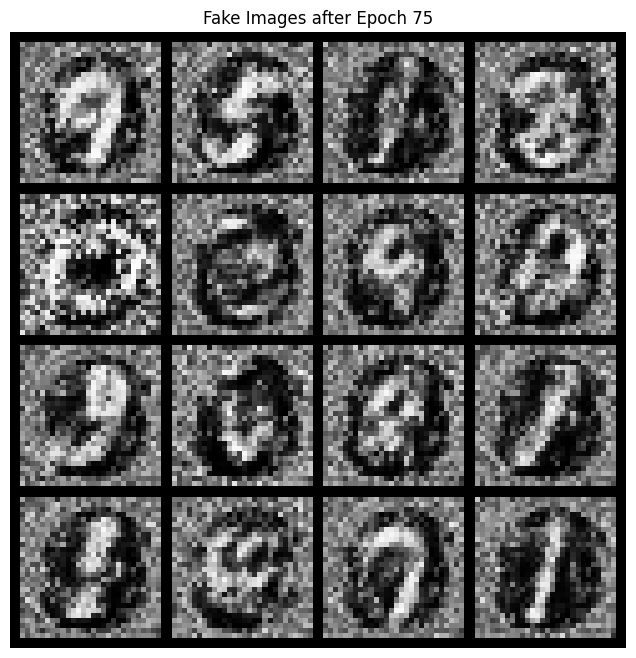

Epoch [76/100], Step [0/1875], Discriminator Loss: 1.1831, Generator Loss: 1.4378
Epoch [76/100], Step [100/1875], Discriminator Loss: 1.2574, Generator Loss: 1.2829
Epoch [76/100], Step [200/1875], Discriminator Loss: 0.8423, Generator Loss: 1.3712
Epoch [76/100], Step [300/1875], Discriminator Loss: 1.2126, Generator Loss: 1.0524
Epoch [76/100], Step [400/1875], Discriminator Loss: 0.8746, Generator Loss: 1.3186
Epoch [76/100], Step [500/1875], Discriminator Loss: 1.0286, Generator Loss: 1.4457
Epoch [76/100], Step [600/1875], Discriminator Loss: 1.0097, Generator Loss: 1.5561
Epoch [76/100], Step [700/1875], Discriminator Loss: 0.8977, Generator Loss: 1.6270
Epoch [76/100], Step [800/1875], Discriminator Loss: 0.9366, Generator Loss: 1.5193
Epoch [76/100], Step [900/1875], Discriminator Loss: 0.9165, Generator Loss: 1.5863
Epoch [76/100], Step [1000/1875], Discriminator Loss: 1.0867, Generator Loss: 1.4455
Epoch [76/100], Step [1100/1875], Discriminator Loss: 0.8091, Generator Loss:

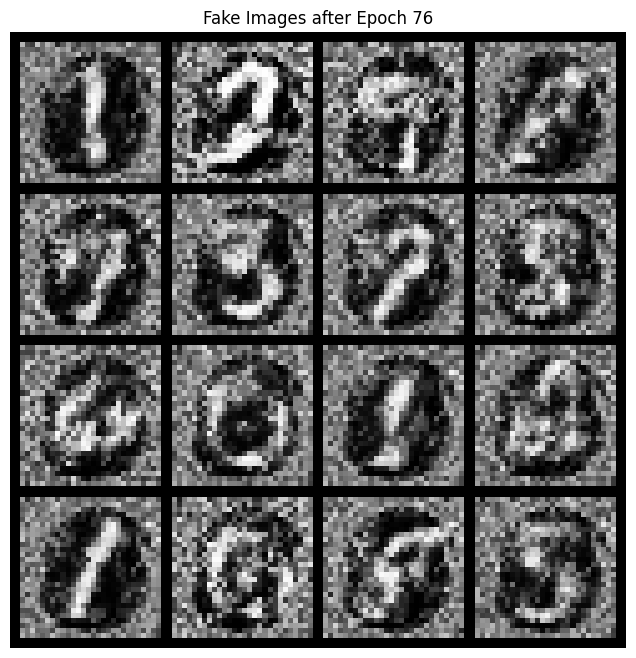

Epoch [77/100], Step [0/1875], Discriminator Loss: 1.0243, Generator Loss: 1.1800
Epoch [77/100], Step [100/1875], Discriminator Loss: 0.8004, Generator Loss: 1.8695
Epoch [77/100], Step [200/1875], Discriminator Loss: 0.8609, Generator Loss: 1.3238
Epoch [77/100], Step [300/1875], Discriminator Loss: 1.0499, Generator Loss: 1.1897
Epoch [77/100], Step [400/1875], Discriminator Loss: 1.2090, Generator Loss: 1.4750
Epoch [77/100], Step [500/1875], Discriminator Loss: 1.2410, Generator Loss: 1.0762
Epoch [77/100], Step [600/1875], Discriminator Loss: 0.8848, Generator Loss: 1.2826
Epoch [77/100], Step [700/1875], Discriminator Loss: 0.9761, Generator Loss: 1.3251
Epoch [77/100], Step [800/1875], Discriminator Loss: 1.2122, Generator Loss: 1.3028
Epoch [77/100], Step [900/1875], Discriminator Loss: 1.3540, Generator Loss: 0.9665
Epoch [77/100], Step [1000/1875], Discriminator Loss: 1.2031, Generator Loss: 1.4762
Epoch [77/100], Step [1100/1875], Discriminator Loss: 0.8900, Generator Loss:

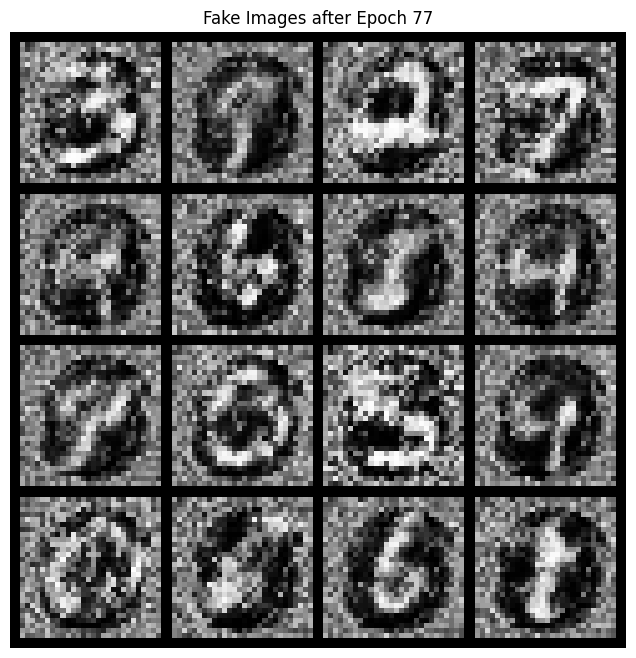

Epoch [78/100], Step [0/1875], Discriminator Loss: 1.0726, Generator Loss: 1.3043
Epoch [78/100], Step [100/1875], Discriminator Loss: 1.0969, Generator Loss: 1.3163
Epoch [78/100], Step [200/1875], Discriminator Loss: 0.9499, Generator Loss: 1.2984
Epoch [78/100], Step [300/1875], Discriminator Loss: 0.8074, Generator Loss: 1.3636
Epoch [78/100], Step [400/1875], Discriminator Loss: 0.7490, Generator Loss: 1.3053
Epoch [78/100], Step [500/1875], Discriminator Loss: 0.9991, Generator Loss: 1.3653
Epoch [78/100], Step [600/1875], Discriminator Loss: 0.7376, Generator Loss: 1.5284
Epoch [78/100], Step [700/1875], Discriminator Loss: 1.1216, Generator Loss: 1.2687
Epoch [78/100], Step [800/1875], Discriminator Loss: 1.0806, Generator Loss: 1.4740
Epoch [78/100], Step [900/1875], Discriminator Loss: 0.7698, Generator Loss: 1.4609
Epoch [78/100], Step [1000/1875], Discriminator Loss: 1.2226, Generator Loss: 1.2611
Epoch [78/100], Step [1100/1875], Discriminator Loss: 1.1802, Generator Loss:

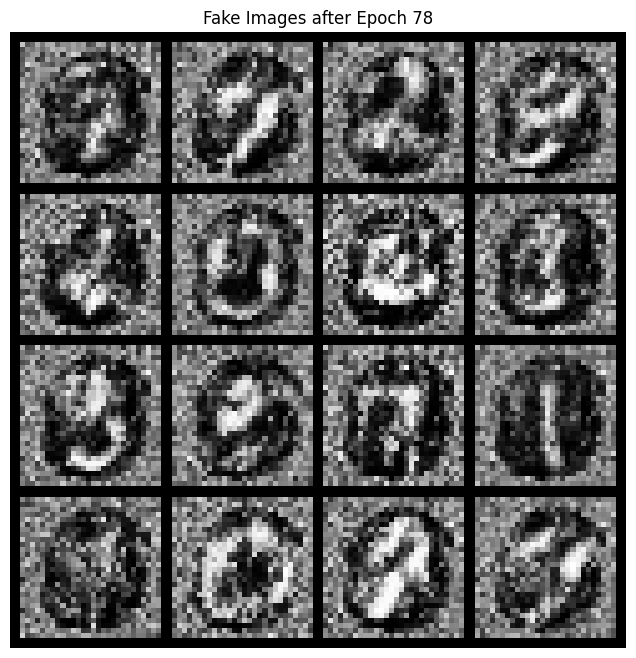

Epoch [79/100], Step [0/1875], Discriminator Loss: 1.0307, Generator Loss: 1.5483
Epoch [79/100], Step [100/1875], Discriminator Loss: 1.1315, Generator Loss: 1.1422
Epoch [79/100], Step [200/1875], Discriminator Loss: 0.8674, Generator Loss: 1.3209
Epoch [79/100], Step [300/1875], Discriminator Loss: 0.8074, Generator Loss: 1.5282
Epoch [79/100], Step [400/1875], Discriminator Loss: 0.8593, Generator Loss: 1.5380
Epoch [79/100], Step [500/1875], Discriminator Loss: 1.1040, Generator Loss: 1.1424
Epoch [79/100], Step [600/1875], Discriminator Loss: 0.8605, Generator Loss: 1.4857
Epoch [79/100], Step [700/1875], Discriminator Loss: 0.8494, Generator Loss: 1.3931
Epoch [79/100], Step [800/1875], Discriminator Loss: 1.0737, Generator Loss: 1.4042
Epoch [79/100], Step [900/1875], Discriminator Loss: 0.5837, Generator Loss: 2.2246
Epoch [79/100], Step [1000/1875], Discriminator Loss: 0.6519, Generator Loss: 1.7109
Epoch [79/100], Step [1100/1875], Discriminator Loss: 0.8344, Generator Loss:

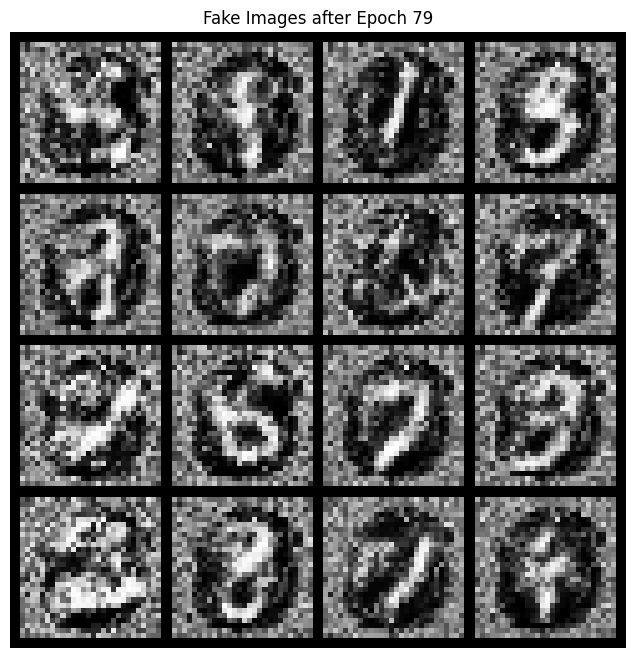

Epoch [80/100], Step [0/1875], Discriminator Loss: 1.0679, Generator Loss: 1.6088
Epoch [80/100], Step [100/1875], Discriminator Loss: 0.9626, Generator Loss: 1.2626
Epoch [80/100], Step [200/1875], Discriminator Loss: 0.8946, Generator Loss: 1.1990
Epoch [80/100], Step [300/1875], Discriminator Loss: 1.0121, Generator Loss: 1.2261
Epoch [80/100], Step [400/1875], Discriminator Loss: 1.1784, Generator Loss: 1.1573
Epoch [80/100], Step [500/1875], Discriminator Loss: 0.9698, Generator Loss: 1.2992
Epoch [80/100], Step [600/1875], Discriminator Loss: 0.9133, Generator Loss: 1.5743
Epoch [80/100], Step [700/1875], Discriminator Loss: 0.8433, Generator Loss: 1.3823
Epoch [80/100], Step [800/1875], Discriminator Loss: 0.9574, Generator Loss: 1.3821
Epoch [80/100], Step [900/1875], Discriminator Loss: 1.1578, Generator Loss: 1.1204
Epoch [80/100], Step [1000/1875], Discriminator Loss: 0.9368, Generator Loss: 1.1920
Epoch [80/100], Step [1100/1875], Discriminator Loss: 0.9910, Generator Loss:

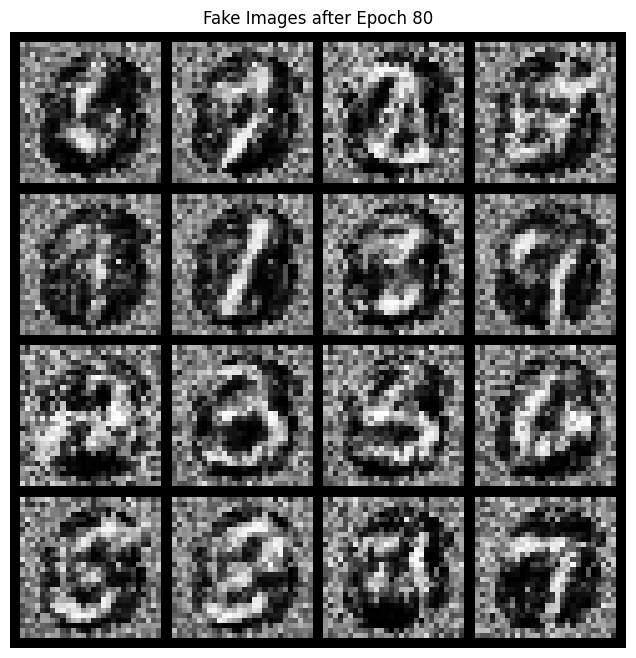

Epoch [81/100], Step [0/1875], Discriminator Loss: 0.7606, Generator Loss: 1.6036
Epoch [81/100], Step [100/1875], Discriminator Loss: 0.8822, Generator Loss: 1.3648
Epoch [81/100], Step [200/1875], Discriminator Loss: 0.9191, Generator Loss: 1.5262
Epoch [81/100], Step [300/1875], Discriminator Loss: 0.8154, Generator Loss: 1.8234
Epoch [81/100], Step [400/1875], Discriminator Loss: 0.8044, Generator Loss: 2.2995
Epoch [81/100], Step [500/1875], Discriminator Loss: 1.6715, Generator Loss: 1.6027
Epoch [81/100], Step [600/1875], Discriminator Loss: 0.6852, Generator Loss: 1.2924
Epoch [81/100], Step [700/1875], Discriminator Loss: 0.7690, Generator Loss: 1.7373
Epoch [81/100], Step [800/1875], Discriminator Loss: 0.5022, Generator Loss: 2.3390
Epoch [81/100], Step [900/1875], Discriminator Loss: 0.8723, Generator Loss: 1.5103
Epoch [81/100], Step [1000/1875], Discriminator Loss: 1.0056, Generator Loss: 1.6770
Epoch [81/100], Step [1100/1875], Discriminator Loss: 0.9950, Generator Loss:

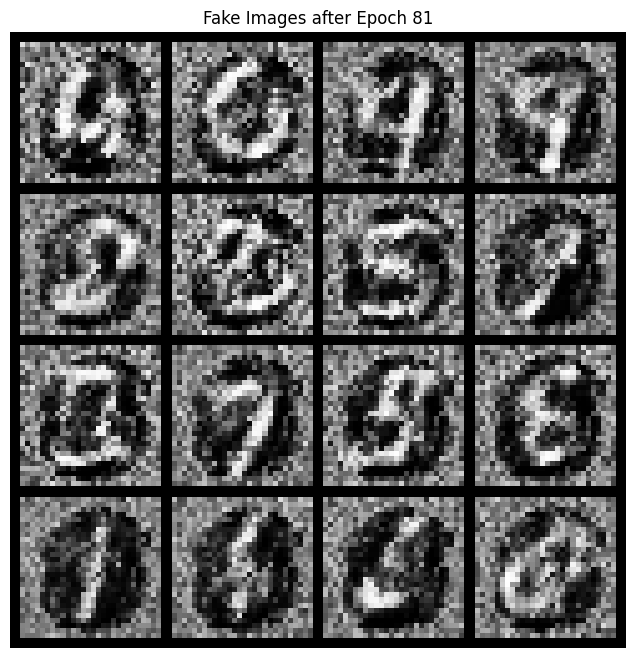

Epoch [82/100], Step [0/1875], Discriminator Loss: 1.4689, Generator Loss: 1.3483
Epoch [82/100], Step [100/1875], Discriminator Loss: 1.2413, Generator Loss: 1.3164
Epoch [82/100], Step [200/1875], Discriminator Loss: 1.4272, Generator Loss: 1.6467
Epoch [82/100], Step [300/1875], Discriminator Loss: 1.0392, Generator Loss: 1.2252
Epoch [82/100], Step [400/1875], Discriminator Loss: 0.9551, Generator Loss: 1.1169
Epoch [82/100], Step [500/1875], Discriminator Loss: 1.1941, Generator Loss: 1.3926
Epoch [82/100], Step [600/1875], Discriminator Loss: 0.8859, Generator Loss: 1.5334
Epoch [82/100], Step [700/1875], Discriminator Loss: 0.8795, Generator Loss: 1.3673
Epoch [82/100], Step [800/1875], Discriminator Loss: 0.9033, Generator Loss: 1.4080
Epoch [82/100], Step [900/1875], Discriminator Loss: 0.8610, Generator Loss: 1.5814
Epoch [82/100], Step [1000/1875], Discriminator Loss: 1.0084, Generator Loss: 1.1581
Epoch [82/100], Step [1100/1875], Discriminator Loss: 1.1032, Generator Loss:

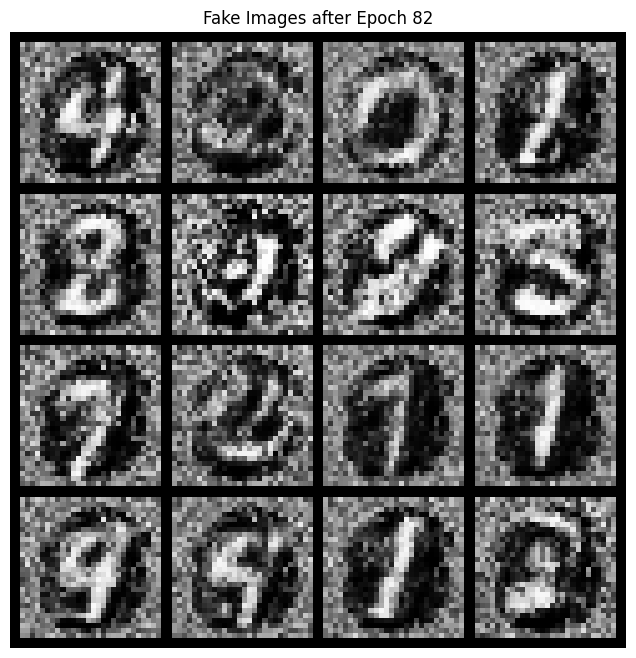

Epoch [83/100], Step [0/1875], Discriminator Loss: 0.7111, Generator Loss: 1.4873
Epoch [83/100], Step [100/1875], Discriminator Loss: 0.9463, Generator Loss: 1.5346
Epoch [83/100], Step [200/1875], Discriminator Loss: 1.0300, Generator Loss: 1.2397
Epoch [83/100], Step [300/1875], Discriminator Loss: 0.8368, Generator Loss: 1.3592
Epoch [83/100], Step [400/1875], Discriminator Loss: 1.2790, Generator Loss: 1.1299
Epoch [83/100], Step [500/1875], Discriminator Loss: 1.1950, Generator Loss: 1.2681
Epoch [83/100], Step [600/1875], Discriminator Loss: 0.9217, Generator Loss: 1.1454
Epoch [83/100], Step [700/1875], Discriminator Loss: 0.7789, Generator Loss: 1.5787
Epoch [83/100], Step [800/1875], Discriminator Loss: 0.9571, Generator Loss: 1.3485
Epoch [83/100], Step [900/1875], Discriminator Loss: 0.8798, Generator Loss: 1.6440
Epoch [83/100], Step [1000/1875], Discriminator Loss: 1.2186, Generator Loss: 1.1862
Epoch [83/100], Step [1100/1875], Discriminator Loss: 0.9985, Generator Loss:

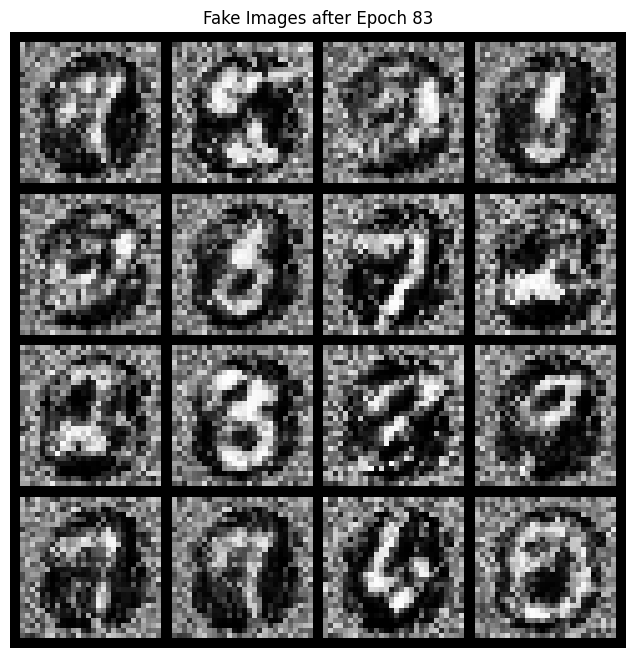

Epoch [84/100], Step [0/1875], Discriminator Loss: 0.9589, Generator Loss: 1.1104
Epoch [84/100], Step [100/1875], Discriminator Loss: 1.0180, Generator Loss: 1.1044
Epoch [84/100], Step [200/1875], Discriminator Loss: 0.8962, Generator Loss: 1.3660
Epoch [84/100], Step [300/1875], Discriminator Loss: 1.2401, Generator Loss: 1.2141
Epoch [84/100], Step [400/1875], Discriminator Loss: 0.9261, Generator Loss: 1.5960
Epoch [84/100], Step [500/1875], Discriminator Loss: 1.1623, Generator Loss: 1.2265
Epoch [84/100], Step [600/1875], Discriminator Loss: 1.2119, Generator Loss: 1.3524
Epoch [84/100], Step [700/1875], Discriminator Loss: 1.0093, Generator Loss: 1.2134
Epoch [84/100], Step [800/1875], Discriminator Loss: 0.9547, Generator Loss: 1.1943
Epoch [84/100], Step [900/1875], Discriminator Loss: 0.8350, Generator Loss: 1.4926
Epoch [84/100], Step [1000/1875], Discriminator Loss: 0.7158, Generator Loss: 1.7166
Epoch [84/100], Step [1100/1875], Discriminator Loss: 1.0696, Generator Loss:

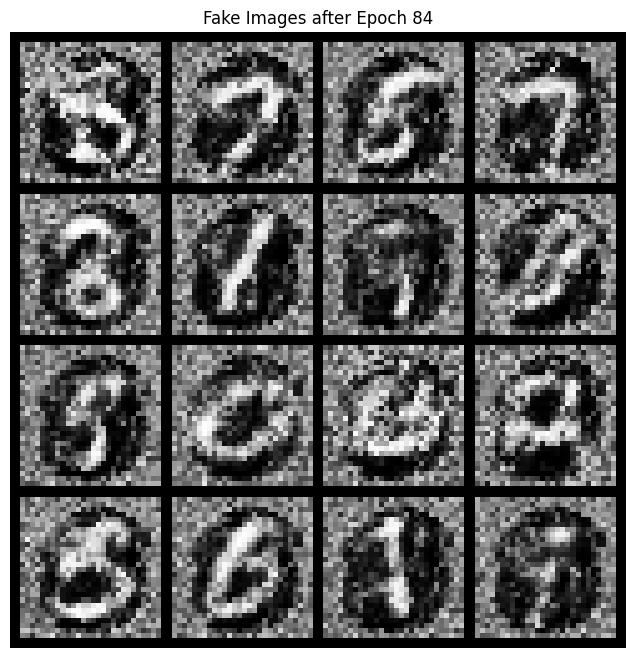

Epoch [85/100], Step [0/1875], Discriminator Loss: 1.1239, Generator Loss: 1.1811
Epoch [85/100], Step [100/1875], Discriminator Loss: 1.1678, Generator Loss: 1.2823
Epoch [85/100], Step [200/1875], Discriminator Loss: 0.9861, Generator Loss: 1.6140
Epoch [85/100], Step [300/1875], Discriminator Loss: 1.1961, Generator Loss: 1.2014
Epoch [85/100], Step [400/1875], Discriminator Loss: 1.1399, Generator Loss: 1.1009
Epoch [85/100], Step [500/1875], Discriminator Loss: 1.0056, Generator Loss: 1.0722
Epoch [85/100], Step [600/1875], Discriminator Loss: 0.9540, Generator Loss: 1.3089
Epoch [85/100], Step [700/1875], Discriminator Loss: 0.8995, Generator Loss: 1.5068
Epoch [85/100], Step [800/1875], Discriminator Loss: 0.7120, Generator Loss: 1.5069
Epoch [85/100], Step [900/1875], Discriminator Loss: 0.6924, Generator Loss: 1.3439
Epoch [85/100], Step [1000/1875], Discriminator Loss: 0.6093, Generator Loss: 1.7548
Epoch [85/100], Step [1100/1875], Discriminator Loss: 1.2774, Generator Loss:

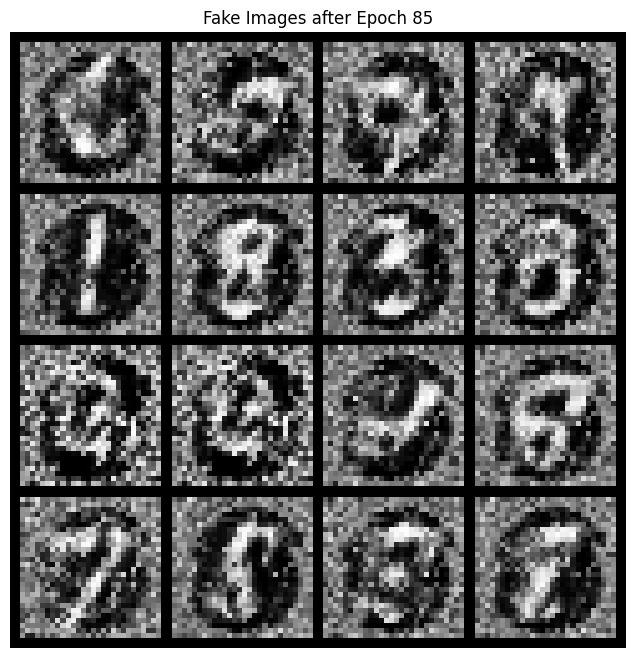

Epoch [86/100], Step [0/1875], Discriminator Loss: 0.7541, Generator Loss: 1.4578
Epoch [86/100], Step [100/1875], Discriminator Loss: 0.8058, Generator Loss: 1.4464
Epoch [86/100], Step [200/1875], Discriminator Loss: 0.9499, Generator Loss: 1.2177
Epoch [86/100], Step [300/1875], Discriminator Loss: 0.8863, Generator Loss: 1.2769
Epoch [86/100], Step [400/1875], Discriminator Loss: 0.9593, Generator Loss: 1.3701
Epoch [86/100], Step [500/1875], Discriminator Loss: 0.8649, Generator Loss: 1.6679
Epoch [86/100], Step [600/1875], Discriminator Loss: 0.8899, Generator Loss: 1.3509
Epoch [86/100], Step [700/1875], Discriminator Loss: 1.1227, Generator Loss: 1.1977
Epoch [86/100], Step [800/1875], Discriminator Loss: 0.9471, Generator Loss: 1.1667
Epoch [86/100], Step [900/1875], Discriminator Loss: 0.8061, Generator Loss: 1.4869
Epoch [86/100], Step [1000/1875], Discriminator Loss: 0.9820, Generator Loss: 1.5376
Epoch [86/100], Step [1100/1875], Discriminator Loss: 1.2051, Generator Loss:

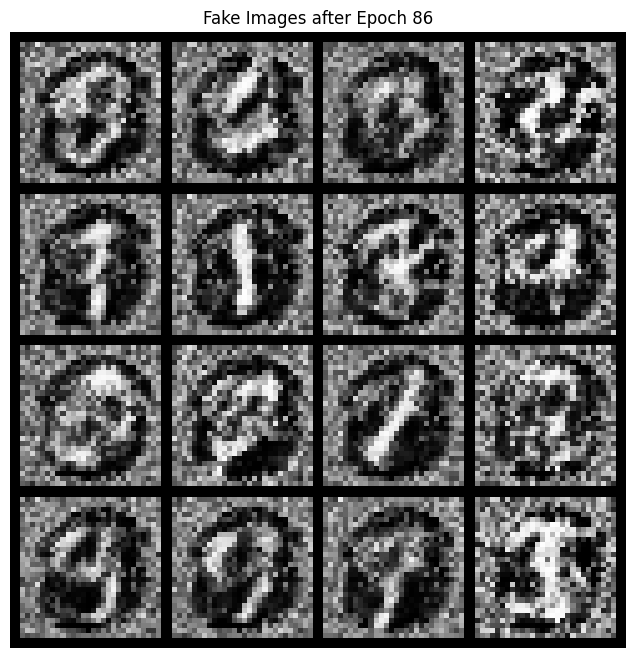

Epoch [87/100], Step [0/1875], Discriminator Loss: 0.5270, Generator Loss: 2.1749
Epoch [87/100], Step [100/1875], Discriminator Loss: 0.8190, Generator Loss: 1.4687
Epoch [87/100], Step [200/1875], Discriminator Loss: 0.5528, Generator Loss: 1.4265
Epoch [87/100], Step [300/1875], Discriminator Loss: 0.4361, Generator Loss: 2.1584
Epoch [87/100], Step [400/1875], Discriminator Loss: 0.7890, Generator Loss: 1.6782
Epoch [87/100], Step [500/1875], Discriminator Loss: 1.0364, Generator Loss: 1.1914
Epoch [87/100], Step [600/1875], Discriminator Loss: 0.7133, Generator Loss: 1.3982
Epoch [87/100], Step [700/1875], Discriminator Loss: 1.0015, Generator Loss: 1.1721
Epoch [87/100], Step [800/1875], Discriminator Loss: 0.9169, Generator Loss: 1.7197
Epoch [87/100], Step [900/1875], Discriminator Loss: 1.0241, Generator Loss: 1.6549
Epoch [87/100], Step [1000/1875], Discriminator Loss: 0.9451, Generator Loss: 1.1437
Epoch [87/100], Step [1100/1875], Discriminator Loss: 0.9649, Generator Loss:

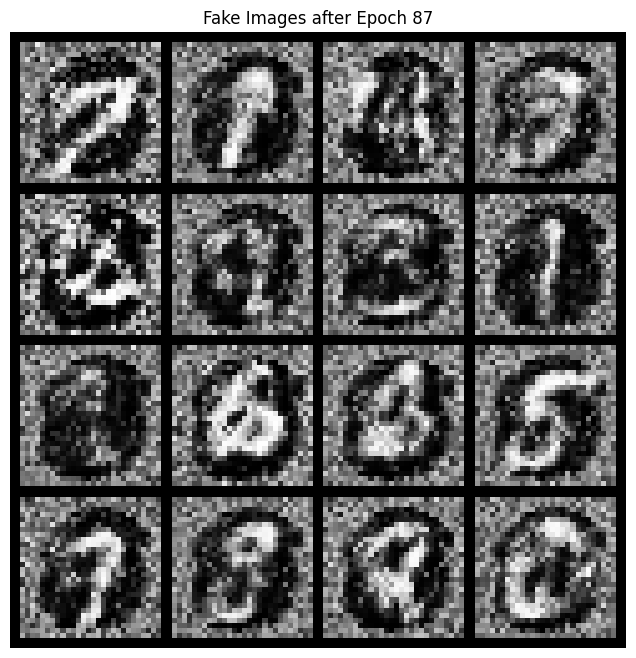

Epoch [88/100], Step [0/1875], Discriminator Loss: 0.6381, Generator Loss: 2.0297
Epoch [88/100], Step [100/1875], Discriminator Loss: 0.8397, Generator Loss: 1.3150
Epoch [88/100], Step [200/1875], Discriminator Loss: 0.9550, Generator Loss: 1.2310
Epoch [88/100], Step [300/1875], Discriminator Loss: 0.8827, Generator Loss: 1.4037
Epoch [88/100], Step [400/1875], Discriminator Loss: 1.3271, Generator Loss: 1.0348
Epoch [88/100], Step [500/1875], Discriminator Loss: 0.8568, Generator Loss: 1.7184
Epoch [88/100], Step [600/1875], Discriminator Loss: 1.2076, Generator Loss: 1.3193
Epoch [88/100], Step [700/1875], Discriminator Loss: 1.2374, Generator Loss: 1.2926
Epoch [88/100], Step [800/1875], Discriminator Loss: 1.0057, Generator Loss: 1.2537
Epoch [88/100], Step [900/1875], Discriminator Loss: 0.9760, Generator Loss: 1.8263
Epoch [88/100], Step [1000/1875], Discriminator Loss: 1.1472, Generator Loss: 1.1303
Epoch [88/100], Step [1100/1875], Discriminator Loss: 0.9384, Generator Loss:

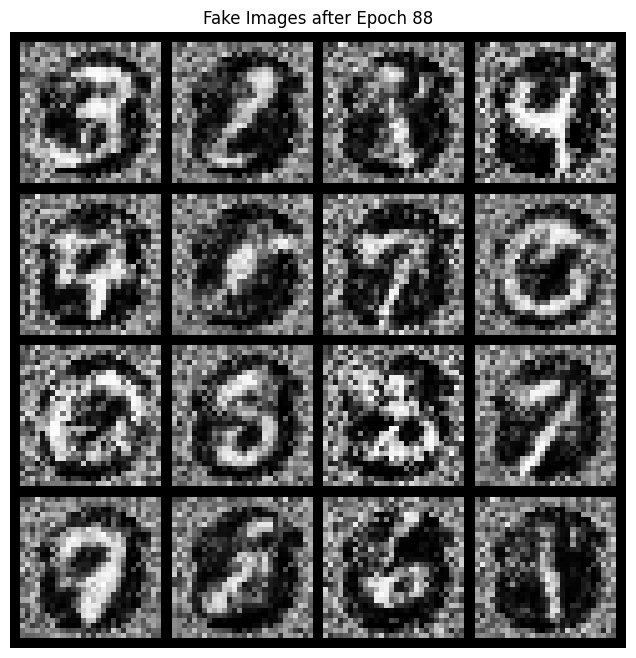

Epoch [89/100], Step [0/1875], Discriminator Loss: 1.0855, Generator Loss: 1.0832
Epoch [89/100], Step [100/1875], Discriminator Loss: 1.0934, Generator Loss: 0.9017
Epoch [89/100], Step [200/1875], Discriminator Loss: 1.0031, Generator Loss: 1.6276
Epoch [89/100], Step [300/1875], Discriminator Loss: 1.1211, Generator Loss: 1.2845
Epoch [89/100], Step [400/1875], Discriminator Loss: 0.7724, Generator Loss: 1.5771
Epoch [89/100], Step [500/1875], Discriminator Loss: 1.1575, Generator Loss: 1.2820
Epoch [89/100], Step [600/1875], Discriminator Loss: 1.1469, Generator Loss: 1.2468
Epoch [89/100], Step [700/1875], Discriminator Loss: 0.7540, Generator Loss: 1.5454
Epoch [89/100], Step [800/1875], Discriminator Loss: 0.9810, Generator Loss: 1.4668
Epoch [89/100], Step [900/1875], Discriminator Loss: 0.9229, Generator Loss: 1.2694
Epoch [89/100], Step [1000/1875], Discriminator Loss: 0.8415, Generator Loss: 1.3622
Epoch [89/100], Step [1100/1875], Discriminator Loss: 0.9885, Generator Loss:

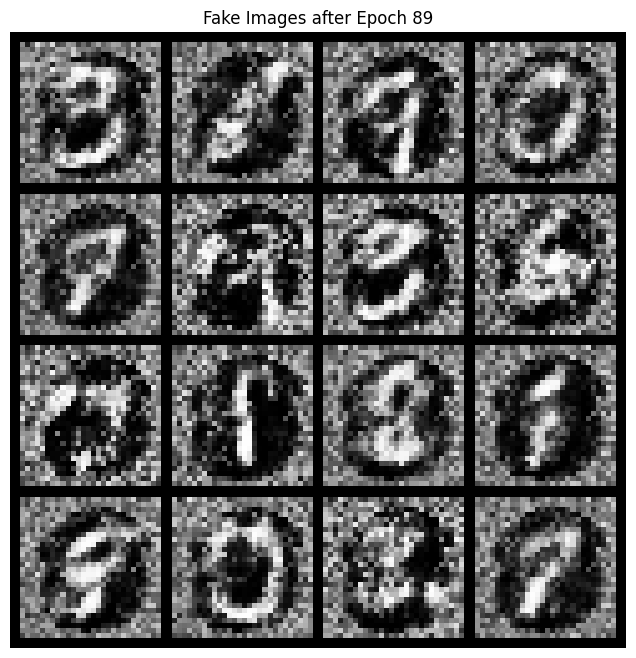

Epoch [90/100], Step [0/1875], Discriminator Loss: 1.0598, Generator Loss: 1.2171
Epoch [90/100], Step [100/1875], Discriminator Loss: 1.0501, Generator Loss: 1.4942
Epoch [90/100], Step [200/1875], Discriminator Loss: 0.7211, Generator Loss: 1.3365
Epoch [90/100], Step [300/1875], Discriminator Loss: 0.8597, Generator Loss: 1.5304
Epoch [90/100], Step [400/1875], Discriminator Loss: 0.9707, Generator Loss: 1.3548
Epoch [90/100], Step [500/1875], Discriminator Loss: 0.6200, Generator Loss: 1.5563
Epoch [90/100], Step [600/1875], Discriminator Loss: 1.0141, Generator Loss: 1.3548
Epoch [90/100], Step [700/1875], Discriminator Loss: 0.9280, Generator Loss: 2.0127
Epoch [90/100], Step [800/1875], Discriminator Loss: 0.8920, Generator Loss: 1.2702
Epoch [90/100], Step [900/1875], Discriminator Loss: 0.7038, Generator Loss: 1.3621
Epoch [90/100], Step [1000/1875], Discriminator Loss: 1.0400, Generator Loss: 1.2331
Epoch [90/100], Step [1100/1875], Discriminator Loss: 1.1292, Generator Loss:

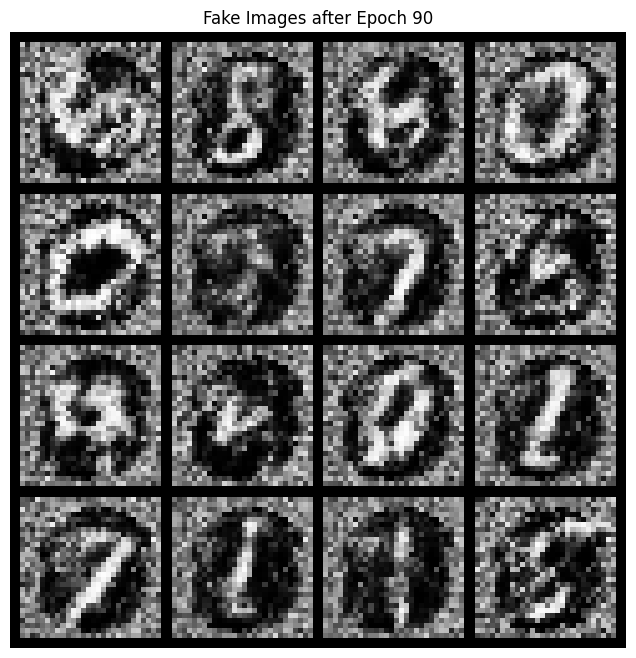

Epoch [91/100], Step [0/1875], Discriminator Loss: 0.9806, Generator Loss: 1.2348
Epoch [91/100], Step [100/1875], Discriminator Loss: 0.9643, Generator Loss: 1.4006
Epoch [91/100], Step [200/1875], Discriminator Loss: 1.1733, Generator Loss: 1.2563
Epoch [91/100], Step [300/1875], Discriminator Loss: 0.8706, Generator Loss: 1.7908
Epoch [91/100], Step [400/1875], Discriminator Loss: 1.1298, Generator Loss: 1.5635
Epoch [91/100], Step [500/1875], Discriminator Loss: 0.8573, Generator Loss: 1.4606
Epoch [91/100], Step [600/1875], Discriminator Loss: 0.8495, Generator Loss: 1.6552
Epoch [91/100], Step [700/1875], Discriminator Loss: 0.9046, Generator Loss: 1.2338
Epoch [91/100], Step [800/1875], Discriminator Loss: 1.0898, Generator Loss: 1.0866
Epoch [91/100], Step [900/1875], Discriminator Loss: 0.9016, Generator Loss: 1.1382
Epoch [91/100], Step [1000/1875], Discriminator Loss: 1.1381, Generator Loss: 1.3274
Epoch [91/100], Step [1100/1875], Discriminator Loss: 1.1038, Generator Loss:

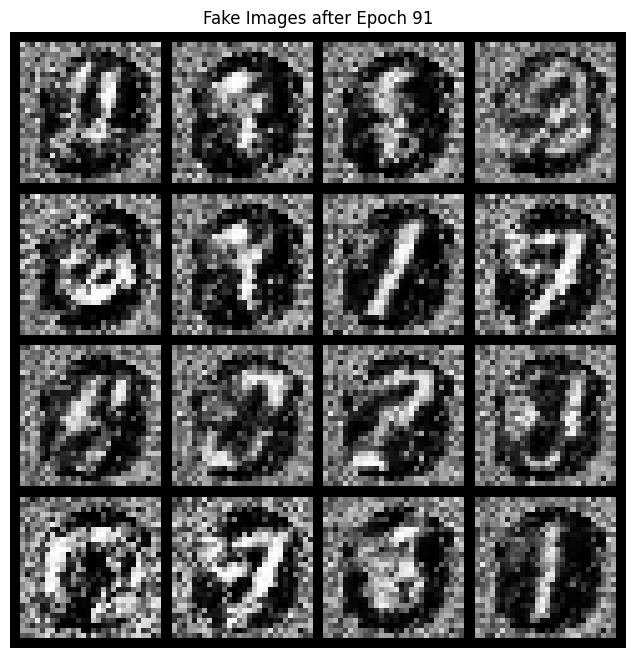

Epoch [92/100], Step [0/1875], Discriminator Loss: 0.8124, Generator Loss: 1.5335
Epoch [92/100], Step [100/1875], Discriminator Loss: 0.9270, Generator Loss: 1.3387
Epoch [92/100], Step [200/1875], Discriminator Loss: 0.8539, Generator Loss: 1.4538
Epoch [92/100], Step [300/1875], Discriminator Loss: 0.8557, Generator Loss: 1.5708
Epoch [92/100], Step [400/1875], Discriminator Loss: 1.0900, Generator Loss: 1.1369
Epoch [92/100], Step [500/1875], Discriminator Loss: 0.9556, Generator Loss: 1.4324
Epoch [92/100], Step [600/1875], Discriminator Loss: 1.0335, Generator Loss: 1.2774
Epoch [92/100], Step [700/1875], Discriminator Loss: 0.8691, Generator Loss: 1.3959
Epoch [92/100], Step [800/1875], Discriminator Loss: 0.9057, Generator Loss: 1.8739
Epoch [92/100], Step [900/1875], Discriminator Loss: 1.0959, Generator Loss: 1.4521
Epoch [92/100], Step [1000/1875], Discriminator Loss: 1.1271, Generator Loss: 1.5515
Epoch [92/100], Step [1100/1875], Discriminator Loss: 1.0992, Generator Loss:

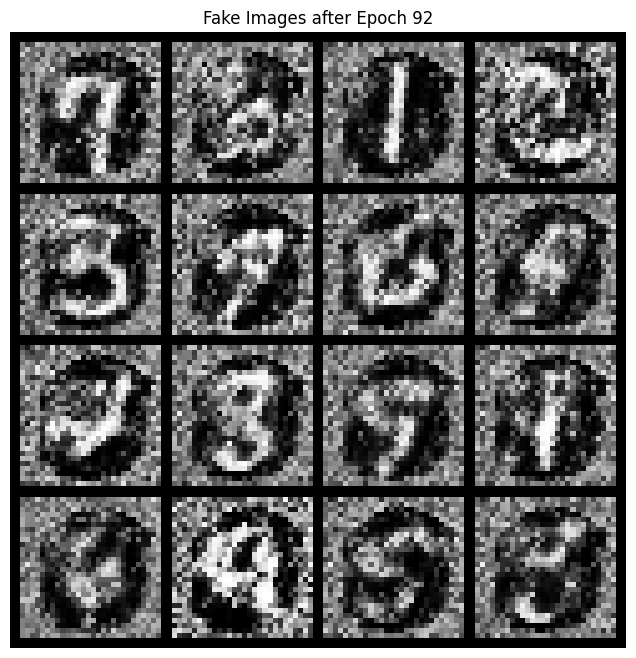

Epoch [93/100], Step [0/1875], Discriminator Loss: 1.1161, Generator Loss: 1.3066
Epoch [93/100], Step [100/1875], Discriminator Loss: 0.7953, Generator Loss: 1.2903
Epoch [93/100], Step [200/1875], Discriminator Loss: 1.1918, Generator Loss: 1.2824
Epoch [93/100], Step [300/1875], Discriminator Loss: 1.2524, Generator Loss: 1.4565
Epoch [93/100], Step [400/1875], Discriminator Loss: 0.9143, Generator Loss: 1.3423
Epoch [93/100], Step [500/1875], Discriminator Loss: 0.9165, Generator Loss: 1.3427
Epoch [93/100], Step [600/1875], Discriminator Loss: 0.9676, Generator Loss: 1.5333
Epoch [93/100], Step [700/1875], Discriminator Loss: 0.9344, Generator Loss: 1.9120
Epoch [93/100], Step [800/1875], Discriminator Loss: 0.4561, Generator Loss: 2.2972
Epoch [93/100], Step [900/1875], Discriminator Loss: 0.2874, Generator Loss: 2.6047
Epoch [93/100], Step [1000/1875], Discriminator Loss: 0.3564, Generator Loss: 2.0845
Epoch [93/100], Step [1100/1875], Discriminator Loss: 0.5268, Generator Loss:

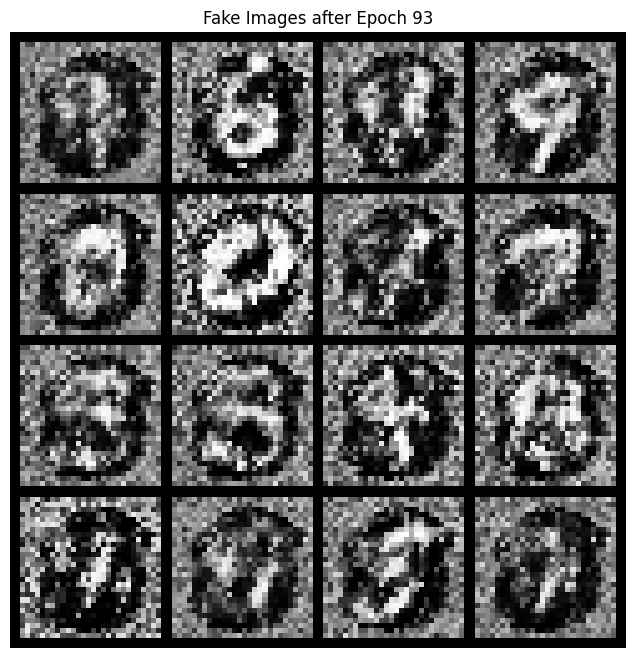

Epoch [94/100], Step [0/1875], Discriminator Loss: 0.9155, Generator Loss: 1.2090
Epoch [94/100], Step [100/1875], Discriminator Loss: 0.7622, Generator Loss: 1.7597
Epoch [94/100], Step [200/1875], Discriminator Loss: 1.4184, Generator Loss: 1.2366
Epoch [94/100], Step [300/1875], Discriminator Loss: 1.0259, Generator Loss: 1.5256
Epoch [94/100], Step [400/1875], Discriminator Loss: 0.5302, Generator Loss: 1.8725
Epoch [94/100], Step [500/1875], Discriminator Loss: 0.7390, Generator Loss: 1.7358
Epoch [94/100], Step [600/1875], Discriminator Loss: 0.4586, Generator Loss: 1.8661
Epoch [94/100], Step [700/1875], Discriminator Loss: 0.5064, Generator Loss: 1.7930
Epoch [94/100], Step [800/1875], Discriminator Loss: 0.4645, Generator Loss: 2.0689
Epoch [94/100], Step [900/1875], Discriminator Loss: 0.5720, Generator Loss: 1.7684
Epoch [94/100], Step [1000/1875], Discriminator Loss: 0.8238, Generator Loss: 1.4368
Epoch [94/100], Step [1100/1875], Discriminator Loss: 0.7556, Generator Loss:

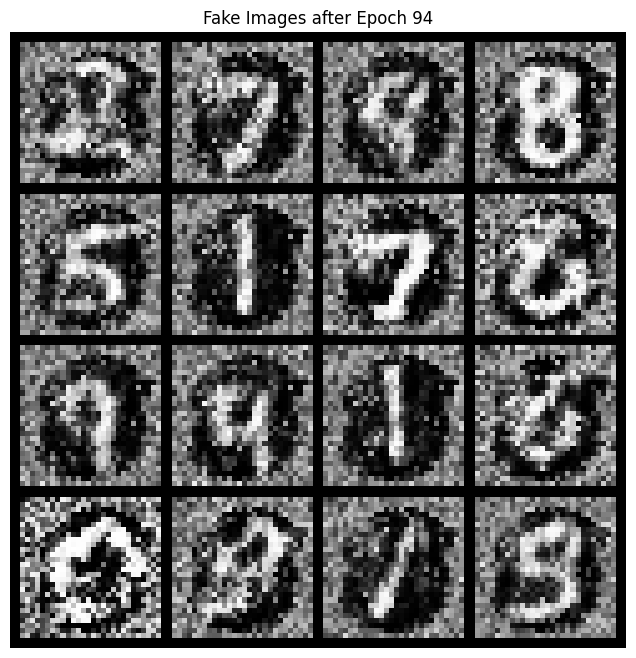

Epoch [95/100], Step [0/1875], Discriminator Loss: 0.7181, Generator Loss: 1.4286
Epoch [95/100], Step [100/1875], Discriminator Loss: 0.7986, Generator Loss: 1.6133
Epoch [95/100], Step [200/1875], Discriminator Loss: 0.7392, Generator Loss: 1.2520
Epoch [95/100], Step [300/1875], Discriminator Loss: 0.5013, Generator Loss: 2.2651
Epoch [95/100], Step [400/1875], Discriminator Loss: 1.3204, Generator Loss: 1.3027
Epoch [95/100], Step [500/1875], Discriminator Loss: 0.8061, Generator Loss: 1.4904
Epoch [95/100], Step [600/1875], Discriminator Loss: 0.7607, Generator Loss: 1.8733
Epoch [95/100], Step [700/1875], Discriminator Loss: 0.8746, Generator Loss: 1.2825
Epoch [95/100], Step [800/1875], Discriminator Loss: 0.7715, Generator Loss: 1.3581
Epoch [95/100], Step [900/1875], Discriminator Loss: 0.7106, Generator Loss: 1.6527
Epoch [95/100], Step [1000/1875], Discriminator Loss: 0.9268, Generator Loss: 1.6053
Epoch [95/100], Step [1100/1875], Discriminator Loss: 0.9136, Generator Loss:

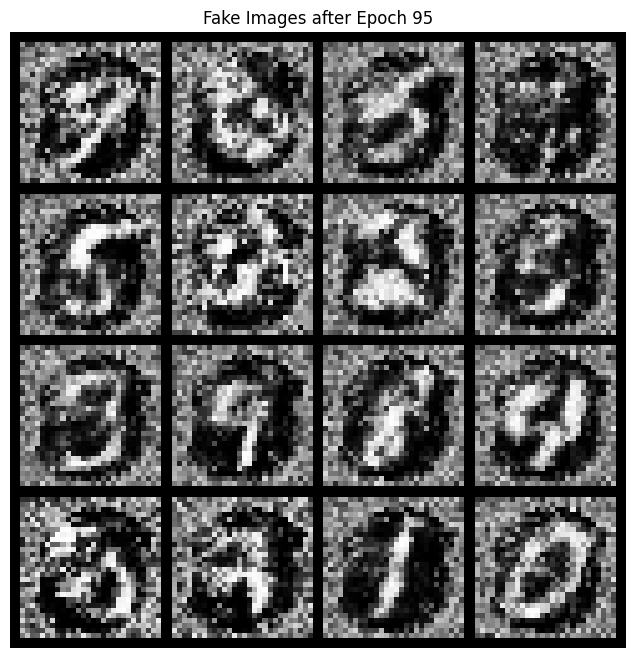

Epoch [96/100], Step [0/1875], Discriminator Loss: 0.6355, Generator Loss: 1.4079
Epoch [96/100], Step [100/1875], Discriminator Loss: 0.9510, Generator Loss: 1.4118
Epoch [96/100], Step [200/1875], Discriminator Loss: 0.8724, Generator Loss: 1.6052
Epoch [96/100], Step [300/1875], Discriminator Loss: 0.8752, Generator Loss: 1.4222
Epoch [96/100], Step [400/1875], Discriminator Loss: 1.0790, Generator Loss: 1.1689
Epoch [96/100], Step [500/1875], Discriminator Loss: 0.7185, Generator Loss: 1.3804
Epoch [96/100], Step [600/1875], Discriminator Loss: 0.7130, Generator Loss: 1.7469
Epoch [96/100], Step [700/1875], Discriminator Loss: 0.9819, Generator Loss: 1.5493
Epoch [96/100], Step [800/1875], Discriminator Loss: 0.9199, Generator Loss: 1.3825
Epoch [96/100], Step [900/1875], Discriminator Loss: 0.9474, Generator Loss: 1.1332
Epoch [96/100], Step [1000/1875], Discriminator Loss: 1.2629, Generator Loss: 1.1992
Epoch [96/100], Step [1100/1875], Discriminator Loss: 0.6193, Generator Loss:

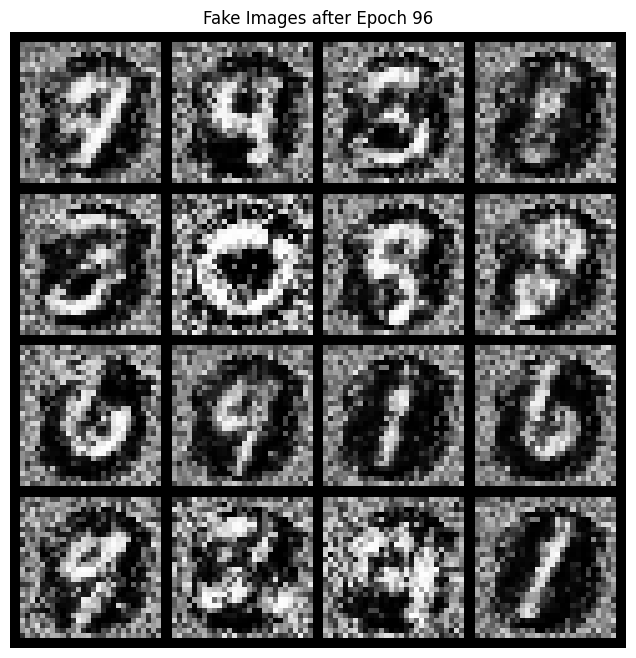

Epoch [97/100], Step [0/1875], Discriminator Loss: 1.0014, Generator Loss: 1.2731
Epoch [97/100], Step [100/1875], Discriminator Loss: 0.8683, Generator Loss: 2.1079
Epoch [97/100], Step [200/1875], Discriminator Loss: 0.6016, Generator Loss: 1.5586
Epoch [97/100], Step [300/1875], Discriminator Loss: 0.7598, Generator Loss: 1.6455
Epoch [97/100], Step [400/1875], Discriminator Loss: 0.8143, Generator Loss: 1.3116
Epoch [97/100], Step [500/1875], Discriminator Loss: 0.7047, Generator Loss: 1.6021
Epoch [97/100], Step [600/1875], Discriminator Loss: 0.5177, Generator Loss: 1.8371
Epoch [97/100], Step [700/1875], Discriminator Loss: 0.6567, Generator Loss: 1.6471
Epoch [97/100], Step [800/1875], Discriminator Loss: 0.8562, Generator Loss: 1.5467
Epoch [97/100], Step [900/1875], Discriminator Loss: 0.8876, Generator Loss: 1.2513
Epoch [97/100], Step [1000/1875], Discriminator Loss: 0.6311, Generator Loss: 1.7866
Epoch [97/100], Step [1100/1875], Discriminator Loss: 1.1827, Generator Loss:

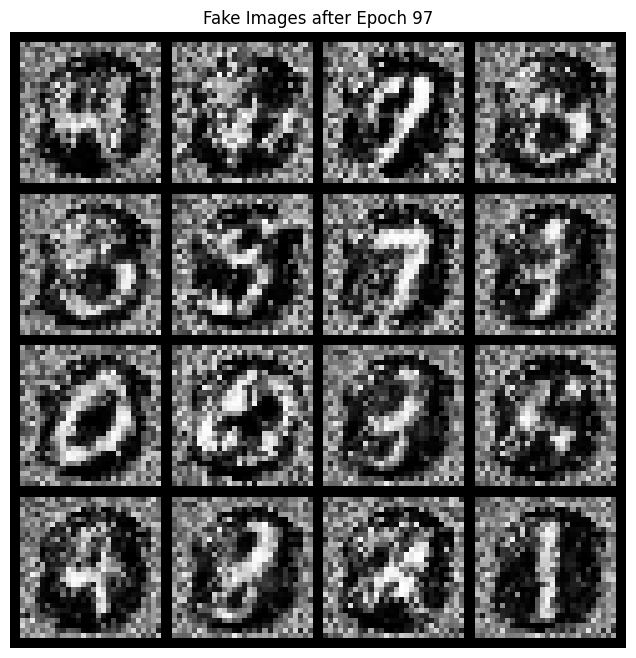

Epoch [98/100], Step [0/1875], Discriminator Loss: 0.8637, Generator Loss: 1.2963
Epoch [98/100], Step [100/1875], Discriminator Loss: 0.7696, Generator Loss: 1.4966
Epoch [98/100], Step [200/1875], Discriminator Loss: 1.0162, Generator Loss: 1.1482
Epoch [98/100], Step [300/1875], Discriminator Loss: 0.8232, Generator Loss: 1.5206
Epoch [98/100], Step [400/1875], Discriminator Loss: 0.6488, Generator Loss: 1.5070
Epoch [98/100], Step [500/1875], Discriminator Loss: 1.0494, Generator Loss: 1.5736
Epoch [98/100], Step [600/1875], Discriminator Loss: 0.9631, Generator Loss: 1.7887
Epoch [98/100], Step [700/1875], Discriminator Loss: 0.9488, Generator Loss: 1.9428
Epoch [98/100], Step [800/1875], Discriminator Loss: 0.8427, Generator Loss: 1.3608
Epoch [98/100], Step [900/1875], Discriminator Loss: 0.6974, Generator Loss: 1.4527
Epoch [98/100], Step [1000/1875], Discriminator Loss: 1.1486, Generator Loss: 1.8503
Epoch [98/100], Step [1100/1875], Discriminator Loss: 1.4438, Generator Loss:

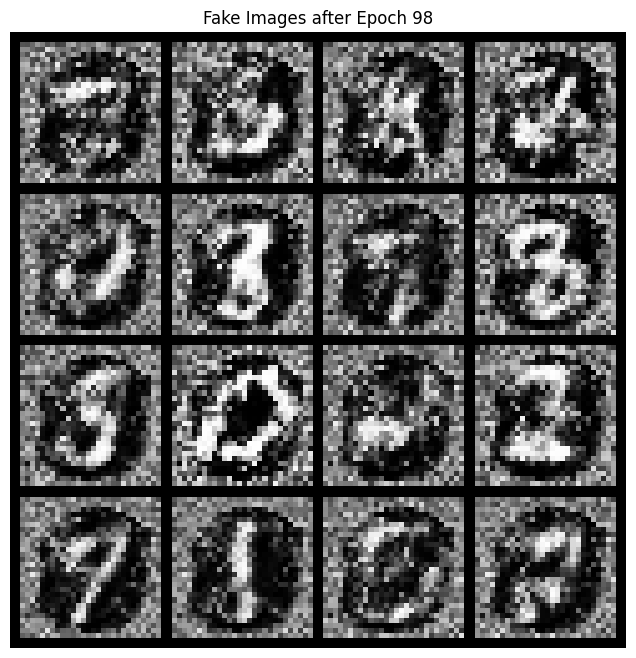

Epoch [99/100], Step [0/1875], Discriminator Loss: 0.8151, Generator Loss: 1.4515
Epoch [99/100], Step [100/1875], Discriminator Loss: 0.9882, Generator Loss: 1.3618
Epoch [99/100], Step [200/1875], Discriminator Loss: 0.9109, Generator Loss: 1.5312
Epoch [99/100], Step [300/1875], Discriminator Loss: 1.0934, Generator Loss: 1.1789
Epoch [99/100], Step [400/1875], Discriminator Loss: 0.9218, Generator Loss: 1.8131
Epoch [99/100], Step [500/1875], Discriminator Loss: 0.7659, Generator Loss: 1.4570
Epoch [99/100], Step [600/1875], Discriminator Loss: 1.1875, Generator Loss: 1.2053
Epoch [99/100], Step [700/1875], Discriminator Loss: 1.0997, Generator Loss: 1.4080
Epoch [99/100], Step [800/1875], Discriminator Loss: 0.8692, Generator Loss: 1.6783
Epoch [99/100], Step [900/1875], Discriminator Loss: 1.0876, Generator Loss: 1.2604
Epoch [99/100], Step [1000/1875], Discriminator Loss: 1.2892, Generator Loss: 1.2262
Epoch [99/100], Step [1100/1875], Discriminator Loss: 1.1180, Generator Loss:

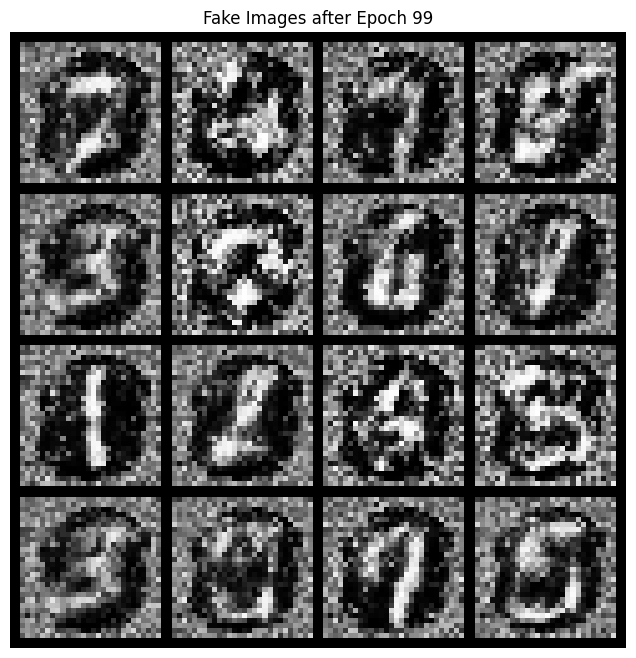

Epoch [100/100], Step [0/1875], Discriminator Loss: 1.2092, Generator Loss: 1.4141
Epoch [100/100], Step [100/1875], Discriminator Loss: 0.9867, Generator Loss: 1.3321
Epoch [100/100], Step [200/1875], Discriminator Loss: 1.0099, Generator Loss: 1.2933
Epoch [100/100], Step [300/1875], Discriminator Loss: 1.2666, Generator Loss: 1.3065
Epoch [100/100], Step [400/1875], Discriminator Loss: 0.9727, Generator Loss: 1.3124
Epoch [100/100], Step [500/1875], Discriminator Loss: 1.2071, Generator Loss: 1.3355
Epoch [100/100], Step [600/1875], Discriminator Loss: 0.9242, Generator Loss: 1.6286
Epoch [100/100], Step [700/1875], Discriminator Loss: 1.3622, Generator Loss: 1.6706
Epoch [100/100], Step [800/1875], Discriminator Loss: 0.9020, Generator Loss: 1.4378
Epoch [100/100], Step [900/1875], Discriminator Loss: 1.0260, Generator Loss: 1.4866
Epoch [100/100], Step [1000/1875], Discriminator Loss: 1.1886, Generator Loss: 1.2899
Epoch [100/100], Step [1100/1875], Discriminator Loss: 1.0808, Gen

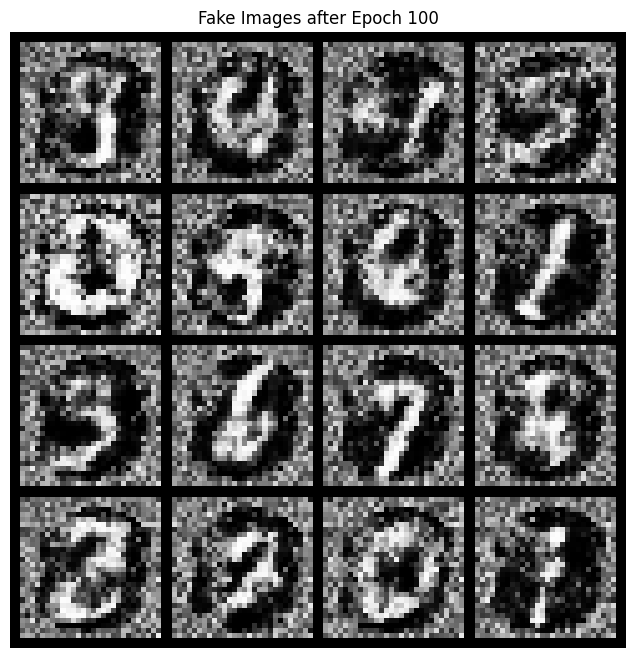

In [10]:
criterion = nn.BCELoss()

# Training function
def train_gan(discriminator, generator, num_epochs, train_loader):
    for epoch in range(num_epochs):
        for i, (real_images, _) in enumerate(train_loader):
            # Move real images to device
            real_images = real_images.to(device)

            # Prepare labels
            batch_size = real_images.size(0)
            real_labels = torch.ones(batch_size, 1).to(device)  # Labels for real images
            fake_labels = torch.zeros(batch_size, 1).to(device)  # Labels for fake images

            # Train Discriminator
            optimizer_dis.zero_grad()
            outputs = discriminator(real_images.view(batch_size, -1))  # Flatten real images
            d_loss_real = criterion(outputs, real_labels)

            # Generate fake images
            noise = torch.randn(batch_size, 30).to(device)  # Generate noise
            fake_images = generator(noise)

            # Train on fake images
            outputs = discriminator(fake_images.detach())  # Detach to avoid updating Generator's weights
            d_loss_fake = criterion(outputs, fake_labels)

            # Combine losses and backpropagate
            d_loss = d_loss_real + d_loss_fake
            d_loss.backward()
            optimizer_dis.step()

            # Train Generator
            optimizer_gen.zero_grad()
            outputs = discriminator(fake_images)  # Do not detach here
            g_loss = criterion(outputs, real_labels)  # Want the Discriminator to think fake is real

            g_loss.backward()
            optimizer_gen.step()

            if i % 100 == 0:  # Print every 100 batches
                print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i}/{len(train_loader)}], '
                      f'Discriminator Loss: {d_loss.item():.4f}, Generator Loss: {g_loss.item():.4f}')

        # Save and display fake images after each epoch
        save_fake_images(generator, noise_dim=30, num_images=16, epoch=epoch)

# Example usage
num_epochs = 100  # Set the number of epochs
train_gan(discriminator, generator, num_epochs, train_loader)
